# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 99525 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 99525) |           | Elapsed Time: 0:00:27 ETA:  31 days, 9:51:03

  0% (   78 of 99525) |                    | Elapsed Time: 0:00:28 ETA:  0:21:13

  0% (  158 of 99525) |                    | Elapsed Time: 0:00:29 ETA:  0:20:48

  0% (  239 of 99525) |                    | Elapsed Time: 0:00:30 ETA:  0:20:33

  0% (  313 of 99525) |                    | Elapsed Time: 0:00:31 ETA:  0:20:53

  0% (  381 of 99525) |                    | Elapsed Time: 0:00:32 ETA:  0:21:26

  0% (  453 of 99525) |                    | Elapsed Time: 0:00:33 ETA:  0:21:35

  0% (  528 of 99525) |                    | Elapsed Time: 0:00:34 ETA:  0:21:34

  0% (  599 of 99525) |                    | Elapsed Time: 0:00:35 ETA:  0:21:43

  0% (  674 of 99525) |                    | Elapsed Time: 0:00:36 ETA:  0:21:42

  0% (  748 of 99525) |                    | Elapsed Time: 0:00:37 ETA:  0:21:47

  0% (  824 of 99525) |                    | Elapsed Time: 0:00:38 ETA:  0:21:54

  0% (  900 of 99525) |                    | Elapsed Time: 0:00:39 ETA:  0:22:02

  0% (  980 of 99525) |                    | Elapsed Time: 0:00:40 ETA:  0:21:50

  1% ( 1055 of 99525) |                    | Elapsed Time: 0:00:41 ETA:  0:21:35

  1% ( 1075 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  0:23:44

  1% ( 1149 of 99525) |                    | Elapsed Time: 0:00:43 ETA:  0:23:45

  1% ( 1224 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  0:23:34

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  0:23:43

  1% ( 1323 of 99525) |                    | Elapsed Time: 0:00:45 ETA:  0:23:32

  1% ( 1402 of 99525) |                    | Elapsed Time: 0:00:46 ETA:  0:23:22

  1% ( 1481 of 99525) |                    | Elapsed Time: 0:00:47 ETA:  0:23:16

  1% ( 1554 of 99525) |                    | Elapsed Time: 0:00:48 ETA:  0:23:33

  1% ( 1627 of 99525) |                    | Elapsed Time: 0:00:49 ETA:  0:23:37

  1% ( 1701 of 99525) |                    | Elapsed Time: 0:00:50 ETA:  0:21:12

  1% ( 1776 of 99525) |                    | Elapsed Time: 0:00:51 ETA:  0:21:10

  1% ( 1838 of 99525) |                    | Elapsed Time: 0:00:52 ETA:  0:21:37

  1% ( 1900 of 99525) |                    | Elapsed Time: 0:00:53 ETA:  0:22:04

  1% ( 1969 of 99525) |                    | Elapsed Time: 0:00:54 ETA:  0:22:22

  2% ( 2037 of 99525) |                    | Elapsed Time: 0:00:55 ETA:  0:22:47

  2% ( 2111 of 99525) |                    | Elapsed Time: 0:00:56 ETA:  0:22:57

  2% ( 2172 of 99525) |                    | Elapsed Time: 0:00:57 ETA:  0:23:22

  2% ( 2234 of 99525) |                    | Elapsed Time: 0:00:58 ETA:  0:23:49

  2% ( 2301 of 99525) |                    | Elapsed Time: 0:00:59 ETA:  0:24:05

  2% ( 2367 of 99525) |                    | Elapsed Time: 0:01:00 ETA:  0:24:27

  2% ( 2436 of 99525) |                    | Elapsed Time: 0:01:01 ETA:  0:24:09

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:01:02 ETA:  0:24:02

  2% ( 2552 of 99525) |                    | Elapsed Time: 0:01:03 ETA:  0:24:17

  2% ( 2609 of 99525) |                    | Elapsed Time: 0:01:04 ETA:  0:24:43

  2% ( 2665 of 99525) |                    | Elapsed Time: 0:01:05 ETA:  0:25:34

  2% ( 2721 of 99525) |                    | Elapsed Time: 0:01:06 ETA:  0:25:47

  2% ( 2779 of 99525) |                    | Elapsed Time: 0:01:07 ETA:  0:25:57

  2% ( 2837 of 99525) |                    | Elapsed Time: 0:01:08 ETA:  0:26:24

  2% ( 2893 of 99525) |                    | Elapsed Time: 0:01:09 ETA:  0:26:56

  2% ( 2948 of 99525) |                    | Elapsed Time: 0:01:10 ETA:  0:27:41

  3% ( 3000 of 99525) |                    | Elapsed Time: 0:01:11 ETA:  0:28:17

  3% ( 3054 of 99525) |                    | Elapsed Time: 0:01:12 ETA:  0:28:47

  3% ( 3112 of 99525) |                    | Elapsed Time: 0:01:13 ETA:  0:28:43

  3% ( 3171 of 99525) |                    | Elapsed Time: 0:01:14 ETA:  0:28:30

  3% ( 3228 of 99525) |                    | Elapsed Time: 0:01:15 ETA:  0:28:26

  3% ( 3288 of 99525) |                    | Elapsed Time: 0:01:16 ETA:  0:28:17

  3% ( 3349 of 99525) |                    | Elapsed Time: 0:01:17 ETA:  0:28:07

  3% ( 3403 of 99525) |                    | Elapsed Time: 0:01:18 ETA:  0:28:13

  3% ( 3459 of 99525) |                    | Elapsed Time: 0:01:19 ETA:  0:28:07

  3% ( 3516 of 99525) |                    | Elapsed Time: 0:01:20 ETA:  0:27:48

  3% ( 3575 of 99525) |                    | Elapsed Time: 0:01:21 ETA:  0:27:30

  3% ( 3634 of 99525) |                    | Elapsed Time: 0:01:22 ETA:  0:27:26

  3% ( 3693 of 99525) |                    | Elapsed Time: 0:01:23 ETA:  0:27:26

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:01:24 ETA:  0:27:11

  3% ( 3797 of 99525) |                    | Elapsed Time: 0:01:25 ETA:  0:26:57

  3% ( 3862 of 99525) |                    | Elapsed Time: 0:01:26 ETA:  0:26:39

  3% ( 3928 of 99525) |                    | Elapsed Time: 0:01:27 ETA:  0:25:58

  4% ( 3994 of 99525) |                    | Elapsed Time: 0:01:28 ETA:  0:25:28

  4% ( 4059 of 99525) |                    | Elapsed Time: 0:01:29 ETA:  0:25:05

  4% ( 4123 of 99525) |                    | Elapsed Time: 0:01:30 ETA:  0:24:49

  4% ( 4188 of 99525) |                    | Elapsed Time: 0:01:31 ETA:  0:24:32

  4% ( 4231 of 99525) |                    | Elapsed Time: 0:01:33 ETA:  0:27:47

  4% ( 4293 of 99525) |                    | Elapsed Time: 0:01:34 ETA:  0:27:44

  4% ( 4354 of 99525) |                    | Elapsed Time: 0:01:35 ETA:  0:27:52

  4% ( 4420 of 99525) |                    | Elapsed Time: 0:01:36 ETA:  0:27:49

  4% ( 4489 of 99525) |                    | Elapsed Time: 0:01:37 ETA:  0:27:39

  4% ( 4557 of 99525) |                    | Elapsed Time: 0:01:38 ETA:  0:27:32

  4% ( 4623 of 99525) |                    | Elapsed Time: 0:01:39 ETA:  0:27:27

  4% ( 4691 of 99525) |                    | Elapsed Time: 0:01:40 ETA:  0:27:14

  4% ( 4760 of 99525) |                    | Elapsed Time: 0:01:41 ETA:  0:27:00

  4% ( 4827 of 99525) |                    | Elapsed Time: 0:01:42 ETA:  0:23:32

  4% ( 4895 of 99525) |                    | Elapsed Time: 0:01:43 ETA:  0:23:15

  4% ( 4963 of 99525) |                    | Elapsed Time: 0:01:44 ETA:  0:22:57

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:01:44 ETA:  0:22:54

  5% ( 5054 of 99525) |#                   | Elapsed Time: 0:01:45 ETA:  0:22:32

  5% ( 5129 of 99525) |#                   | Elapsed Time: 0:01:46 ETA:  0:22:12

  5% ( 5205 of 99525) |#                   | Elapsed Time: 0:01:47 ETA:  0:21:47

  5% ( 5280 of 99525) |#                   | Elapsed Time: 0:01:48 ETA:  0:21:29

  5% ( 5355 of 99525) |#                   | Elapsed Time: 0:01:49 ETA:  0:21:14

  5% ( 5429 of 99525) |#                   | Elapsed Time: 0:01:50 ETA:  0:20:56

  5% ( 5502 of 99525) |#                   | Elapsed Time: 0:01:51 ETA:  0:20:43

  5% ( 5578 of 99525) |#                   | Elapsed Time: 0:01:52 ETA:  0:20:25

  5% ( 5653 of 99525) |#                   | Elapsed Time: 0:01:53 ETA:  0:20:20

  5% ( 5725 of 99525) |#                   | Elapsed Time: 0:01:54 ETA:  0:20:28

  5% ( 5800 of 99525) |#                   | Elapsed Time: 0:01:55 ETA:  0:20:26

  5% ( 5875 of 99525) |#                   | Elapsed Time: 0:01:56 ETA:  0:20:27

  5% ( 5948 of 99525) |#                   | Elapsed Time: 0:01:57 ETA:  0:20:31

  6% ( 6025 of 99525) |#                   | Elapsed Time: 0:01:58 ETA:  0:20:26

  6% ( 6097 of 99525) |#                   | Elapsed Time: 0:01:59 ETA:  0:20:31

  6% ( 6170 of 99525) |#                   | Elapsed Time: 0:02:00 ETA:  0:20:30

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:02:01 ETA:  0:20:29

  6% ( 6291 of 99525) |#                   | Elapsed Time: 0:02:02 ETA:  0:20:37

  6% ( 6366 of 99525) |#                   | Elapsed Time: 0:02:03 ETA:  0:20:30

  6% ( 6442 of 99525) |#                   | Elapsed Time: 0:02:04 ETA:  0:20:27

  6% ( 6518 of 99525) |#                   | Elapsed Time: 0:02:05 ETA:  0:20:24

  6% ( 6596 of 99525) |#                   | Elapsed Time: 0:02:06 ETA:  0:20:13

  6% ( 6665 of 99525) |#                   | Elapsed Time: 0:02:07 ETA:  0:20:28

  6% ( 6731 of 99525) |#                   | Elapsed Time: 0:02:08 ETA:  0:20:40

  6% ( 6798 of 99525) |#                   | Elapsed Time: 0:02:09 ETA:  0:20:52

  6% ( 6865 of 99525) |#                   | Elapsed Time: 0:02:10 ETA:  0:21:08

  6% ( 6932 of 99525) |#                   | Elapsed Time: 0:02:11 ETA:  0:21:15

  7% ( 7001 of 99525) |#                   | Elapsed Time: 0:02:12 ETA:  0:21:29

  7% ( 7070 of 99525) |#                   | Elapsed Time: 0:02:13 ETA:  0:21:44

  7% ( 7139 of 99525) |#                   | Elapsed Time: 0:02:14 ETA:  0:21:58

  7% ( 7213 of 99525) |#                   | Elapsed Time: 0:02:15 ETA:  0:22:06

  7% ( 7284 of 99525) |#                   | Elapsed Time: 0:02:16 ETA:  0:22:01

  7% ( 7361 of 99525) |#                   | Elapsed Time: 0:02:17 ETA:  0:21:33

  7% ( 7440 of 99525) |#                   | Elapsed Time: 0:02:18 ETA:  0:21:06

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:02:18 ETA:  0:20:51

  7% ( 7544 of 99525) |#                   | Elapsed Time: 0:02:19 ETA:  0:20:21

  7% ( 7619 of 99525) |#                   | Elapsed Time: 0:02:20 ETA:  0:20:06

  7% ( 7697 of 99525) |#                   | Elapsed Time: 0:02:21 ETA:  0:19:47

  7% ( 7775 of 99525) |#                   | Elapsed Time: 0:02:22 ETA:  0:19:28

  7% ( 7852 of 99525) |#                   | Elapsed Time: 0:02:23 ETA:  0:19:21

  7% ( 7926 of 99525) |#                   | Elapsed Time: 0:02:24 ETA:  0:19:15

  8% ( 8003 of 99525) |#                   | Elapsed Time: 0:02:26 ETA:  0:19:14

  8% ( 8078 of 99525) |#                   | Elapsed Time: 0:02:27 ETA:  0:19:20

  8% ( 8153 of 99525) |#                   | Elapsed Time: 0:02:28 ETA:  0:19:23

  8% ( 8157 of 99525) |#                   | Elapsed Time: 0:02:29 ETA:  0:23:10

  8% ( 8222 of 99525) |#                   | Elapsed Time: 0:02:30 ETA:  0:23:34

  8% ( 8286 of 99525) |#                   | Elapsed Time: 0:02:31 ETA:  0:24:12

  8% ( 8354 of 99525) |#                   | Elapsed Time: 0:02:32 ETA:  0:24:40

  8% ( 8429 of 99525) |#                   | Elapsed Time: 0:02:33 ETA:  0:24:43

  8% ( 8497 of 99525) |#                   | Elapsed Time: 0:02:34 ETA:  0:24:59

  8% ( 8560 of 99525) |#                   | Elapsed Time: 0:02:35 ETA:  0:25:39

  8% ( 8626 of 99525) |#                   | Elapsed Time: 0:02:36 ETA:  0:26:08

  8% ( 8693 of 99525) |#                   | Elapsed Time: 0:02:37 ETA:  0:26:33

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:02:37 ETA:  0:22:21

  8% ( 8774 of 99525) |#                   | Elapsed Time: 0:02:38 ETA:  0:22:21

  8% ( 8841 of 99525) |#                   | Elapsed Time: 0:02:39 ETA:  0:22:12

  8% ( 8905 of 99525) |#                   | Elapsed Time: 0:02:40 ETA:  0:22:21

  9% ( 8980 of 99525) |#                   | Elapsed Time: 0:02:41 ETA:  0:22:21

  9% ( 9052 of 99525) |#                   | Elapsed Time: 0:02:42 ETA:  0:22:10

  9% ( 9114 of 99525) |#                   | Elapsed Time: 0:02:43 ETA:  0:22:13

  9% ( 9175 of 99525) |#                   | Elapsed Time: 0:02:44 ETA:  0:22:24

  9% ( 9236 of 99525) |#                   | Elapsed Time: 0:02:45 ETA:  0:22:40

  9% ( 9299 of 99525) |#                   | Elapsed Time: 0:02:46 ETA:  0:22:46

  9% ( 9361 of 99525) |#                   | Elapsed Time: 0:02:47 ETA:  0:22:52

  9% ( 9432 of 99525) |#                   | Elapsed Time: 0:02:48 ETA:  0:22:40

  9% ( 9504 of 99525) |#                   | Elapsed Time: 0:02:49 ETA:  0:22:18

  9% ( 9589 of 99525) |#                   | Elapsed Time: 0:02:50 ETA:  0:21:52

  9% ( 9670 of 99525) |#                   | Elapsed Time: 0:02:51 ETA:  0:21:28

  9% ( 9747 of 99525) |#                   | Elapsed Time: 0:02:52 ETA:  0:20:51

  9% ( 9825 of 99525) |#                   | Elapsed Time: 0:02:53 ETA:  0:20:13

  9% ( 9902 of 99525) |#                   | Elapsed Time: 0:02:54 ETA:  0:19:40

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:02:55 ETA:  0:19:20

 10% (10023 of 99525) |##                  | Elapsed Time: 0:02:56 ETA:  0:19:02

 10% (10093 of 99525) |##                  | Elapsed Time: 0:02:57 ETA:  0:19:03

 10% (10164 of 99525) |##                  | Elapsed Time: 0:02:58 ETA:  0:19:05

 10% (10236 of 99525) |##                  | Elapsed Time: 0:02:59 ETA:  0:19:30

 10% (10303 of 99525) |##                  | Elapsed Time: 0:03:00 ETA:  0:19:59

 10% (10371 of 99525) |##                  | Elapsed Time: 0:03:01 ETA:  0:20:18

 10% (10445 of 99525) |##                  | Elapsed Time: 0:03:02 ETA:  0:20:25

 10% (10516 of 99525) |##                  | Elapsed Time: 0:03:03 ETA:  0:20:36

 10% (10587 of 99525) |##                  | Elapsed Time: 0:03:04 ETA:  0:20:36

 10% (10655 of 99525) |##                  | Elapsed Time: 0:03:05 ETA:  0:20:40

 10% (10726 of 99525) |##                  | Elapsed Time: 0:03:06 ETA:  0:20:36

 10% (10799 of 99525) |##                  | Elapsed Time: 0:03:07 ETA:  0:20:30

 10% (10877 of 99525) |##                  | Elapsed Time: 0:03:08 ETA:  0:20:15

 11% (10949 of 99525) |##                  | Elapsed Time: 0:03:09 ETA:  0:20:04

 11% (11028 of 99525) |##                  | Elapsed Time: 0:03:10 ETA:  0:19:40

 11% (11099 of 99525) |##                  | Elapsed Time: 0:03:11 ETA:  0:19:46

 11% (11169 of 99525) |##                  | Elapsed Time: 0:03:12 ETA:  0:19:49

 11% (11197 of 99525) |##                  | Elapsed Time: 0:03:13 ETA:  0:19:49

 11% (11259 of 99525) |##                  | Elapsed Time: 0:03:14 ETA:  0:20:02

 11% (11325 of 99525) |##                  | Elapsed Time: 0:03:15 ETA:  0:20:15

 11% (11390 of 99525) |##                  | Elapsed Time: 0:03:16 ETA:  0:20:33

 11% (11454 of 99525) |##                  | Elapsed Time: 0:03:17 ETA:  0:21:06

 11% (11520 of 99525) |##                  | Elapsed Time: 0:03:18 ETA:  0:21:20

 11% (11586 of 99525) |##                  | Elapsed Time: 0:03:19 ETA:  0:21:52

 11% (11653 of 99525) |##                  | Elapsed Time: 0:03:20 ETA:  0:22:00

 11% (11719 of 99525) |##                  | Elapsed Time: 0:03:21 ETA:  0:22:09

 11% (11787 of 99525) |##                  | Elapsed Time: 0:03:22 ETA:  0:22:05

 11% (11853 of 99525) |##                  | Elapsed Time: 0:03:23 ETA:  0:21:53

 11% (11921 of 99525) |##                  | Elapsed Time: 0:03:24 ETA:  0:21:45

 12% (11988 of 99525) |##                  | Elapsed Time: 0:03:25 ETA:  0:21:38

 12% (12056 of 99525) |##                  | Elapsed Time: 0:03:26 ETA:  0:21:28

 12% (12125 of 99525) |##                  | Elapsed Time: 0:03:27 ETA:  0:21:20

 12% (12194 of 99525) |##                  | Elapsed Time: 0:03:28 ETA:  0:21:12

 12% (12261 of 99525) |##                  | Elapsed Time: 0:03:29 ETA:  0:21:12

 12% (12328 of 99525) |##                  | Elapsed Time: 0:03:30 ETA:  0:21:09

 12% (12397 of 99525) |##                  | Elapsed Time: 0:03:31 ETA:  0:21:05

 12% (12441 of 99525) |##                  | Elapsed Time: 0:03:31 ETA:  0:21:01

 12% (12509 of 99525) |##                  | Elapsed Time: 0:03:32 ETA:  0:20:59

 12% (12577 of 99525) |##                  | Elapsed Time: 0:03:33 ETA:  0:20:57

 12% (12646 of 99525) |##                  | Elapsed Time: 0:03:34 ETA:  0:20:52

 12% (12714 of 99525) |##                  | Elapsed Time: 0:03:35 ETA:  0:20:53

 12% (12781 of 99525) |##                  | Elapsed Time: 0:03:36 ETA:  0:20:57

 12% (12849 of 99525) |##                  | Elapsed Time: 0:03:37 ETA:  0:20:54

 12% (12917 of 99525) |##                  | Elapsed Time: 0:03:38 ETA:  0:20:51

 13% (12985 of 99525) |##                  | Elapsed Time: 0:03:39 ETA:  0:20:52

 13% (12989 of 99525) |##                  | Elapsed Time: 0:03:41 ETA:  0:26:16

 13% (13052 of 99525) |##                  | Elapsed Time: 0:03:42 ETA:  0:26:33

 13% (13118 of 99525) |##                  | Elapsed Time: 0:03:43 ETA:  0:26:40

 13% (13183 of 99525) |##                  | Elapsed Time: 0:03:44 ETA:  0:26:52

 13% (13249 of 99525) |##                  | Elapsed Time: 0:03:45 ETA:  0:27:00

 13% (13315 of 99525) |##                  | Elapsed Time: 0:03:46 ETA:  0:27:01

 13% (13383 of 99525) |##                  | Elapsed Time: 0:03:47 ETA:  0:26:59

 13% (13454 of 99525) |##                  | Elapsed Time: 0:03:48 ETA:  0:26:48

 13% (13527 of 99525) |##                  | Elapsed Time: 0:03:49 ETA:  0:26:30

 13% (13597 of 99525) |##                  | Elapsed Time: 0:03:50 ETA:  0:20:52

 13% (13685 of 99525) |##                  | Elapsed Time: 0:03:52 ETA:  0:20:12

 13% (13755 of 99525) |##                  | Elapsed Time: 0:03:53 ETA:  0:19:59

 13% (13829 of 99525) |##                  | Elapsed Time: 0:03:54 ETA:  0:19:39

 13% (13902 of 99525) |##                  | Elapsed Time: 0:03:55 ETA:  0:19:22

 14% (13974 of 99525) |##                  | Elapsed Time: 0:03:56 ETA:  0:19:12

 14% (14047 of 99525) |##                  | Elapsed Time: 0:03:57 ETA:  0:19:05

 14% (14122 of 99525) |##                  | Elapsed Time: 0:03:58 ETA:  0:18:59

 14% (14197 of 99525) |##                  | Elapsed Time: 0:03:59 ETA:  0:18:48

 14% (14271 of 99525) |##                  | Elapsed Time: 0:04:00 ETA:  0:18:48

 14% (14342 of 99525) |##                  | Elapsed Time: 0:04:01 ETA:  0:18:52

 14% (14412 of 99525) |##                  | Elapsed Time: 0:04:02 ETA:  0:18:50

 14% (14484 of 99525) |##                  | Elapsed Time: 0:04:03 ETA:  0:18:53

 14% (14553 of 99525) |##                  | Elapsed Time: 0:04:04 ETA:  0:18:59

 14% (14617 of 99525) |##                  | Elapsed Time: 0:04:05 ETA:  0:19:16

 14% (14691 of 99525) |##                  | Elapsed Time: 0:04:06 ETA:  0:19:14

 14% (14766 of 99525) |##                  | Elapsed Time: 0:04:07 ETA:  0:19:13

 14% (14842 of 99525) |##                  | Elapsed Time: 0:04:08 ETA:  0:19:10

 15% (14929 of 99525) |###                 | Elapsed Time: 0:04:09 ETA:  0:19:08

 15% (15005 of 99525) |###                 | Elapsed Time: 0:04:10 ETA:  0:18:54

 15% (15079 of 99525) |###                 | Elapsed Time: 0:04:11 ETA:  0:18:49

 15% (15152 of 99525) |###                 | Elapsed Time: 0:04:12 ETA:  0:18:39

 15% (15222 of 99525) |###                 | Elapsed Time: 0:04:13 ETA:  0:18:23

 15% (15294 of 99525) |###                 | Elapsed Time: 0:04:14 ETA:  0:18:26

 15% (15365 of 99525) |###                 | Elapsed Time: 0:04:15 ETA:  0:18:35

 15% (15435 of 99525) |###                 | Elapsed Time: 0:04:16 ETA:  0:18:46

 15% (15507 of 99525) |###                 | Elapsed Time: 0:04:17 ETA:  0:18:44

 15% (15577 of 99525) |###                 | Elapsed Time: 0:04:18 ETA:  0:18:52

 15% (15649 of 99525) |###                 | Elapsed Time: 0:04:19 ETA:  0:18:59

 15% (15720 of 99525) |###                 | Elapsed Time: 0:04:20 ETA:  0:19:05

 15% (15791 of 99525) |###                 | Elapsed Time: 0:04:21 ETA:  0:19:09

 15% (15859 of 99525) |###                 | Elapsed Time: 0:04:22 ETA:  0:19:14

 16% (15928 of 99525) |###                 | Elapsed Time: 0:04:23 ETA:  0:19:18

 16% (15998 of 99525) |###                 | Elapsed Time: 0:04:24 ETA:  0:19:19

 16% (16069 of 99525) |###                 | Elapsed Time: 0:04:25 ETA:  0:19:18

 16% (16140 of 99525) |###                 | Elapsed Time: 0:04:26 ETA:  0:19:19

 16% (16173 of 99525) |###                 | Elapsed Time: 0:04:26 ETA:  0:19:19

 16% (16245 of 99525) |###                 | Elapsed Time: 0:04:27 ETA:  0:19:18

 16% (16316 of 99525) |###                 | Elapsed Time: 0:04:29 ETA:  0:19:18

 16% (16387 of 99525) |###                 | Elapsed Time: 0:04:30 ETA:  0:19:16

 16% (16461 of 99525) |###                 | Elapsed Time: 0:04:31 ETA:  0:19:00

 16% (16533 of 99525) |###                 | Elapsed Time: 0:04:32 ETA:  0:18:52

 16% (16602 of 99525) |###                 | Elapsed Time: 0:04:33 ETA:  0:18:54

 16% (16669 of 99525) |###                 | Elapsed Time: 0:04:34 ETA:  0:19:00

 16% (16738 of 99525) |###                 | Elapsed Time: 0:04:35 ETA:  0:19:05

 16% (16807 of 99525) |###                 | Elapsed Time: 0:04:36 ETA:  0:19:06

 16% (16875 of 99525) |###                 | Elapsed Time: 0:04:37 ETA:  0:19:14

 17% (16944 of 99525) |###                 | Elapsed Time: 0:04:38 ETA:  0:19:17

 17% (17011 of 99525) |###                 | Elapsed Time: 0:04:39 ETA:  0:19:25

 17% (17082 of 99525) |###                 | Elapsed Time: 0:04:40 ETA:  0:19:32

 17% (17150 of 99525) |###                 | Elapsed Time: 0:04:41 ETA:  0:19:40

 17% (17213 of 99525) |###                 | Elapsed Time: 0:04:42 ETA:  0:19:53

 17% (17269 of 99525) |###                 | Elapsed Time: 0:04:43 ETA:  0:20:21

 17% (17325 of 99525) |###                 | Elapsed Time: 0:04:44 ETA:  0:20:53

 17% (17394 of 99525) |###                 | Elapsed Time: 0:04:45 ETA:  0:20:51

 17% (17417 of 99525) |###                 | Elapsed Time: 0:04:45 ETA:  0:20:50

 17% (17487 of 99525) |###                 | Elapsed Time: 0:04:46 ETA:  0:20:46

 17% (17558 of 99525) |###                 | Elapsed Time: 0:04:47 ETA:  0:20:34

 17% (17627 of 99525) |###                 | Elapsed Time: 0:04:48 ETA:  0:20:39

 17% (17696 of 99525) |###                 | Elapsed Time: 0:04:49 ETA:  0:20:37

 17% (17761 of 99525) |###                 | Elapsed Time: 0:04:50 ETA:  0:20:31

 17% (17821 of 99525) |###                 | Elapsed Time: 0:04:51 ETA:  0:20:18

 17% (17884 of 99525) |###                 | Elapsed Time: 0:04:52 ETA:  0:19:58

 18% (17955 of 99525) |###                 | Elapsed Time: 0:04:53 ETA:  0:19:52

 18% (18029 of 99525) |###                 | Elapsed Time: 0:04:54 ETA:  0:19:41

 18% (18101 of 99525) |###                 | Elapsed Time: 0:04:55 ETA:  0:19:34

 18% (18176 of 99525) |###                 | Elapsed Time: 0:04:56 ETA:  0:19:24

 18% (18252 of 99525) |###                 | Elapsed Time: 0:04:57 ETA:  0:19:06

 18% (18325 of 99525) |###                 | Elapsed Time: 0:04:58 ETA:  0:18:55

 18% (18397 of 99525) |###                 | Elapsed Time: 0:04:59 ETA:  0:18:38

 18% (18468 of 99525) |###                 | Elapsed Time: 0:05:00 ETA:  0:18:14

 18% (18536 of 99525) |###                 | Elapsed Time: 0:05:01 ETA:  0:18:03

 18% (18611 of 99525) |###                 | Elapsed Time: 0:05:02 ETA:  0:17:53

 18% (18661 of 99525) |###                 | Elapsed Time: 0:05:03 ETA:  0:18:01

 18% (18735 of 99525) |###                 | Elapsed Time: 0:05:04 ETA:  0:17:55

 18% (18805 of 99525) |###                 | Elapsed Time: 0:05:05 ETA:  0:18:05

 18% (18877 of 99525) |###                 | Elapsed Time: 0:05:06 ETA:  0:18:13

 19% (18946 of 99525) |###                 | Elapsed Time: 0:05:07 ETA:  0:18:20

 19% (19000 of 99525) |###                 | Elapsed Time: 0:05:10 ETA:  0:25:22

 19% (19062 of 99525) |###                 | Elapsed Time: 0:05:11 ETA:  0:25:48

 19% (19120 of 99525) |###                 | Elapsed Time: 0:05:12 ETA:  0:26:18

 19% (19188 of 99525) |###                 | Elapsed Time: 0:05:13 ETA:  0:26:40

 19% (19259 of 99525) |###                 | Elapsed Time: 0:05:14 ETA:  0:26:18

 19% (19323 of 99525) |###                 | Elapsed Time: 0:05:15 ETA:  0:26:50

 19% (19386 of 99525) |###                 | Elapsed Time: 0:05:16 ETA:  0:27:12

 19% (19447 of 99525) |###                 | Elapsed Time: 0:05:17 ETA:  0:27:51

 19% (19501 of 99525) |###                 | Elapsed Time: 0:05:18 ETA:  0:28:44

 19% (19560 of 99525) |###                 | Elapsed Time: 0:05:19 ETA:  0:21:35

 19% (19615 of 99525) |###                 | Elapsed Time: 0:05:20 ETA:  0:21:55

 19% (19678 of 99525) |###                 | Elapsed Time: 0:05:21 ETA:  0:21:41

 19% (19747 of 99525) |###                 | Elapsed Time: 0:05:22 ETA:  0:21:39

 19% (19815 of 99525) |###                 | Elapsed Time: 0:05:23 ETA:  0:21:47

 19% (19882 of 99525) |###                 | Elapsed Time: 0:05:24 ETA:  0:21:39

 20% (19905 of 99525) |####                | Elapsed Time: 0:05:25 ETA:  0:21:32

 20% (19975 of 99525) |####                | Elapsed Time: 0:05:26 ETA:  0:21:02

 20% (20038 of 99525) |####                | Elapsed Time: 0:05:27 ETA:  0:20:33

 20% (20094 of 99525) |####                | Elapsed Time: 0:05:28 ETA:  0:20:38

 20% (20154 of 99525) |####                | Elapsed Time: 0:05:29 ETA:  0:20:21

 20% (20217 of 99525) |####                | Elapsed Time: 0:05:30 ETA:  0:20:19

 20% (20277 of 99525) |####                | Elapsed Time: 0:05:31 ETA:  0:20:44

 20% (20336 of 99525) |####                | Elapsed Time: 0:05:32 ETA:  0:21:09

 20% (20393 of 99525) |####                | Elapsed Time: 0:05:33 ETA:  0:21:39

 20% (20466 of 99525) |####                | Elapsed Time: 0:05:34 ETA:  0:21:11

 20% (20531 of 99525) |####                | Elapsed Time: 0:05:35 ETA:  0:21:24

 20% (20595 of 99525) |####                | Elapsed Time: 0:05:36 ETA:  0:21:22

 20% (20663 of 99525) |####                | Elapsed Time: 0:05:37 ETA:  0:20:47

 20% (20729 of 99525) |####                | Elapsed Time: 0:05:38 ETA:  0:20:31

 20% (20796 of 99525) |####                | Elapsed Time: 0:05:39 ETA:  0:20:19

 20% (20858 of 99525) |####                | Elapsed Time: 0:05:40 ETA:  0:20:10

 21% (20920 of 99525) |####                | Elapsed Time: 0:05:41 ETA:  0:20:02

 21% (20983 of 99525) |####                | Elapsed Time: 0:05:42 ETA:  0:19:45

 21% (21046 of 99525) |####                | Elapsed Time: 0:05:43 ETA:  0:20:10

 21% (21112 of 99525) |####                | Elapsed Time: 0:05:44 ETA:  0:20:06

 21% (21150 of 99525) |####                | Elapsed Time: 0:05:44 ETA:  0:19:54

 21% (21220 of 99525) |####                | Elapsed Time: 0:05:45 ETA:  0:19:47

 21% (21288 of 99525) |####                | Elapsed Time: 0:05:46 ETA:  0:19:41

 21% (21356 of 99525) |####                | Elapsed Time: 0:05:47 ETA:  0:19:37

 21% (21421 of 99525) |####                | Elapsed Time: 0:05:48 ETA:  0:19:28

 21% (21480 of 99525) |####                | Elapsed Time: 0:05:49 ETA:  0:19:35

 21% (21559 of 99525) |####                | Elapsed Time: 0:05:50 ETA:  0:18:52

 21% (21630 of 99525) |####                | Elapsed Time: 0:05:51 ETA:  0:18:32

 21% (21692 of 99525) |####                | Elapsed Time: 0:05:52 ETA:  0:18:43

 21% (21751 of 99525) |####                | Elapsed Time: 0:05:53 ETA:  0:19:09

 21% (21803 of 99525) |####                | Elapsed Time: 0:05:54 ETA:  0:19:54

 21% (21864 of 99525) |####                | Elapsed Time: 0:05:55 ETA:  0:20:11

 22% (21925 of 99525) |####                | Elapsed Time: 0:05:56 ETA:  0:20:32

 22% (21991 of 99525) |####                | Elapsed Time: 0:05:57 ETA:  0:20:27

 22% (22061 of 99525) |####                | Elapsed Time: 0:05:58 ETA:  0:19:57

 22% (22120 of 99525) |####                | Elapsed Time: 0:05:59 ETA:  0:20:53

 22% (22175 of 99525) |####                | Elapsed Time: 0:06:00 ETA:  0:21:38

 22% (22232 of 99525) |####                | Elapsed Time: 0:06:01 ETA:  0:21:53

 22% (22298 of 99525) |####                | Elapsed Time: 0:06:02 ETA:  0:21:28

 22% (22366 of 99525) |####                | Elapsed Time: 0:06:03 ETA:  0:20:40

 22% (22394 of 99525) |####                | Elapsed Time: 0:06:04 ETA:  0:20:31

 22% (22459 of 99525) |####                | Elapsed Time: 0:06:05 ETA:  0:20:16

 22% (22521 of 99525) |####                | Elapsed Time: 0:06:06 ETA:  0:20:27

 22% (22589 of 99525) |####                | Elapsed Time: 0:06:07 ETA:  0:20:32

 22% (22654 of 99525) |####                | Elapsed Time: 0:06:08 ETA:  0:20:11

 22% (22726 of 99525) |####                | Elapsed Time: 0:06:09 ETA:  0:19:23

 22% (22795 of 99525) |####                | Elapsed Time: 0:06:10 ETA:  0:18:49

 22% (22863 of 99525) |####                | Elapsed Time: 0:06:11 ETA:  0:18:45

 23% (22934 of 99525) |####                | Elapsed Time: 0:06:12 ETA:  0:18:36

 23% (22998 of 99525) |####                | Elapsed Time: 0:06:13 ETA:  0:18:42

 23% (23057 of 99525) |####                | Elapsed Time: 0:06:14 ETA:  0:18:56

 23% (23129 of 99525) |####                | Elapsed Time: 0:06:15 ETA:  0:18:30

 23% (23202 of 99525) |####                | Elapsed Time: 0:06:16 ETA:  0:18:16

 23% (23270 of 99525) |####                | Elapsed Time: 0:06:17 ETA:  0:18:07

 23% (23345 of 99525) |####                | Elapsed Time: 0:06:18 ETA:  0:17:58

 23% (23418 of 99525) |####                | Elapsed Time: 0:06:19 ETA:  0:17:47

 23% (23487 of 99525) |####                | Elapsed Time: 0:06:20 ETA:  0:17:42

 23% (23553 of 99525) |####                | Elapsed Time: 0:06:21 ETA:  0:17:54

 23% (23608 of 99525) |####                | Elapsed Time: 0:06:22 ETA:  0:18:14

 23% (23638 of 99525) |####                | Elapsed Time: 0:06:22 ETA:  0:18:03

 23% (23704 of 99525) |####                | Elapsed Time: 0:06:24 ETA:  0:18:18

 23% (23763 of 99525) |####                | Elapsed Time: 0:06:25 ETA:  0:18:55

 23% (23823 of 99525) |####                | Elapsed Time: 0:06:26 ETA:  0:19:17

 24% (23892 of 99525) |####                | Elapsed Time: 0:06:27 ETA:  0:19:33

 24% (23955 of 99525) |####                | Elapsed Time: 0:06:28 ETA:  0:19:59

 24% (24018 of 99525) |####                | Elapsed Time: 0:06:29 ETA:  0:20:18

 24% (24083 of 99525) |####                | Elapsed Time: 0:06:30 ETA:  0:20:18

 24% (24146 of 99525) |####                | Elapsed Time: 0:06:31 ETA:  0:19:58

 24% (24212 of 99525) |####                | Elapsed Time: 0:06:32 ETA:  0:19:42

 24% (24283 of 99525) |####                | Elapsed Time: 0:06:33 ETA:  0:19:27

 24% (24358 of 99525) |####                | Elapsed Time: 0:06:34 ETA:  0:18:45

 24% (24433 of 99525) |####                | Elapsed Time: 0:06:35 ETA:  0:18:07

 24% (24503 of 99525) |####                | Elapsed Time: 0:06:36 ETA:  0:18:04

 24% (24570 of 99525) |####                | Elapsed Time: 0:06:37 ETA:  0:17:53

 24% (24641 of 99525) |####                | Elapsed Time: 0:06:38 ETA:  0:17:32

 24% (24710 of 99525) |####                | Elapsed Time: 0:06:39 ETA:  0:17:21

 24% (24771 of 99525) |####                | Elapsed Time: 0:06:40 ETA:  0:17:21

 24% (24836 of 99525) |####                | Elapsed Time: 0:06:41 ETA:  0:17:22

 25% (24882 of 99525) |#####               | Elapsed Time: 0:06:41 ETA:  0:17:25

 25% (24950 of 99525) |#####               | Elapsed Time: 0:06:42 ETA:  0:17:39

 25% (25021 of 99525) |#####               | Elapsed Time: 0:06:43 ETA:  0:17:47

 25% (25092 of 99525) |#####               | Elapsed Time: 0:06:44 ETA:  0:17:42

 25% (25161 of 99525) |#####               | Elapsed Time: 0:06:45 ETA:  0:17:36

 25% (25230 of 99525) |#####               | Elapsed Time: 0:06:46 ETA:  0:17:42

 25% (25295 of 99525) |#####               | Elapsed Time: 0:06:47 ETA:  0:17:51

 25% (25360 of 99525) |#####               | Elapsed Time: 0:06:48 ETA:  0:17:40

 25% (25427 of 99525) |#####               | Elapsed Time: 0:06:49 ETA:  0:17:34

 25% (25499 of 99525) |#####               | Elapsed Time: 0:06:50 ETA:  0:17:27

 25% (25570 of 99525) |#####               | Elapsed Time: 0:06:51 ETA:  0:17:19

 25% (25637 of 99525) |#####               | Elapsed Time: 0:06:52 ETA:  0:17:29

 25% (25707 of 99525) |#####               | Elapsed Time: 0:06:53 ETA:  0:17:30

 25% (25782 of 99525) |#####               | Elapsed Time: 0:06:54 ETA:  0:17:16

 25% (25851 of 99525) |#####               | Elapsed Time: 0:06:55 ETA:  0:17:15

 26% (25919 of 99525) |#####               | Elapsed Time: 0:06:56 ETA:  0:17:07

 26% (25986 of 99525) |#####               | Elapsed Time: 0:06:57 ETA:  0:17:02

 26% (26054 of 99525) |#####               | Elapsed Time: 0:06:58 ETA:  0:16:58

 26% (26126 of 99525) |#####               | Elapsed Time: 0:06:59 ETA:  0:17:11

 26% (26193 of 99525) |#####               | Elapsed Time: 0:07:00 ETA:  0:17:09

 26% (26266 of 99525) |#####               | Elapsed Time: 0:07:01 ETA:  0:17:01

 26% (26339 of 99525) |#####               | Elapsed Time: 0:07:02 ETA:  0:17:05

 26% (26402 of 99525) |#####               | Elapsed Time: 0:07:06 ETA:  0:26:09

 26% (26474 of 99525) |#####               | Elapsed Time: 0:07:07 ETA:  0:25:53

 26% (26543 of 99525) |#####               | Elapsed Time: 0:07:08 ETA:  0:25:46

 26% (26607 of 99525) |#####               | Elapsed Time: 0:07:09 ETA:  0:26:00

 26% (26676 of 99525) |#####               | Elapsed Time: 0:07:10 ETA:  0:25:56

 26% (26748 of 99525) |#####               | Elapsed Time: 0:07:11 ETA:  0:24:49

 26% (26820 of 99525) |#####               | Elapsed Time: 0:07:12 ETA:  0:24:33

 27% (26891 of 99525) |#####               | Elapsed Time: 0:07:13 ETA:  0:24:37

 27% (26964 of 99525) |#####               | Elapsed Time: 0:07:14 ETA:  0:24:36

 27% (27038 of 99525) |#####               | Elapsed Time: 0:07:15 ETA:  0:16:21

 27% (27106 of 99525) |#####               | Elapsed Time: 0:07:16 ETA:  0:16:30

 27% (27174 of 99525) |#####               | Elapsed Time: 0:07:17 ETA:  0:16:30

 27% (27240 of 99525) |#####               | Elapsed Time: 0:07:18 ETA:  0:16:23

 27% (27313 of 99525) |#####               | Elapsed Time: 0:07:19 ETA:  0:16:13

 27% (27370 of 99525) |#####               | Elapsed Time: 0:07:20 ETA:  0:16:07

 27% (27443 of 99525) |#####               | Elapsed Time: 0:07:21 ETA:  0:16:04

 27% (27516 of 99525) |#####               | Elapsed Time: 0:07:22 ETA:  0:15:59

 27% (27590 of 99525) |#####               | Elapsed Time: 0:07:23 ETA:  0:15:58

 27% (27664 of 99525) |#####               | Elapsed Time: 0:07:24 ETA:  0:15:57

 27% (27737 of 99525) |#####               | Elapsed Time: 0:07:25 ETA:  0:15:44

 27% (27806 of 99525) |#####               | Elapsed Time: 0:07:26 ETA:  0:15:41

 28% (27874 of 99525) |#####               | Elapsed Time: 0:07:27 ETA:  0:15:36

 28% (27941 of 99525) |#####               | Elapsed Time: 0:07:28 ETA:  0:15:50

 28% (28009 of 99525) |#####               | Elapsed Time: 0:07:29 ETA:  0:16:04

 28% (28076 of 99525) |#####               | Elapsed Time: 0:07:30 ETA:  0:16:16

 28% (28142 of 99525) |#####               | Elapsed Time: 0:07:31 ETA:  0:16:31

 28% (28210 of 99525) |#####               | Elapsed Time: 0:07:32 ETA:  0:16:43

 28% (28286 of 99525) |#####               | Elapsed Time: 0:07:33 ETA:  0:16:36

 28% (28362 of 99525) |#####               | Elapsed Time: 0:07:34 ETA:  0:16:28

 28% (28439 of 99525) |#####               | Elapsed Time: 0:07:35 ETA:  0:16:10

 28% (28515 of 99525) |#####               | Elapsed Time: 0:07:36 ETA:  0:15:52

 28% (28587 of 99525) |#####               | Elapsed Time: 0:07:37 ETA:  0:15:38

 28% (28614 of 99525) |#####               | Elapsed Time: 0:07:38 ETA:  0:15:26

 28% (28690 of 99525) |#####               | Elapsed Time: 0:07:39 ETA:  0:15:06

 28% (28754 of 99525) |#####               | Elapsed Time: 0:07:40 ETA:  0:15:09

 28% (28830 of 99525) |#####               | Elapsed Time: 0:07:41 ETA:  0:14:52

 29% (28900 of 99525) |#####               | Elapsed Time: 0:07:42 ETA:  0:15:05

 29% (28973 of 99525) |#####               | Elapsed Time: 0:07:43 ETA:  0:15:13

 29% (29038 of 99525) |#####               | Elapsed Time: 0:07:44 ETA:  0:15:38

 29% (29110 of 99525) |#####               | Elapsed Time: 0:07:45 ETA:  0:15:45

 29% (29162 of 99525) |#####               | Elapsed Time: 0:07:46 ETA:  0:16:34

 29% (29241 of 99525) |#####               | Elapsed Time: 0:07:47 ETA:  0:16:13

 29% (29302 of 99525) |#####               | Elapsed Time: 0:07:48 ETA:  0:16:48

 29% (29366 of 99525) |#####               | Elapsed Time: 0:07:49 ETA:  0:16:47

 29% (29425 of 99525) |#####               | Elapsed Time: 0:07:50 ETA:  0:17:27

 29% (29481 of 99525) |#####               | Elapsed Time: 0:07:51 ETA:  0:18:04

 29% (29539 of 99525) |#####               | Elapsed Time: 0:07:52 ETA:  0:18:42

 29% (29599 of 99525) |#####               | Elapsed Time: 0:07:53 ETA:  0:18:57

 29% (29661 of 99525) |#####               | Elapsed Time: 0:07:54 ETA:  0:19:28

 29% (29728 of 99525) |#####               | Elapsed Time: 0:07:55 ETA:  0:18:45

 29% (29790 of 99525) |#####               | Elapsed Time: 0:07:56 ETA:  0:19:32

 30% (29858 of 99525) |######              | Elapsed Time: 0:07:57 ETA:  0:19:01

 30% (29933 of 99525) |######              | Elapsed Time: 0:07:58 ETA:  0:18:28

 30% (30007 of 99525) |######              | Elapsed Time: 0:07:59 ETA:  0:17:48

 30% (30073 of 99525) |######              | Elapsed Time: 0:08:00 ETA:  0:17:19

 30% (30139 of 99525) |######              | Elapsed Time: 0:08:01 ETA:  0:16:58

 30% (30209 of 99525) |######              | Elapsed Time: 0:08:02 ETA:  0:16:30

 30% (30280 of 99525) |######              | Elapsed Time: 0:08:03 ETA:  0:16:06

 30% (30353 of 99525) |######              | Elapsed Time: 0:08:04 ETA:  0:15:50

 30% (30429 of 99525) |######              | Elapsed Time: 0:08:05 ETA:  0:15:18

 30% (30505 of 99525) |######              | Elapsed Time: 0:08:06 ETA:  0:15:09

 30% (30570 of 99525) |######              | Elapsed Time: 0:08:07 ETA:  0:15:30

 30% (30642 of 99525) |######              | Elapsed Time: 0:08:08 ETA:  0:15:31

 30% (30715 of 99525) |######              | Elapsed Time: 0:08:09 ETA:  0:15:15

 30% (30782 of 99525) |######              | Elapsed Time: 0:08:10 ETA:  0:15:13

 30% (30849 of 99525) |######              | Elapsed Time: 0:08:11 ETA:  0:15:18

 31% (30911 of 99525) |######              | Elapsed Time: 0:08:12 ETA:  0:15:37

 31% (30981 of 99525) |######              | Elapsed Time: 0:08:13 ETA:  0:15:42

 31% (31047 of 99525) |######              | Elapsed Time: 0:08:14 ETA:  0:16:04

 31% (31102 of 99525) |######              | Elapsed Time: 0:08:15 ETA:  0:16:22

 31% (31165 of 99525) |######              | Elapsed Time: 0:08:16 ETA:  0:16:25

 31% (31233 of 99525) |######              | Elapsed Time: 0:08:17 ETA:  0:16:35

 31% (31292 of 99525) |######              | Elapsed Time: 0:08:18 ETA:  0:17:11

 31% (31365 of 99525) |######              | Elapsed Time: 0:08:19 ETA:  0:16:52

 31% (31440 of 99525) |######              | Elapsed Time: 0:08:20 ETA:  0:16:31

 31% (31512 of 99525) |######              | Elapsed Time: 0:08:21 ETA:  0:16:06

 31% (31580 of 99525) |######              | Elapsed Time: 0:08:22 ETA:  0:16:10

 31% (31657 of 99525) |######              | Elapsed Time: 0:08:23 ETA:  0:15:43

 31% (31734 of 99525) |######              | Elapsed Time: 0:08:24 ETA:  0:15:22

 31% (31803 of 99525) |######              | Elapsed Time: 0:08:25 ETA:  0:15:07

 32% (31869 of 99525) |######              | Elapsed Time: 0:08:26 ETA:  0:15:11

 32% (31941 of 99525) |######              | Elapsed Time: 0:08:27 ETA:  0:14:40

 32% (32011 of 99525) |######              | Elapsed Time: 0:08:28 ETA:  0:14:47

 32% (32081 of 99525) |######              | Elapsed Time: 0:08:29 ETA:  0:14:58

 32% (32151 of 99525) |######              | Elapsed Time: 0:08:30 ETA:  0:15:01

 32% (32215 of 99525) |######              | Elapsed Time: 0:08:31 ETA:  0:15:09

 32% (32283 of 99525) |######              | Elapsed Time: 0:08:32 ETA:  0:15:29

 32% (32346 of 99525) |######              | Elapsed Time: 0:08:33 ETA:  0:15:53

 32% (32411 of 99525) |######              | Elapsed Time: 0:08:34 ETA:  0:16:03

 32% (32487 of 99525) |######              | Elapsed Time: 0:08:35 ETA:  0:15:37

 32% (32558 of 99525) |######              | Elapsed Time: 0:08:36 ETA:  0:15:40

 32% (32630 of 99525) |######              | Elapsed Time: 0:08:37 ETA:  0:15:35

 32% (32702 of 99525) |######              | Elapsed Time: 0:08:38 ETA:  0:15:28

 32% (32769 of 99525) |######              | Elapsed Time: 0:08:39 ETA:  0:15:33

 33% (32845 of 99525) |######              | Elapsed Time: 0:08:40 ETA:  0:15:06

 33% (32915 of 99525) |######              | Elapsed Time: 0:08:41 ETA:  0:15:00

 33% (32982 of 99525) |######              | Elapsed Time: 0:08:42 ETA:  0:14:57

 33% (33051 of 99525) |######              | Elapsed Time: 0:08:43 ETA:  0:14:47

 33% (33124 of 99525) |######              | Elapsed Time: 0:08:44 ETA:  0:14:53

 33% (33196 of 99525) |######              | Elapsed Time: 0:08:45 ETA:  0:14:49

 33% (33272 of 99525) |######              | Elapsed Time: 0:08:46 ETA:  0:14:37

 33% (33345 of 99525) |######              | Elapsed Time: 0:08:47 ETA:  0:14:34

 33% (33422 of 99525) |######              | Elapsed Time: 0:08:48 ETA:  0:14:11

 33% (33498 of 99525) |######              | Elapsed Time: 0:08:49 ETA:  0:14:10

 33% (33590 of 99525) |######              | Elapsed Time: 0:08:50 ETA:  0:13:38

 33% (33667 of 99525) |######              | Elapsed Time: 0:08:51 ETA:  0:13:19

 33% (33731 of 99525) |######              | Elapsed Time: 0:08:52 ETA:  0:13:37

 33% (33796 of 99525) |######              | Elapsed Time: 0:08:53 ETA:  0:13:51

 34% (33872 of 99525) |######              | Elapsed Time: 0:08:54 ETA:  0:13:50

 34% (33946 of 99525) |######              | Elapsed Time: 0:08:55 ETA:  0:13:48

 34% (34021 of 99525) |######              | Elapsed Time: 0:08:56 ETA:  0:13:52

 34% (34092 of 99525) |######              | Elapsed Time: 0:08:57 ETA:  0:14:03

 34% (34167 of 99525) |######              | Elapsed Time: 0:08:58 ETA:  0:14:06

 34% (34244 of 99525) |######              | Elapsed Time: 0:08:59 ETA:  0:13:58

 34% (34320 of 99525) |######              | Elapsed Time: 0:09:00 ETA:  0:14:01

 34% (34394 of 99525) |######              | Elapsed Time: 0:09:01 ETA:  0:13:40

 34% (34466 of 99525) |######              | Elapsed Time: 0:09:02 ETA:  0:13:25

 34% (34537 of 99525) |######              | Elapsed Time: 0:09:03 ETA:  0:13:35

 34% (34610 of 99525) |######              | Elapsed Time: 0:09:04 ETA:  0:13:35

 34% (34683 of 99525) |######              | Elapsed Time: 0:09:05 ETA:  0:13:37

 34% (34752 of 99525) |######              | Elapsed Time: 0:09:06 ETA:  0:13:42

 34% (34808 of 99525) |######              | Elapsed Time: 0:09:07 ETA:  0:14:22

 35% (34834 of 99525) |#######             | Elapsed Time: 0:09:08 ETA:  0:14:46

 35% (34904 of 99525) |#######             | Elapsed Time: 0:09:09 ETA:  0:14:59

 35% (34975 of 99525) |#######             | Elapsed Time: 0:09:10 ETA:  0:15:06

 35% (35045 of 99525) |#######             | Elapsed Time: 0:09:11 ETA:  0:15:10

 35% (35116 of 99525) |#######             | Elapsed Time: 0:09:12 ETA:  0:15:09

 35% (35181 of 99525) |#######             | Elapsed Time: 0:09:13 ETA:  0:15:29

 35% (35252 of 99525) |#######             | Elapsed Time: 0:09:14 ETA:  0:15:35

 35% (35325 of 99525) |#######             | Elapsed Time: 0:09:15 ETA:  0:15:22

 35% (35396 of 99525) |#######             | Elapsed Time: 0:09:16 ETA:  0:14:43

 35% (35469 of 99525) |#######             | Elapsed Time: 0:09:17 ETA:  0:14:24

 35% (35510 of 99525) |#######             | Elapsed Time: 0:09:21 ETA:  0:23:41

 35% (35580 of 99525) |#######             | Elapsed Time: 0:09:22 ETA:  0:23:43

 35% (35653 of 99525) |#######             | Elapsed Time: 0:09:23 ETA:  0:23:33

 35% (35723 of 99525) |#######             | Elapsed Time: 0:09:24 ETA:  0:23:35

 35% (35790 of 99525) |#######             | Elapsed Time: 0:09:25 ETA:  0:23:26

 36% (35849 of 99525) |#######             | Elapsed Time: 0:09:26 ETA:  0:24:06

 36% (35913 of 99525) |#######             | Elapsed Time: 0:09:27 ETA:  0:24:36

 36% (35972 of 99525) |#######             | Elapsed Time: 0:09:28 ETA:  0:25:17

 36% (36035 of 99525) |#######             | Elapsed Time: 0:09:29 ETA:  0:25:55

 36% (36078 of 99525) |#######             | Elapsed Time: 0:09:30 ETA:  0:16:05

 36% (36141 of 99525) |#######             | Elapsed Time: 0:09:31 ETA:  0:16:22

 36% (36207 of 99525) |#######             | Elapsed Time: 0:09:32 ETA:  0:16:43

 36% (36270 of 99525) |#######             | Elapsed Time: 0:09:33 ETA:  0:17:00

 36% (36339 of 99525) |#######             | Elapsed Time: 0:09:34 ETA:  0:16:54

 36% (36416 of 99525) |#######             | Elapsed Time: 0:09:35 ETA:  0:16:02

 36% (36490 of 99525) |#######             | Elapsed Time: 0:09:36 ETA:  0:15:33

 36% (36561 of 99525) |#######             | Elapsed Time: 0:09:37 ETA:  0:15:00

 36% (36633 of 99525) |#######             | Elapsed Time: 0:09:38 ETA:  0:14:37

 36% (36706 of 99525) |#######             | Elapsed Time: 0:09:39 ETA:  0:14:16

 36% (36779 of 99525) |#######             | Elapsed Time: 0:09:40 ETA:  0:13:53

 37% (36851 of 99525) |#######             | Elapsed Time: 0:09:41 ETA:  0:13:38

 37% (36925 of 99525) |#######             | Elapsed Time: 0:09:42 ETA:  0:13:13

 37% (36990 of 99525) |#######             | Elapsed Time: 0:09:43 ETA:  0:13:21

 37% (37062 of 99525) |#######             | Elapsed Time: 0:09:44 ETA:  0:13:30

 37% (37135 of 99525) |#######             | Elapsed Time: 0:09:45 ETA:  0:13:32

 37% (37208 of 99525) |#######             | Elapsed Time: 0:09:46 ETA:  0:13:27

 37% (37279 of 99525) |#######             | Elapsed Time: 0:09:47 ETA:  0:13:27

 37% (37322 of 99525) |#######             | Elapsed Time: 0:09:47 ETA:  0:13:29

 37% (37388 of 99525) |#######             | Elapsed Time: 0:09:48 ETA:  0:13:44

 37% (37454 of 99525) |#######             | Elapsed Time: 0:09:49 ETA:  0:13:57

 37% (37520 of 99525) |#######             | Elapsed Time: 0:09:50 ETA:  0:14:16

 37% (37589 of 99525) |#######             | Elapsed Time: 0:09:51 ETA:  0:14:06

 37% (37659 of 99525) |#######             | Elapsed Time: 0:09:52 ETA:  0:14:10

 37% (37731 of 99525) |#######             | Elapsed Time: 0:09:53 ETA:  0:14:12

 37% (37799 of 99525) |#######             | Elapsed Time: 0:09:54 ETA:  0:14:23

 38% (37873 of 99525) |#######             | Elapsed Time: 0:09:55 ETA:  0:14:14

 38% (37945 of 99525) |#######             | Elapsed Time: 0:09:56 ETA:  0:14:12

 38% (38019 of 99525) |#######             | Elapsed Time: 0:09:57 ETA:  0:13:52

 38% (38095 of 99525) |#######             | Elapsed Time: 0:09:58 ETA:  0:13:29

 38% (38173 of 99525) |#######             | Elapsed Time: 0:09:59 ETA:  0:13:02

 38% (38249 of 99525) |#######             | Elapsed Time: 0:10:00 ETA:  0:12:47

 38% (38322 of 99525) |#######             | Elapsed Time: 0:10:01 ETA:  0:12:40

 38% (38390 of 99525) |#######             | Elapsed Time: 0:10:02 ETA:  0:12:46

 38% (38457 of 99525) |#######             | Elapsed Time: 0:10:03 ETA:  0:12:48

 38% (38529 of 99525) |#######             | Elapsed Time: 0:10:04 ETA:  0:12:52

 38% (38566 of 99525) |#######             | Elapsed Time: 0:10:05 ETA:  0:12:43

 38% (38638 of 99525) |#######             | Elapsed Time: 0:10:06 ETA:  0:12:45

 38% (38710 of 99525) |#######             | Elapsed Time: 0:10:07 ETA:  0:12:54

 38% (38778 of 99525) |#######             | Elapsed Time: 0:10:08 ETA:  0:13:17

 39% (38848 of 99525) |#######             | Elapsed Time: 0:10:09 ETA:  0:13:28

 39% (38922 of 99525) |#######             | Elapsed Time: 0:10:10 ETA:  0:13:24

 39% (38998 of 99525) |#######             | Elapsed Time: 0:10:11 ETA:  0:13:04

 39% (39068 of 99525) |#######             | Elapsed Time: 0:10:12 ETA:  0:12:54

 39% (39136 of 99525) |#######             | Elapsed Time: 0:10:13 ETA:  0:13:01

 39% (39204 of 99525) |#######             | Elapsed Time: 0:10:14 ETA:  0:13:15

 39% (39273 of 99525) |#######             | Elapsed Time: 0:10:15 ETA:  0:13:21

 39% (39337 of 99525) |#######             | Elapsed Time: 0:10:16 ETA:  0:13:37

 39% (39407 of 99525) |#######             | Elapsed Time: 0:10:17 ETA:  0:13:30

 39% (39480 of 99525) |#######             | Elapsed Time: 0:10:18 ETA:  0:13:24

 39% (39553 of 99525) |#######             | Elapsed Time: 0:10:19 ETA:  0:13:26

 39% (39627 of 99525) |#######             | Elapsed Time: 0:10:20 ETA:  0:13:30

 39% (39700 of 99525) |#######             | Elapsed Time: 0:10:21 ETA:  0:13:23

 39% (39778 of 99525) |#######             | Elapsed Time: 0:10:22 ETA:  0:13:01

 40% (39810 of 99525) |########            | Elapsed Time: 0:10:22 ETA:  0:12:47

 40% (39885 of 99525) |########            | Elapsed Time: 0:10:23 ETA:  0:12:35

 40% (39956 of 99525) |########            | Elapsed Time: 0:10:24 ETA:  0:12:18

 40% (40027 of 99525) |########            | Elapsed Time: 0:10:25 ETA:  0:12:15

 40% (40095 of 99525) |########            | Elapsed Time: 0:10:27 ETA:  0:12:25

 40% (40167 of 99525) |########            | Elapsed Time: 0:10:28 ETA:  0:12:26

 40% (40239 of 99525) |########            | Elapsed Time: 0:10:29 ETA:  0:12:31

 40% (40310 of 99525) |########            | Elapsed Time: 0:10:30 ETA:  0:12:35

 40% (40379 of 99525) |########            | Elapsed Time: 0:10:31 ETA:  0:12:53

 40% (40448 of 99525) |########            | Elapsed Time: 0:10:32 ETA:  0:13:03

 40% (40518 of 99525) |########            | Elapsed Time: 0:10:33 ETA:  0:13:13

 40% (40594 of 99525) |########            | Elapsed Time: 0:10:34 ETA:  0:13:01

 40% (40667 of 99525) |########            | Elapsed Time: 0:10:35 ETA:  0:12:55

 40% (40733 of 99525) |########            | Elapsed Time: 0:10:36 ETA:  0:12:58

 41% (40807 of 99525) |########            | Elapsed Time: 0:10:37 ETA:  0:12:52

 41% (40879 of 99525) |########            | Elapsed Time: 0:10:38 ETA:  0:12:51

 41% (40950 of 99525) |########            | Elapsed Time: 0:10:39 ETA:  0:12:51

 41% (41014 of 99525) |########            | Elapsed Time: 0:10:40 ETA:  0:13:02

 41% (41055 of 99525) |########            | Elapsed Time: 0:10:40 ETA:  0:13:00

 41% (41124 of 99525) |########            | Elapsed Time: 0:10:41 ETA:  0:13:01

 41% (41196 of 99525) |########            | Elapsed Time: 0:10:42 ETA:  0:13:10

 41% (41263 of 99525) |########            | Elapsed Time: 0:10:43 ETA:  0:13:25

 41% (41335 of 99525) |########            | Elapsed Time: 0:10:44 ETA:  0:13:09

 41% (41407 of 99525) |########            | Elapsed Time: 0:10:45 ETA:  0:13:14

 41% (41476 of 99525) |########            | Elapsed Time: 0:10:46 ETA:  0:13:21

 41% (41535 of 99525) |########            | Elapsed Time: 0:10:47 ETA:  0:13:50

 41% (41593 of 99525) |########            | Elapsed Time: 0:10:48 ETA:  0:14:03

 41% (41653 of 99525) |########            | Elapsed Time: 0:10:49 ETA:  0:14:21

 41% (41718 of 99525) |########            | Elapsed Time: 0:10:50 ETA:  0:14:31

 41% (41787 of 99525) |########            | Elapsed Time: 0:10:51 ETA:  0:14:37

 42% (41863 of 99525) |########            | Elapsed Time: 0:10:52 ETA:  0:14:11

 42% (41941 of 99525) |########            | Elapsed Time: 0:10:53 ETA:  0:13:56

 42% (42011 of 99525) |########            | Elapsed Time: 0:10:54 ETA:  0:13:59

 42% (42077 of 99525) |########            | Elapsed Time: 0:10:55 ETA:  0:14:04

 42% (42139 of 99525) |########            | Elapsed Time: 0:10:56 ETA:  0:13:54

 42% (42202 of 99525) |########            | Elapsed Time: 0:10:57 ETA:  0:13:41

 42% (42259 of 99525) |########            | Elapsed Time: 0:10:58 ETA:  0:13:48

 42% (42299 of 99525) |########            | Elapsed Time: 0:10:59 ETA:  0:13:47

 42% (42365 of 99525) |########            | Elapsed Time: 0:11:00 ETA:  0:13:54

 42% (42439 of 99525) |########            | Elapsed Time: 0:11:01 ETA:  0:13:59

 42% (42500 of 99525) |########            | Elapsed Time: 0:11:02 ETA:  0:14:43

 42% (42572 of 99525) |########            | Elapsed Time: 0:11:03 ETA:  0:14:38

 42% (42639 of 99525) |########            | Elapsed Time: 0:11:04 ETA:  0:14:34

 42% (42710 of 99525) |########            | Elapsed Time: 0:11:05 ETA:  0:14:11

 42% (42768 of 99525) |########            | Elapsed Time: 0:11:06 ETA:  0:14:23

 43% (42830 of 99525) |########            | Elapsed Time: 0:11:07 ETA:  0:14:09

 43% (42889 of 99525) |########            | Elapsed Time: 0:11:08 ETA:  0:14:22

 43% (42950 of 99525) |########            | Elapsed Time: 0:11:09 ETA:  0:14:34

 43% (43006 of 99525) |########            | Elapsed Time: 0:11:10 ETA:  0:15:24

 43% (43056 of 99525) |########            | Elapsed Time: 0:11:11 ETA:  0:15:55

 43% (43111 of 99525) |########            | Elapsed Time: 0:11:12 ETA:  0:16:46

 43% (43168 of 99525) |########            | Elapsed Time: 0:11:13 ETA:  0:17:20

 43% (43224 of 99525) |########            | Elapsed Time: 0:11:14 ETA:  0:18:10

 43% (43280 of 99525) |########            | Elapsed Time: 0:11:15 ETA:  0:18:16

 43% (43342 of 99525) |########            | Elapsed Time: 0:11:16 ETA:  0:18:16

 43% (43412 of 99525) |########            | Elapsed Time: 0:11:17 ETA:  0:17:36

 43% (43468 of 99525) |########            | Elapsed Time: 0:11:18 ETA:  0:17:56

 43% (43526 of 99525) |########            | Elapsed Time: 0:11:19 ETA:  0:17:46

 43% (43543 of 99525) |########            | Elapsed Time: 0:11:20 ETA:  0:17:18

 43% (43605 of 99525) |########            | Elapsed Time: 0:11:21 ETA:  0:16:50

 43% (43671 of 99525) |########            | Elapsed Time: 0:11:22 ETA:  0:16:16

 43% (43735 of 99525) |########            | Elapsed Time: 0:11:23 ETA:  0:15:47

 44% (43812 of 99525) |########            | Elapsed Time: 0:11:24 ETA:  0:14:42

 44% (43889 of 99525) |########            | Elapsed Time: 0:11:25 ETA:  0:13:58

 44% (43961 of 99525) |########            | Elapsed Time: 0:11:26 ETA:  0:13:52

 44% (44034 of 99525) |########            | Elapsed Time: 0:11:27 ETA:  0:13:05

 44% (44101 of 99525) |########            | Elapsed Time: 0:11:28 ETA:  0:12:41

 44% (44170 of 99525) |########            | Elapsed Time: 0:11:29 ETA:  0:12:32

 44% (44243 of 99525) |########            | Elapsed Time: 0:11:30 ETA:  0:12:05

 44% (44314 of 99525) |########            | Elapsed Time: 0:11:31 ETA:  0:11:54

 44% (44386 of 99525) |########            | Elapsed Time: 0:11:32 ETA:  0:11:36

 44% (44459 of 99525) |########            | Elapsed Time: 0:11:33 ETA:  0:11:42

 44% (44527 of 99525) |########            | Elapsed Time: 0:11:34 ETA:  0:12:01

 44% (44593 of 99525) |########            | Elapsed Time: 0:11:35 ETA:  0:12:14

 44% (44655 of 99525) |########            | Elapsed Time: 0:11:36 ETA:  0:12:37

 44% (44716 of 99525) |########            | Elapsed Time: 0:11:37 ETA:  0:12:52

 44% (44774 of 99525) |########            | Elapsed Time: 0:11:38 ETA:  0:13:19

 45% (44787 of 99525) |#########           | Elapsed Time: 0:11:38 ETA:  0:13:40

 45% (44852 of 99525) |#########           | Elapsed Time: 0:11:39 ETA:  0:13:55

 45% (44926 of 99525) |#########           | Elapsed Time: 0:11:40 ETA:  0:13:48

 45% (45005 of 99525) |#########           | Elapsed Time: 0:11:41 ETA:  0:13:31

 45% (45085 of 99525) |#########           | Elapsed Time: 0:11:42 ETA:  0:12:56

 45% (45166 of 99525) |#########           | Elapsed Time: 0:11:43 ETA:  0:12:17

 45% (45243 of 99525) |#########           | Elapsed Time: 0:11:44 ETA:  0:11:37

 45% (45322 of 99525) |#########           | Elapsed Time: 0:11:45 ETA:  0:10:53

 45% (45393 of 99525) |#########           | Elapsed Time: 0:11:46 ETA:  0:10:22

 45% (45465 of 99525) |#########           | Elapsed Time: 0:11:47 ETA:  0:10:21

 45% (45539 of 99525) |#########           | Elapsed Time: 0:11:48 ETA:  0:10:03

 45% (45612 of 99525) |#########           | Elapsed Time: 0:11:49 ETA:  0:10:04

 45% (45678 of 99525) |#########           | Elapsed Time: 0:11:50 ETA:  0:10:27

 45% (45747 of 99525) |#########           | Elapsed Time: 0:11:51 ETA:  0:10:48

 46% (45816 of 99525) |#########           | Elapsed Time: 0:11:52 ETA:  0:11:12

 46% (45879 of 99525) |#########           | Elapsed Time: 0:11:53 ETA:  0:11:41

 46% (45933 of 99525) |#########           | Elapsed Time: 0:11:54 ETA:  0:12:39

 46% (46006 of 99525) |#########           | Elapsed Time: 0:11:55 ETA:  0:12:35

 46% (46031 of 99525) |#########           | Elapsed Time: 0:11:55 ETA:  0:12:37

 46% (46103 of 99525) |#########           | Elapsed Time: 0:11:56 ETA:  0:12:43

 46% (46180 of 99525) |#########           | Elapsed Time: 0:11:57 ETA:  0:12:31

 46% (46255 of 99525) |#########           | Elapsed Time: 0:11:58 ETA:  0:12:07

 46% (46335 of 99525) |#########           | Elapsed Time: 0:11:59 ETA:  0:11:40

 46% (46416 of 99525) |#########           | Elapsed Time: 0:12:00 ETA:  0:11:10

 46% (46491 of 99525) |#########           | Elapsed Time: 0:12:01 ETA:  0:10:44

 46% (46574 of 99525) |#########           | Elapsed Time: 0:12:02 ETA:  0:09:40

 46% (46656 of 99525) |#########           | Elapsed Time: 0:12:03 ETA:  0:09:20

 46% (46728 of 99525) |#########           | Elapsed Time: 0:12:04 ETA:  0:09:29

 46% (46764 of 99525) |#########           | Elapsed Time: 0:12:09 ETA:  0:19:26

 47% (46829 of 99525) |#########           | Elapsed Time: 0:12:10 ETA:  0:20:01

 47% (46891 of 99525) |#########           | Elapsed Time: 0:12:11 ETA:  0:20:41

 47% (46958 of 99525) |#########           | Elapsed Time: 0:12:12 ETA:  0:21:21

 47% (47029 of 99525) |#########           | Elapsed Time: 0:12:13 ETA:  0:21:52

 47% (47096 of 99525) |#########           | Elapsed Time: 0:12:14 ETA:  0:22:17

 47% (47169 of 99525) |#########           | Elapsed Time: 0:12:15 ETA:  0:22:52

 47% (47237 of 99525) |#########           | Elapsed Time: 0:12:16 ETA:  0:23:43

 47% (47275 of 99525) |#########           | Elapsed Time: 0:12:17 ETA:  0:25:01

 47% (47343 of 99525) |#########           | Elapsed Time: 0:12:18 ETA:  0:12:49

 47% (47416 of 99525) |#########           | Elapsed Time: 0:12:19 ETA:  0:12:26

 47% (47499 of 99525) |#########           | Elapsed Time: 0:12:20 ETA:  0:11:35

 47% (47581 of 99525) |#########           | Elapsed Time: 0:12:21 ETA:  0:10:59

 47% (47658 of 99525) |#########           | Elapsed Time: 0:12:22 ETA:  0:10:44

 47% (47733 of 99525) |#########           | Elapsed Time: 0:12:23 ETA:  0:10:27

 48% (47800 of 99525) |#########           | Elapsed Time: 0:12:24 ETA:  0:10:38

 48% (47867 of 99525) |#########           | Elapsed Time: 0:12:25 ETA:  0:10:38

 48% (47932 of 99525) |#########           | Elapsed Time: 0:12:26 ETA:  0:10:27

 48% (47997 of 99525) |#########           | Elapsed Time: 0:12:27 ETA:  0:10:33

 48% (48060 of 99525) |#########           | Elapsed Time: 0:12:28 ETA:  0:10:55

 48% (48130 of 99525) |#########           | Elapsed Time: 0:12:29 ETA:  0:11:22

 48% (48203 of 99525) |#########           | Elapsed Time: 0:12:30 ETA:  0:11:42

 48% (48277 of 99525) |#########           | Elapsed Time: 0:12:31 ETA:  0:11:48

 48% (48349 of 99525) |#########           | Elapsed Time: 0:12:32 ETA:  0:11:54

 48% (48414 of 99525) |#########           | Elapsed Time: 0:12:33 ETA:  0:11:57

 48% (48475 of 99525) |#########           | Elapsed Time: 0:12:34 ETA:  0:12:10

 48% (48519 of 99525) |#########           | Elapsed Time: 0:12:35 ETA:  0:12:16

 48% (48591 of 99525) |#########           | Elapsed Time: 0:12:36 ETA:  0:11:57

 48% (48657 of 99525) |#########           | Elapsed Time: 0:12:37 ETA:  0:11:47

 48% (48729 of 99525) |#########           | Elapsed Time: 0:12:38 ETA:  0:11:42

 49% (48802 of 99525) |#########           | Elapsed Time: 0:12:39 ETA:  0:11:41

 49% (48873 of 99525) |#########           | Elapsed Time: 0:12:40 ETA:  0:11:48

 49% (48942 of 99525) |#########           | Elapsed Time: 0:12:41 ETA:  0:11:54

 49% (49001 of 99525) |#########           | Elapsed Time: 0:12:42 ETA:  0:12:09

 49% (49055 of 99525) |#########           | Elapsed Time: 0:12:43 ETA:  0:12:26

 49% (49109 of 99525) |#########           | Elapsed Time: 0:12:44 ETA:  0:12:45

 49% (49165 of 99525) |#########           | Elapsed Time: 0:12:45 ETA:  0:13:26

 49% (49225 of 99525) |#########           | Elapsed Time: 0:12:46 ETA:  0:13:42

 49% (49297 of 99525) |#########           | Elapsed Time: 0:12:47 ETA:  0:13:40

 49% (49372 of 99525) |#########           | Elapsed Time: 0:12:48 ETA:  0:13:33

 49% (49445 of 99525) |#########           | Elapsed Time: 0:12:49 ETA:  0:13:26

 49% (49512 of 99525) |#########           | Elapsed Time: 0:12:50 ETA:  0:13:31

 49% (49578 of 99525) |#########           | Elapsed Time: 0:12:51 ETA:  0:13:12

 49% (49643 of 99525) |#########           | Elapsed Time: 0:12:52 ETA:  0:12:41

 49% (49714 of 99525) |#########           | Elapsed Time: 0:12:53 ETA:  0:11:56

 50% (49763 of 99525) |##########          | Elapsed Time: 0:12:53 ETA:  0:11:19

 50% (49835 of 99525) |##########          | Elapsed Time: 0:12:54 ETA:  0:10:50

 50% (49906 of 99525) |##########          | Elapsed Time: 0:12:55 ETA:  0:10:52

 50% (49975 of 99525) |##########          | Elapsed Time: 0:12:56 ETA:  0:11:05

 50% (50045 of 99525) |##########          | Elapsed Time: 0:12:57 ETA:  0:11:11

 50% (50117 of 99525) |##########          | Elapsed Time: 0:12:58 ETA:  0:10:57

 50% (50186 of 99525) |##########          | Elapsed Time: 0:12:59 ETA:  0:10:48

 50% (50255 of 99525) |##########          | Elapsed Time: 0:13:00 ETA:  0:10:39

 50% (50327 of 99525) |##########          | Elapsed Time: 0:13:01 ETA:  0:10:35

 50% (50402 of 99525) |##########          | Elapsed Time: 0:13:02 ETA:  0:10:28

 50% (50470 of 99525) |##########          | Elapsed Time: 0:13:03 ETA:  0:10:34

 50% (50533 of 99525) |##########          | Elapsed Time: 0:13:04 ETA:  0:10:51

 50% (50602 of 99525) |##########          | Elapsed Time: 0:13:05 ETA:  0:10:50

 50% (50674 of 99525) |##########          | Elapsed Time: 0:13:06 ETA:  0:10:44

 50% (50746 of 99525) |##########          | Elapsed Time: 0:13:07 ETA:  0:10:43

 51% (50816 of 99525) |##########          | Elapsed Time: 0:13:08 ETA:  0:10:39

 51% (50888 of 99525) |##########          | Elapsed Time: 0:13:09 ETA:  0:10:30

 51% (50962 of 99525) |##########          | Elapsed Time: 0:13:10 ETA:  0:10:25

 51% (51007 of 99525) |##########          | Elapsed Time: 0:13:11 ETA:  0:10:30

 51% (51079 of 99525) |##########          | Elapsed Time: 0:13:12 ETA:  0:10:20

 51% (51152 of 99525) |##########          | Elapsed Time: 0:13:13 ETA:  0:09:57

 51% (51227 of 99525) |##########          | Elapsed Time: 0:13:14 ETA:  0:09:44

 51% (51300 of 99525) |##########          | Elapsed Time: 0:13:15 ETA:  0:09:42

 51% (51373 of 99525) |##########          | Elapsed Time: 0:13:16 ETA:  0:09:39

 51% (51443 of 99525) |##########          | Elapsed Time: 0:13:17 ETA:  0:09:38

 51% (51511 of 99525) |##########          | Elapsed Time: 0:13:18 ETA:  0:09:46

 51% (51580 of 99525) |##########          | Elapsed Time: 0:13:19 ETA:  0:09:57

 51% (51653 of 99525) |##########          | Elapsed Time: 0:13:20 ETA:  0:09:56

 51% (51729 of 99525) |##########          | Elapsed Time: 0:13:21 ETA:  0:09:48

 52% (51800 of 99525) |##########          | Elapsed Time: 0:13:22 ETA:  0:09:51

 52% (51874 of 99525) |##########          | Elapsed Time: 0:13:23 ETA:  0:09:51

 52% (51949 of 99525) |##########          | Elapsed Time: 0:13:24 ETA:  0:09:47

 52% (52025 of 99525) |##########          | Elapsed Time: 0:13:25 ETA:  0:09:40

 52% (52101 of 99525) |##########          | Elapsed Time: 0:13:26 ETA:  0:09:27

 52% (52171 of 99525) |##########          | Elapsed Time: 0:13:27 ETA:  0:09:22

 52% (52251 of 99525) |##########          | Elapsed Time: 0:13:28 ETA:  0:09:13

 52% (52324 of 99525) |##########          | Elapsed Time: 0:13:29 ETA:  0:09:18

 52% (52397 of 99525) |##########          | Elapsed Time: 0:13:30 ETA:  0:09:13

 52% (52471 of 99525) |##########          | Elapsed Time: 0:13:31 ETA:  0:09:13

 52% (52545 of 99525) |##########          | Elapsed Time: 0:13:32 ETA:  0:09:12

 52% (52618 of 99525) |##########          | Elapsed Time: 0:13:33 ETA:  0:09:18

 52% (52690 of 99525) |##########          | Elapsed Time: 0:13:34 ETA:  0:09:25

 53% (52764 of 99525) |##########          | Elapsed Time: 0:13:35 ETA:  0:09:16

 53% (52836 of 99525) |##########          | Elapsed Time: 0:13:36 ETA:  0:09:12

 53% (52912 of 99525) |##########          | Elapsed Time: 0:13:37 ETA:  0:09:06

 53% (52986 of 99525) |##########          | Elapsed Time: 0:13:38 ETA:  0:09:04

 53% (53051 of 99525) |##########          | Elapsed Time: 0:13:39 ETA:  0:09:19

 53% (53121 of 99525) |##########          | Elapsed Time: 0:13:40 ETA:  0:09:27

 53% (53182 of 99525) |##########          | Elapsed Time: 0:13:41 ETA:  0:09:55

 53% (53244 of 99525) |##########          | Elapsed Time: 0:13:42 ETA:  0:10:19

 53% (53307 of 99525) |##########          | Elapsed Time: 0:13:43 ETA:  0:10:41

 53% (53370 of 99525) |##########          | Elapsed Time: 0:13:44 ETA:  0:11:07

 53% (53433 of 99525) |##########          | Elapsed Time: 0:13:45 ETA:  0:11:28

 53% (53495 of 99525) |##########          | Elapsed Time: 0:13:46 ETA:  0:11:36

 53% (53570 of 99525) |##########          | Elapsed Time: 0:13:47 ETA:  0:11:31

 53% (53643 of 99525) |##########          | Elapsed Time: 0:13:48 ETA:  0:11:11

 53% (53713 of 99525) |##########          | Elapsed Time: 0:13:49 ETA:  0:11:09

 54% (53780 of 99525) |##########          | Elapsed Time: 0:13:50 ETA:  0:10:52

 54% (53851 of 99525) |##########          | Elapsed Time: 0:13:51 ETA:  0:10:28

 54% (53926 of 99525) |##########          | Elapsed Time: 0:13:52 ETA:  0:09:58

 54% (54000 of 99525) |##########          | Elapsed Time: 0:13:53 ETA:  0:09:32

 54% (54068 of 99525) |##########          | Elapsed Time: 0:13:54 ETA:  0:09:20

 54% (54141 of 99525) |##########          | Elapsed Time: 0:13:55 ETA:  0:09:20

 54% (54215 of 99525) |##########          | Elapsed Time: 0:13:56 ETA:  0:09:21

 54% (54288 of 99525) |##########          | Elapsed Time: 0:13:57 ETA:  0:09:20

 54% (54362 of 99525) |##########          | Elapsed Time: 0:13:58 ETA:  0:09:11

 54% (54427 of 99525) |##########          | Elapsed Time: 0:13:59 ETA:  0:09:13

 54% (54489 of 99525) |##########          | Elapsed Time: 0:14:00 ETA:  0:09:31

 54% (54557 of 99525) |##########          | Elapsed Time: 0:14:01 ETA:  0:09:47

 54% (54628 of 99525) |##########          | Elapsed Time: 0:14:02 ETA:  0:09:53

 54% (54698 of 99525) |##########          | Elapsed Time: 0:14:03 ETA:  0:09:45

 55% (54739 of 99525) |###########         | Elapsed Time: 0:14:04 ETA:  0:09:48

 55% (54812 of 99525) |###########         | Elapsed Time: 0:14:05 ETA:  0:09:50

 55% (54882 of 99525) |###########         | Elapsed Time: 0:14:06 ETA:  0:09:56

 55% (54953 of 99525) |###########         | Elapsed Time: 0:14:07 ETA:  0:10:02

 55% (55022 of 99525) |###########         | Elapsed Time: 0:14:08 ETA:  0:09:52

 55% (55086 of 99525) |###########         | Elapsed Time: 0:14:09 ETA:  0:09:47

 55% (55158 of 99525) |###########         | Elapsed Time: 0:14:10 ETA:  0:09:36

 55% (55230 of 99525) |###########         | Elapsed Time: 0:14:11 ETA:  0:09:31

 55% (55301 of 99525) |###########         | Elapsed Time: 0:14:12 ETA:  0:09:27

 55% (55377 of 99525) |###########         | Elapsed Time: 0:14:13 ETA:  0:09:18

 55% (55452 of 99525) |###########         | Elapsed Time: 0:14:14 ETA:  0:09:12

 55% (55523 of 99525) |###########         | Elapsed Time: 0:14:15 ETA:  0:09:09

 55% (55595 of 99525) |###########         | Elapsed Time: 0:14:16 ETA:  0:09:06

 55% (55665 of 99525) |###########         | Elapsed Time: 0:14:17 ETA:  0:09:02

 56% (55735 of 99525) |###########         | Elapsed Time: 0:14:18 ETA:  0:08:48

 56% (55806 of 99525) |###########         | Elapsed Time: 0:14:19 ETA:  0:08:50

 56% (55878 of 99525) |###########         | Elapsed Time: 0:14:20 ETA:  0:08:50

 56% (55948 of 99525) |###########         | Elapsed Time: 0:14:21 ETA:  0:08:51

 56% (55983 of 99525) |###########         | Elapsed Time: 0:14:22 ETA:  0:09:02

 56% (56052 of 99525) |###########         | Elapsed Time: 0:14:23 ETA:  0:09:17

 56% (56122 of 99525) |###########         | Elapsed Time: 0:14:24 ETA:  0:09:19

 56% (56194 of 99525) |###########         | Elapsed Time: 0:14:25 ETA:  0:09:17

 56% (56265 of 99525) |###########         | Elapsed Time: 0:14:26 ETA:  0:09:15

 56% (56337 of 99525) |###########         | Elapsed Time: 0:14:27 ETA:  0:09:09

 56% (56404 of 99525) |###########         | Elapsed Time: 0:14:28 ETA:  0:09:16

 56% (56468 of 99525) |###########         | Elapsed Time: 0:14:29 ETA:  0:09:35

 56% (56532 of 99525) |###########         | Elapsed Time: 0:14:30 ETA:  0:09:50

 56% (56603 of 99525) |###########         | Elapsed Time: 0:14:31 ETA:  0:09:48

 56% (56679 of 99525) |###########         | Elapsed Time: 0:14:32 ETA:  0:09:29

 57% (56755 of 99525) |###########         | Elapsed Time: 0:14:33 ETA:  0:09:15

 57% (56827 of 99525) |###########         | Elapsed Time: 0:14:34 ETA:  0:09:15

 57% (56894 of 99525) |###########         | Elapsed Time: 0:14:35 ETA:  0:09:24

 57% (56950 of 99525) |###########         | Elapsed Time: 0:14:36 ETA:  0:10:02

 57% (57026 of 99525) |###########         | Elapsed Time: 0:14:37 ETA:  0:09:41

 57% (57099 of 99525) |###########         | Elapsed Time: 0:14:38 ETA:  0:09:18

 57% (57166 of 99525) |###########         | Elapsed Time: 0:14:39 ETA:  0:09:11

 57% (57227 of 99525) |###########         | Elapsed Time: 0:14:40 ETA:  0:09:12

 57% (57300 of 99525) |###########         | Elapsed Time: 0:14:41 ETA:  0:09:18

 57% (57371 of 99525) |###########         | Elapsed Time: 0:14:42 ETA:  0:09:29

 57% (57444 of 99525) |###########         | Elapsed Time: 0:14:43 ETA:  0:09:23

 57% (57520 of 99525) |###########         | Elapsed Time: 0:14:44 ETA:  0:09:01

 57% (57592 of 99525) |###########         | Elapsed Time: 0:14:45 ETA:  0:08:23

 57% (57666 of 99525) |###########         | Elapsed Time: 0:14:46 ETA:  0:08:27

 58% (57740 of 99525) |###########         | Elapsed Time: 0:14:47 ETA:  0:08:24

 58% (57809 of 99525) |###########         | Elapsed Time: 0:14:48 ETA:  0:08:18

 58% (57877 of 99525) |###########         | Elapsed Time: 0:14:49 ETA:  0:08:19

 58% (57946 of 99525) |###########         | Elapsed Time: 0:14:50 ETA:  0:08:26

 58% (58015 of 99525) |###########         | Elapsed Time: 0:14:51 ETA:  0:08:29

 58% (58084 of 99525) |###########         | Elapsed Time: 0:14:52 ETA:  0:08:37

 58% (58157 of 99525) |###########         | Elapsed Time: 0:14:53 ETA:  0:08:42

 58% (58233 of 99525) |###########         | Elapsed Time: 0:14:54 ETA:  0:08:32

 58% (58271 of 99525) |###########         | Elapsed Time: 0:14:55 ETA:  0:09:54

 58% (58341 of 99525) |###########         | Elapsed Time: 0:14:56 ETA:  0:10:02

 58% (58416 of 99525) |###########         | Elapsed Time: 0:14:57 ETA:  0:09:47

 58% (58471 of 99525) |###########         | Elapsed Time: 0:14:58 ETA:  0:09:41

 58% (58545 of 99525) |###########         | Elapsed Time: 0:14:59 ETA:  0:09:26

 58% (58619 of 99525) |###########         | Elapsed Time: 0:15:00 ETA:  0:09:14

 58% (58694 of 99525) |###########         | Elapsed Time: 0:15:01 ETA:  0:08:59

 59% (58769 of 99525) |###########         | Elapsed Time: 0:15:02 ETA:  0:08:53

 59% (58845 of 99525) |###########         | Elapsed Time: 0:15:03 ETA:  0:08:51

 59% (58920 of 99525) |###########         | Elapsed Time: 0:15:04 ETA:  0:07:28

 59% (58992 of 99525) |###########         | Elapsed Time: 0:15:05 ETA:  0:07:22

 59% (59065 of 99525) |###########         | Elapsed Time: 0:15:06 ETA:  0:07:25

 59% (59138 of 99525) |###########         | Elapsed Time: 0:15:07 ETA:  0:07:23

 59% (59212 of 99525) |###########         | Elapsed Time: 0:15:08 ETA:  0:07:24

 59% (59283 of 99525) |###########         | Elapsed Time: 0:15:09 ETA:  0:07:28

 59% (59353 of 99525) |###########         | Elapsed Time: 0:15:10 ETA:  0:07:37

 59% (59427 of 99525) |###########         | Elapsed Time: 0:15:11 ETA:  0:07:39

 59% (59500 of 99525) |###########         | Elapsed Time: 0:15:12 ETA:  0:07:45

 59% (59571 of 99525) |###########         | Elapsed Time: 0:15:13 ETA:  0:07:53

 59% (59645 of 99525) |###########         | Elapsed Time: 0:15:14 ETA:  0:07:50

 60% (59715 of 99525) |############        | Elapsed Time: 0:15:15 ETA:  0:08:04

 60% (59791 of 99525) |############        | Elapsed Time: 0:15:16 ETA:  0:07:59

 60% (59866 of 99525) |############        | Elapsed Time: 0:15:17 ETA:  0:07:47

 60% (59935 of 99525) |############        | Elapsed Time: 0:15:18 ETA:  0:07:49

 60% (60013 of 99525) |############        | Elapsed Time: 0:15:19 ETA:  0:07:38

 60% (60089 of 99525) |############        | Elapsed Time: 0:15:20 ETA:  0:07:28

 60% (60164 of 99525) |############        | Elapsed Time: 0:15:21 ETA:  0:07:17

 60% (60240 of 99525) |############        | Elapsed Time: 0:15:22 ETA:  0:07:10

 60% (60318 of 99525) |############        | Elapsed Time: 0:15:23 ETA:  0:06:45

 60% (60395 of 99525) |############        | Elapsed Time: 0:15:24 ETA:  0:06:39

 60% (60468 of 99525) |############        | Elapsed Time: 0:15:25 ETA:  0:06:43

 60% (60541 of 99525) |############        | Elapsed Time: 0:15:26 ETA:  0:06:45

 60% (60612 of 99525) |############        | Elapsed Time: 0:15:27 ETA:  0:06:41

 60% (60677 of 99525) |############        | Elapsed Time: 0:15:33 ETA:  0:20:41

 61% (60738 of 99525) |############        | Elapsed Time: 0:15:34 ETA:  0:21:33

 61% (60797 of 99525) |############        | Elapsed Time: 0:15:35 ETA:  0:22:28

 61% (60861 of 99525) |############        | Elapsed Time: 0:15:36 ETA:  0:23:11

 61% (60925 of 99525) |############        | Elapsed Time: 0:15:37 ETA:  0:24:05

 61% (60960 of 99525) |############        | Elapsed Time: 0:15:38 ETA:  0:25:46

 61% (61025 of 99525) |############        | Elapsed Time: 0:15:39 ETA:  0:26:22

 61% (61089 of 99525) |############        | Elapsed Time: 0:15:40 ETA:  0:27:04

 61% (61152 of 99525) |############        | Elapsed Time: 0:15:41 ETA:  0:27:40

 61% (61217 of 99525) |############        | Elapsed Time: 0:15:42 ETA:  0:10:51

 61% (61283 of 99525) |############        | Elapsed Time: 0:15:43 ETA:  0:10:34

 61% (61353 of 99525) |############        | Elapsed Time: 0:15:44 ETA:  0:10:02

 61% (61418 of 99525) |############        | Elapsed Time: 0:15:45 ETA:  0:09:59

 61% (61487 of 99525) |############        | Elapsed Time: 0:15:46 ETA:  0:09:44

 61% (61552 of 99525) |############        | Elapsed Time: 0:15:47 ETA:  0:09:38

 61% (61618 of 99525) |############        | Elapsed Time: 0:15:48 ETA:  0:09:35

 61% (61688 of 99525) |############        | Elapsed Time: 0:15:49 ETA:  0:09:18

 62% (61759 of 99525) |############        | Elapsed Time: 0:15:50 ETA:  0:08:59

 62% (61829 of 99525) |############        | Elapsed Time: 0:15:51 ETA:  0:08:45

 62% (61906 of 99525) |############        | Elapsed Time: 0:15:52 ETA:  0:08:19

 62% (61982 of 99525) |############        | Elapsed Time: 0:15:53 ETA:  0:08:04

 62% (62052 of 99525) |############        | Elapsed Time: 0:15:54 ETA:  0:07:52

 62% (62131 of 99525) |############        | Elapsed Time: 0:15:55 ETA:  0:07:27

 62% (62204 of 99525) |############        | Elapsed Time: 0:15:56 ETA:  0:06:56

 62% (62277 of 99525) |############        | Elapsed Time: 0:15:57 ETA:  0:06:39

 62% (62346 of 99525) |############        | Elapsed Time: 0:15:58 ETA:  0:06:39

 62% (62423 of 99525) |############        | Elapsed Time: 0:15:59 ETA:  0:06:26

 62% (62494 of 99525) |############        | Elapsed Time: 0:16:00 ETA:  0:06:23

 62% (62566 of 99525) |############        | Elapsed Time: 0:16:01 ETA:  0:06:31

 62% (62640 of 99525) |############        | Elapsed Time: 0:16:02 ETA:  0:06:35

 63% (62708 of 99525) |############        | Elapsed Time: 0:16:03 ETA:  0:06:38

 63% (62768 of 99525) |############        | Elapsed Time: 0:16:04 ETA:  0:07:17

 63% (62827 of 99525) |############        | Elapsed Time: 0:16:05 ETA:  0:08:01

 63% (62901 of 99525) |############        | Elapsed Time: 0:16:06 ETA:  0:07:59

 63% (62977 of 99525) |############        | Elapsed Time: 0:16:07 ETA:  0:07:44

 63% (63048 of 99525) |############        | Elapsed Time: 0:16:08 ETA:  0:07:56

 63% (63121 of 99525) |############        | Elapsed Time: 0:16:09 ETA:  0:07:50

 63% (63195 of 99525) |############        | Elapsed Time: 0:16:10 ETA:  0:07:44

 63% (63269 of 99525) |############        | Elapsed Time: 0:16:11 ETA:  0:07:43

 63% (63335 of 99525) |############        | Elapsed Time: 0:16:12 ETA:  0:07:46

 63% (63409 of 99525) |############        | Elapsed Time: 0:16:13 ETA:  0:07:15

 63% (63448 of 99525) |############        | Elapsed Time: 0:16:14 ETA:  0:06:44

 63% (63514 of 99525) |############        | Elapsed Time: 0:16:15 ETA:  0:07:03

 63% (63574 of 99525) |############        | Elapsed Time: 0:16:16 ETA:  0:07:39

 63% (63644 of 99525) |############        | Elapsed Time: 0:16:17 ETA:  0:07:39

 64% (63713 of 99525) |############        | Elapsed Time: 0:16:18 ETA:  0:07:49

 64% (63778 of 99525) |############        | Elapsed Time: 0:16:19 ETA:  0:08:11

 64% (63842 of 99525) |############        | Elapsed Time: 0:16:20 ETA:  0:08:34

 64% (63914 of 99525) |############        | Elapsed Time: 0:16:21 ETA:  0:08:17

 64% (63980 of 99525) |############        | Elapsed Time: 0:16:22 ETA:  0:08:38

 64% (64052 of 99525) |############        | Elapsed Time: 0:16:23 ETA:  0:08:32

 64% (64126 of 99525) |############        | Elapsed Time: 0:16:24 ETA:  0:08:08

 64% (64197 of 99525) |############        | Elapsed Time: 0:16:25 ETA:  0:07:41

 64% (64269 of 99525) |############        | Elapsed Time: 0:16:26 ETA:  0:07:35

 64% (64338 of 99525) |############        | Elapsed Time: 0:16:27 ETA:  0:07:33

 64% (64407 of 99525) |############        | Elapsed Time: 0:16:28 ETA:  0:07:24

 64% (64481 of 99525) |############        | Elapsed Time: 0:16:29 ETA:  0:07:01

 64% (64554 of 99525) |############        | Elapsed Time: 0:16:30 ETA:  0:06:58

 64% (64625 of 99525) |############        | Elapsed Time: 0:16:31 ETA:  0:06:47

 65% (64692 of 99525) |#############       | Elapsed Time: 0:16:32 ETA:  0:06:44

 65% (64762 of 99525) |#############       | Elapsed Time: 0:16:33 ETA:  0:06:54

 65% (64832 of 99525) |#############       | Elapsed Time: 0:16:34 ETA:  0:06:56

 65% (64905 of 99525) |#############       | Elapsed Time: 0:16:35 ETA:  0:06:52

 65% (64975 of 99525) |#############       | Elapsed Time: 0:16:36 ETA:  0:06:50

 65% (65041 of 99525) |#############       | Elapsed Time: 0:16:37 ETA:  0:06:55

 65% (65111 of 99525) |#############       | Elapsed Time: 0:16:38 ETA:  0:07:03

 65% (65183 of 99525) |#############       | Elapsed Time: 0:16:39 ETA:  0:07:04

 65% (65259 of 99525) |#############       | Elapsed Time: 0:16:40 ETA:  0:06:51

 65% (65332 of 99525) |#############       | Elapsed Time: 0:16:41 ETA:  0:06:49

 65% (65404 of 99525) |#############       | Elapsed Time: 0:16:42 ETA:  0:06:41

 65% (65477 of 99525) |#############       | Elapsed Time: 0:16:43 ETA:  0:06:33

 65% (65526 of 99525) |#############       | Elapsed Time: 0:16:44 ETA:  0:07:27

 65% (65585 of 99525) |#############       | Elapsed Time: 0:16:45 ETA:  0:07:53

 65% (65648 of 99525) |#############       | Elapsed Time: 0:16:46 ETA:  0:08:00

 66% (65709 of 99525) |#############       | Elapsed Time: 0:16:47 ETA:  0:08:20

 66% (65775 of 99525) |#############       | Elapsed Time: 0:16:48 ETA:  0:08:34

 66% (65846 of 99525) |#############       | Elapsed Time: 0:16:49 ETA:  0:08:45

 66% (65921 of 99525) |#############       | Elapsed Time: 0:16:50 ETA:  0:08:40

 66% (65936 of 99525) |#############       | Elapsed Time: 0:16:50 ETA:  0:08:55

 66% (66009 of 99525) |#############       | Elapsed Time: 0:16:51 ETA:  0:08:53

 66% (66078 of 99525) |#############       | Elapsed Time: 0:16:52 ETA:  0:07:56

 66% (66150 of 99525) |#############       | Elapsed Time: 0:16:53 ETA:  0:07:19

 66% (66219 of 99525) |#############       | Elapsed Time: 0:16:54 ETA:  0:07:03

 66% (66284 of 99525) |#############       | Elapsed Time: 0:16:55 ETA:  0:06:53

 66% (66350 of 99525) |#############       | Elapsed Time: 0:16:56 ETA:  0:06:52

 66% (66412 of 99525) |#############       | Elapsed Time: 0:16:57 ETA:  0:07:16

 66% (66481 of 99525) |#############       | Elapsed Time: 0:16:58 ETA:  0:07:29

 66% (66555 of 99525) |#############       | Elapsed Time: 0:16:59 ETA:  0:07:18

 66% (66626 of 99525) |#############       | Elapsed Time: 0:17:00 ETA:  0:07:22

 67% (66700 of 99525) |#############       | Elapsed Time: 0:17:01 ETA:  0:07:08

 67% (66774 of 99525) |#############       | Elapsed Time: 0:17:02 ETA:  0:07:03

 67% (66851 of 99525) |#############       | Elapsed Time: 0:17:03 ETA:  0:06:42

 67% (66920 of 99525) |#############       | Elapsed Time: 0:17:04 ETA:  0:06:31

 67% (66986 of 99525) |#############       | Elapsed Time: 0:17:05 ETA:  0:06:32

 67% (67056 of 99525) |#############       | Elapsed Time: 0:17:06 ETA:  0:06:12

 67% (67128 of 99525) |#############       | Elapsed Time: 0:17:07 ETA:  0:06:06

 67% (67180 of 99525) |#############       | Elapsed Time: 0:17:08 ETA:  0:06:18

 67% (67255 of 99525) |#############       | Elapsed Time: 0:17:09 ETA:  0:06:09

 67% (67329 of 99525) |#############       | Elapsed Time: 0:17:10 ETA:  0:06:09

 67% (67403 of 99525) |#############       | Elapsed Time: 0:17:11 ETA:  0:06:07

 67% (67477 of 99525) |#############       | Elapsed Time: 0:17:12 ETA:  0:06:14

 67% (67548 of 99525) |#############       | Elapsed Time: 0:17:13 ETA:  0:06:08

 67% (67618 of 99525) |#############       | Elapsed Time: 0:17:14 ETA:  0:05:57

 68% (67690 of 99525) |#############       | Elapsed Time: 0:17:15 ETA:  0:05:51

 68% (67771 of 99525) |#############       | Elapsed Time: 0:17:16 ETA:  0:05:35

 68% (67841 of 99525) |#############       | Elapsed Time: 0:17:17 ETA:  0:05:30

 68% (67922 of 99525) |#############       | Elapsed Time: 0:17:18 ETA:  0:05:16

 68% (67998 of 99525) |#############       | Elapsed Time: 0:17:19 ETA:  0:05:11

 68% (68077 of 99525) |#############       | Elapsed Time: 0:17:20 ETA:  0:05:00

 68% (68151 of 99525) |#############       | Elapsed Time: 0:17:21 ETA:  0:04:58

 68% (68231 of 99525) |#############       | Elapsed Time: 0:17:22 ETA:  0:04:40

 68% (68310 of 99525) |#############       | Elapsed Time: 0:17:23 ETA:  0:04:23

 68% (68389 of 99525) |#############       | Elapsed Time: 0:17:24 ETA:  0:04:09

 68% (68424 of 99525) |#############       | Elapsed Time: 0:17:25 ETA:  0:04:24

 68% (68497 of 99525) |#############       | Elapsed Time: 0:17:26 ETA:  0:04:18

 68% (68580 of 99525) |#############       | Elapsed Time: 0:17:27 ETA:  0:04:13

 68% (68659 of 99525) |#############       | Elapsed Time: 0:17:28 ETA:  0:04:06

 69% (68736 of 99525) |#############       | Elapsed Time: 0:17:29 ETA:  0:04:10

 69% (68811 of 99525) |#############       | Elapsed Time: 0:17:30 ETA:  0:04:06

 69% (68889 of 99525) |#############       | Elapsed Time: 0:17:31 ETA:  0:04:09

 69% (68966 of 99525) |#############       | Elapsed Time: 0:17:32 ETA:  0:04:13

 69% (69044 of 99525) |#############       | Elapsed Time: 0:17:33 ETA:  0:04:13

 69% (69124 of 99525) |#############       | Elapsed Time: 0:17:34 ETA:  0:03:54

 69% (69202 of 99525) |#############       | Elapsed Time: 0:17:35 ETA:  0:03:44

 69% (69283 of 99525) |#############       | Elapsed Time: 0:17:36 ETA:  0:03:46

 69% (69363 of 99525) |#############       | Elapsed Time: 0:17:37 ETA:  0:03:43

 69% (69446 of 99525) |#############       | Elapsed Time: 0:17:38 ETA:  0:03:30

 69% (69527 of 99525) |#############       | Elapsed Time: 0:17:39 ETA:  0:03:19

 69% (69606 of 99525) |#############       | Elapsed Time: 0:17:40 ETA:  0:03:16

 70% (69668 of 99525) |##############      | Elapsed Time: 0:17:41 ETA:  0:03:22

 70% (69742 of 99525) |##############      | Elapsed Time: 0:17:42 ETA:  0:03:29

 70% (69813 of 99525) |##############      | Elapsed Time: 0:17:43 ETA:  0:03:43

 70% (69884 of 99525) |##############      | Elapsed Time: 0:17:44 ETA:  0:03:55

 70% (69953 of 99525) |##############      | Elapsed Time: 0:17:45 ETA:  0:04:17

 70% (70032 of 99525) |##############      | Elapsed Time: 0:17:46 ETA:  0:04:18

 70% (70112 of 99525) |##############      | Elapsed Time: 0:17:47 ETA:  0:04:23

 70% (70193 of 99525) |##############      | Elapsed Time: 0:17:48 ETA:  0:04:23

 70% (70270 of 99525) |##############      | Elapsed Time: 0:17:49 ETA:  0:04:27

 70% (70344 of 99525) |##############      | Elapsed Time: 0:17:50 ETA:  0:04:22

 70% (70420 of 99525) |##############      | Elapsed Time: 0:17:51 ETA:  0:04:18

 70% (70499 of 99525) |##############      | Elapsed Time: 0:17:52 ETA:  0:04:02

 70% (70578 of 99525) |##############      | Elapsed Time: 0:17:53 ETA:  0:03:46

 70% (70650 of 99525) |##############      | Elapsed Time: 0:17:54 ETA:  0:03:39

 71% (70724 of 99525) |##############      | Elapsed Time: 0:17:55 ETA:  0:03:47

 71% (70794 of 99525) |##############      | Elapsed Time: 0:17:56 ETA:  0:04:05

 71% (70870 of 99525) |##############      | Elapsed Time: 0:17:57 ETA:  0:04:12

 71% (70912 of 99525) |##############      | Elapsed Time: 0:17:57 ETA:  0:04:08

 71% (70991 of 99525) |##############      | Elapsed Time: 0:17:58 ETA:  0:03:56

 71% (71071 of 99525) |##############      | Elapsed Time: 0:17:59 ETA:  0:03:47

 71% (71154 of 99525) |##############      | Elapsed Time: 0:18:00 ETA:  0:03:38

 71% (71233 of 99525) |##############      | Elapsed Time: 0:18:01 ETA:  0:03:38

 71% (71306 of 99525) |##############      | Elapsed Time: 0:18:02 ETA:  0:03:36

 71% (71379 of 99525) |##############      | Elapsed Time: 0:18:03 ETA:  0:03:37

 71% (71456 of 99525) |##############      | Elapsed Time: 0:18:04 ETA:  0:03:23

 71% (71538 of 99525) |##############      | Elapsed Time: 0:18:05 ETA:  0:03:11

 71% (71613 of 99525) |##############      | Elapsed Time: 0:18:06 ETA:  0:03:19

 72% (71690 of 99525) |##############      | Elapsed Time: 0:18:07 ETA:  0:03:21

 72% (71758 of 99525) |##############      | Elapsed Time: 0:18:08 ETA:  0:03:45

 72% (71834 of 99525) |##############      | Elapsed Time: 0:18:09 ETA:  0:03:57

 72% (71911 of 99525) |##############      | Elapsed Time: 0:18:10 ETA:  0:03:59

 72% (71987 of 99525) |##############      | Elapsed Time: 0:18:11 ETA:  0:03:51

 72% (72065 of 99525) |##############      | Elapsed Time: 0:18:12 ETA:  0:03:40

 72% (72156 of 99525) |##############      | Elapsed Time: 0:18:13 ETA:  0:03:50

 72% (72239 of 99525) |##############      | Elapsed Time: 0:18:14 ETA:  0:03:33

 72% (72321 of 99525) |##############      | Elapsed Time: 0:18:15 ETA:  0:03:22

 72% (72393 of 99525) |##############      | Elapsed Time: 0:18:16 ETA:  0:03:12

 72% (72464 of 99525) |##############      | Elapsed Time: 0:18:17 ETA:  0:03:22

 72% (72540 of 99525) |##############      | Elapsed Time: 0:18:18 ETA:  0:03:24

 72% (72619 of 99525) |##############      | Elapsed Time: 0:18:19 ETA:  0:03:16

 73% (72702 of 99525) |##############      | Elapsed Time: 0:18:20 ETA:  0:03:05

 73% (72777 of 99525) |##############      | Elapsed Time: 0:18:22 ETA:  0:03:08

 73% (72854 of 99525) |##############      | Elapsed Time: 0:18:23 ETA:  0:03:10

 73% (72929 of 99525) |##############      | Elapsed Time: 0:18:24 ETA:  0:03:23

 73% (73003 of 99525) |##############      | Elapsed Time: 0:18:25 ETA:  0:03:39

 73% (73075 of 99525) |##############      | Elapsed Time: 0:18:26 ETA:  0:03:37

 73% (73158 of 99525) |##############      | Elapsed Time: 0:18:27 ETA:  0:03:12

 73% (73240 of 99525) |##############      | Elapsed Time: 0:18:28 ETA:  0:03:00

 73% (73315 of 99525) |##############      | Elapsed Time: 0:18:29 ETA:  0:03:07

 73% (73400 of 99525) |##############      | Elapsed Time: 0:18:30 ETA:  0:03:05

 73% (73473 of 99525) |##############      | Elapsed Time: 0:18:31 ETA:  0:03:12

 73% (73550 of 99525) |##############      | Elapsed Time: 0:18:32 ETA:  0:03:08

 73% (73630 of 99525) |##############      | Elapsed Time: 0:18:33 ETA:  0:02:54

 74% (73711 of 99525) |##############      | Elapsed Time: 0:18:34 ETA:  0:02:34

 74% (73789 of 99525) |##############      | Elapsed Time: 0:18:35 ETA:  0:02:43

 74% (73867 of 99525) |##############      | Elapsed Time: 0:18:36 ETA:  0:02:51

 74% (73930 of 99525) |##############      | Elapsed Time: 0:18:37 ETA:  0:03:14

 74% (73995 of 99525) |##############      | Elapsed Time: 0:18:38 ETA:  0:03:49

 74% (74072 of 99525) |##############      | Elapsed Time: 0:18:39 ETA:  0:03:44

 74% (74142 of 99525) |##############      | Elapsed Time: 0:18:40 ETA:  0:03:48

 74% (74215 of 99525) |##############      | Elapsed Time: 0:18:41 ETA:  0:03:55

 74% (74297 of 99525) |##############      | Elapsed Time: 0:18:42 ETA:  0:03:50

 74% (74374 of 99525) |##############      | Elapsed Time: 0:18:43 ETA:  0:03:58

 74% (74453 of 99525) |##############      | Elapsed Time: 0:18:44 ETA:  0:03:55

 74% (74532 of 99525) |##############      | Elapsed Time: 0:18:45 ETA:  0:03:52

 74% (74610 of 99525) |##############      | Elapsed Time: 0:18:46 ETA:  0:03:22

 75% (74644 of 99525) |###############     | Elapsed Time: 0:18:46 ETA:  0:02:50

 75% (74722 of 99525) |###############     | Elapsed Time: 0:18:47 ETA:  0:02:45

 75% (74802 of 99525) |###############     | Elapsed Time: 0:18:48 ETA:  0:02:25

 75% (74884 of 99525) |###############     | Elapsed Time: 0:18:49 ETA:  0:02:07

 75% (74959 of 99525) |###############     | Elapsed Time: 0:18:50 ETA:  0:02:20

 75% (75033 of 99525) |###############     | Elapsed Time: 0:18:51 ETA:  0:02:27

 75% (75108 of 99525) |###############     | Elapsed Time: 0:18:52 ETA:  0:02:33

 75% (75183 of 99525) |###############     | Elapsed Time: 0:18:53 ETA:  0:02:40

 75% (75255 of 99525) |###############     | Elapsed Time: 0:18:54 ETA:  0:02:50

 75% (75327 of 99525) |###############     | Elapsed Time: 0:18:55 ETA:  0:03:05

 75% (75400 of 99525) |###############     | Elapsed Time: 0:18:56 ETA:  0:03:15

 75% (75486 of 99525) |###############     | Elapsed Time: 0:18:57 ETA:  0:03:02

 75% (75560 of 99525) |###############     | Elapsed Time: 0:18:58 ETA:  0:03:16

 76% (75643 of 99525) |###############     | Elapsed Time: 0:18:59 ETA:  0:02:59

 76% (75724 of 99525) |###############     | Elapsed Time: 0:19:00 ETA:  0:02:41

 76% (75799 of 99525) |###############     | Elapsed Time: 0:19:01 ETA:  0:02:40

 76% (75871 of 99525) |###############     | Elapsed Time: 0:19:02 ETA:  0:02:45

 76% (75888 of 99525) |###############     | Elapsed Time: 0:19:02 ETA:  0:02:32

 76% (75971 of 99525) |###############     | Elapsed Time: 0:19:03 ETA:  0:02:09

 76% (76050 of 99525) |###############     | Elapsed Time: 0:19:04 ETA:  0:01:56

 76% (76132 of 99525) |###############     | Elapsed Time: 0:19:05 ETA:  0:02:04

 76% (76208 of 99525) |###############     | Elapsed Time: 0:19:06 ETA:  0:01:58

 76% (76282 of 99525) |###############     | Elapsed Time: 0:19:07 ETA:  0:02:16

 76% (76357 of 99525) |###############     | Elapsed Time: 0:19:08 ETA:  0:02:28

 76% (76433 of 99525) |###############     | Elapsed Time: 0:19:09 ETA:  0:02:25

 76% (76508 of 99525) |###############     | Elapsed Time: 0:19:10 ETA:  0:02:18

 76% (76591 of 99525) |###############     | Elapsed Time: 0:19:11 ETA:  0:02:09

 77% (76663 of 99525) |###############     | Elapsed Time: 0:19:13 ETA:  0:02:30

 77% (76729 of 99525) |###############     | Elapsed Time: 0:19:14 ETA:  0:02:53

 77% (76797 of 99525) |###############     | Elapsed Time: 0:19:15 ETA:  0:03:21

 77% (76859 of 99525) |###############     | Elapsed Time: 0:19:16 ETA:  0:03:49

 77% (76927 of 99525) |###############     | Elapsed Time: 0:19:17 ETA:  0:04:00

 77% (76999 of 99525) |###############     | Elapsed Time: 0:19:18 ETA:  0:04:06

 77% (77067 of 99525) |###############     | Elapsed Time: 0:19:19 ETA:  0:04:22

 77% (77132 of 99525) |###############     | Elapsed Time: 0:19:19 ETA:  0:04:32

 77% (77201 of 99525) |###############     | Elapsed Time: 0:19:20 ETA:  0:05:05

 77% (77266 of 99525) |###############     | Elapsed Time: 0:19:21 ETA:  0:05:20

 77% (77336 of 99525) |###############     | Elapsed Time: 0:19:22 ETA:  0:05:10

 77% (77408 of 99525) |###############     | Elapsed Time: 0:19:23 ETA:  0:04:58

 77% (77481 of 99525) |###############     | Elapsed Time: 0:19:24 ETA:  0:04:31

 77% (77547 of 99525) |###############     | Elapsed Time: 0:19:26 ETA:  0:04:36

 77% (77613 of 99525) |###############     | Elapsed Time: 0:19:27 ETA:  0:04:48

 78% (77685 of 99525) |###############     | Elapsed Time: 0:19:28 ETA:  0:04:38

 78% (77755 of 99525) |###############     | Elapsed Time: 0:19:29 ETA:  0:04:37

 78% (77828 of 99525) |###############     | Elapsed Time: 0:19:30 ETA:  0:04:25

 78% (77833 of 99525) |###############     | Elapsed Time: 0:19:37 ETA:  0:24:54

 78% (77894 of 99525) |###############     | Elapsed Time: 0:19:38 ETA:  0:25:35

 78% (77959 of 99525) |###############     | Elapsed Time: 0:19:39 ETA:  0:26:07

 78% (78024 of 99525) |###############     | Elapsed Time: 0:19:40 ETA:  0:26:48

 78% (78092 of 99525) |###############     | Elapsed Time: 0:19:41 ETA:  0:26:37

 78% (78163 of 99525) |###############     | Elapsed Time: 0:19:42 ETA:  0:26:11

 78% (78231 of 99525) |###############     | Elapsed Time: 0:19:43 ETA:  0:26:32

 78% (78295 of 99525) |###############     | Elapsed Time: 0:19:44 ETA:  0:27:03

 78% (78351 of 99525) |###############     | Elapsed Time: 0:19:45 ETA:  0:28:34

 78% (78376 of 99525) |###############     | Elapsed Time: 0:19:45 ETA:  0:06:09

 78% (78443 of 99525) |###############     | Elapsed Time: 0:19:46 ETA:  0:05:53

 78% (78507 of 99525) |###############     | Elapsed Time: 0:19:47 ETA:  0:05:58

 78% (78575 of 99525) |###############     | Elapsed Time: 0:19:48 ETA:  0:05:48

 79% (78642 of 99525) |###############     | Elapsed Time: 0:19:49 ETA:  0:05:47

 79% (78712 of 99525) |###############     | Elapsed Time: 0:19:50 ETA:  0:05:48

 79% (78774 of 99525) |###############     | Elapsed Time: 0:19:51 ETA:  0:06:02

 79% (78836 of 99525) |###############     | Elapsed Time: 0:19:52 ETA:  0:06:06

 79% (78904 of 99525) |###############     | Elapsed Time: 0:19:53 ETA:  0:05:30

 79% (78971 of 99525) |###############     | Elapsed Time: 0:19:54 ETA:  0:05:20

 79% (79044 of 99525) |###############     | Elapsed Time: 0:19:55 ETA:  0:05:03

 79% (79114 of 99525) |###############     | Elapsed Time: 0:19:56 ETA:  0:04:45

 79% (79187 of 99525) |###############     | Elapsed Time: 0:19:57 ETA:  0:04:33

 79% (79260 of 99525) |###############     | Elapsed Time: 0:19:58 ETA:  0:04:18

 79% (79328 of 99525) |###############     | Elapsed Time: 0:19:59 ETA:  0:04:22

 79% (79389 of 99525) |###############     | Elapsed Time: 0:20:00 ETA:  0:04:24

 79% (79453 of 99525) |###############     | Elapsed Time: 0:20:01 ETA:  0:04:19

 79% (79523 of 99525) |###############     | Elapsed Time: 0:20:02 ETA:  0:04:14

 79% (79589 of 99525) |###############     | Elapsed Time: 0:20:03 ETA:  0:04:15

 80% (79620 of 99525) |################    | Elapsed Time: 0:20:04 ETA:  0:04:25

 80% (79684 of 99525) |################    | Elapsed Time: 0:20:05 ETA:  0:04:41

 80% (79752 of 99525) |################    | Elapsed Time: 0:20:06 ETA:  0:04:52

 80% (79822 of 99525) |################    | Elapsed Time: 0:20:07 ETA:  0:05:01

 80% (79889 of 99525) |################    | Elapsed Time: 0:20:08 ETA:  0:05:04

 80% (79952 of 99525) |################    | Elapsed Time: 0:20:09 ETA:  0:04:57

 80% (80019 of 99525) |################    | Elapsed Time: 0:20:10 ETA:  0:04:48

 80% (80090 of 99525) |################    | Elapsed Time: 0:20:11 ETA:  0:04:44

 80% (80158 of 99525) |################    | Elapsed Time: 0:20:12 ETA:  0:04:39

 80% (80223 of 99525) |################    | Elapsed Time: 0:20:13 ETA:  0:04:46

 80% (80290 of 99525) |################    | Elapsed Time: 0:20:14 ETA:  0:04:37

 80% (80352 of 99525) |################    | Elapsed Time: 0:20:15 ETA:  0:04:52

 80% (80417 of 99525) |################    | Elapsed Time: 0:20:16 ETA:  0:05:04

 80% (80481 of 99525) |################    | Elapsed Time: 0:20:17 ETA:  0:05:10

 80% (80553 of 99525) |################    | Elapsed Time: 0:20:18 ETA:  0:04:47

 81% (80625 of 99525) |################    | Elapsed Time: 0:20:19 ETA:  0:04:33

 81% (80693 of 99525) |################    | Elapsed Time: 0:20:20 ETA:  0:04:38

 81% (80765 of 99525) |################    | Elapsed Time: 0:20:21 ETA:  0:04:28

 81% (80835 of 99525) |################    | Elapsed Time: 0:20:22 ETA:  0:04:14

 81% (80865 of 99525) |################    | Elapsed Time: 0:20:22 ETA:  0:04:21

 81% (80936 of 99525) |################    | Elapsed Time: 0:20:23 ETA:  0:03:58

 81% (81006 of 99525) |################    | Elapsed Time: 0:20:24 ETA:  0:03:44

 81% (81076 of 99525) |################    | Elapsed Time: 0:20:25 ETA:  0:03:27

 81% (81138 of 99525) |################    | Elapsed Time: 0:20:26 ETA:  0:03:51

 81% (81209 of 99525) |################    | Elapsed Time: 0:20:27 ETA:  0:03:53

 81% (81280 of 99525) |################    | Elapsed Time: 0:20:28 ETA:  0:03:45

 81% (81349 of 99525) |################    | Elapsed Time: 0:20:29 ETA:  0:03:50

 81% (81422 of 99525) |################    | Elapsed Time: 0:20:31 ETA:  0:03:43

 81% (81493 of 99525) |################    | Elapsed Time: 0:20:32 ETA:  0:03:25

 81% (81569 of 99525) |################    | Elapsed Time: 0:20:33 ETA:  0:03:12

 82% (81640 of 99525) |################    | Elapsed Time: 0:20:34 ETA:  0:03:09

 82% (81705 of 99525) |################    | Elapsed Time: 0:20:35 ETA:  0:03:19

 82% (81771 of 99525) |################    | Elapsed Time: 0:20:36 ETA:  0:03:08

 82% (81836 of 99525) |################    | Elapsed Time: 0:20:37 ETA:  0:03:22

 82% (81909 of 99525) |################    | Elapsed Time: 0:20:38 ETA:  0:03:17

 82% (81975 of 99525) |################    | Elapsed Time: 0:20:39 ETA:  0:03:21

 82% (82041 of 99525) |################    | Elapsed Time: 0:20:40 ETA:  0:03:34

 82% (82109 of 99525) |################    | Elapsed Time: 0:20:41 ETA:  0:04:08

 82% (82176 of 99525) |################    | Elapsed Time: 0:20:42 ETA:  0:04:17

 82% (82250 of 99525) |################    | Elapsed Time: 0:20:43 ETA:  0:03:52

 82% (82321 of 99525) |################    | Elapsed Time: 0:20:44 ETA:  0:03:40

 82% (82394 of 99525) |################    | Elapsed Time: 0:20:45 ETA:  0:03:18

 82% (82468 of 99525) |################    | Elapsed Time: 0:20:46 ETA:  0:03:15

 82% (82543 of 99525) |################    | Elapsed Time: 0:20:47 ETA:  0:02:52

 83% (82616 of 99525) |################    | Elapsed Time: 0:20:48 ETA:  0:02:35

 83% (82685 of 99525) |################    | Elapsed Time: 0:20:49 ETA:  0:02:24

 83% (82760 of 99525) |################    | Elapsed Time: 0:20:50 ETA:  0:02:18

 83% (82835 of 99525) |################    | Elapsed Time: 0:20:51 ETA:  0:02:00

 83% (82905 of 99525) |################    | Elapsed Time: 0:20:52 ETA:  0:02:09

 83% (82973 of 99525) |################    | Elapsed Time: 0:20:53 ETA:  0:02:12

 83% (83040 of 99525) |################    | Elapsed Time: 0:20:54 ETA:  0:02:24

 83% (83111 of 99525) |################    | Elapsed Time: 0:20:55 ETA:  0:02:29

 83% (83182 of 99525) |################    | Elapsed Time: 0:20:56 ETA:  0:02:37

 83% (83250 of 99525) |################    | Elapsed Time: 0:20:57 ETA:  0:02:48

 83% (83315 of 99525) |################    | Elapsed Time: 0:20:58 ETA:  0:02:57

 83% (83353 of 99525) |################    | Elapsed Time: 0:20:58 ETA:  0:03:04

 83% (83425 of 99525) |################    | Elapsed Time: 0:20:59 ETA:  0:03:11

 83% (83490 of 99525) |################    | Elapsed Time: 0:21:00 ETA:  0:03:20

 83% (83557 of 99525) |################    | Elapsed Time: 0:21:01 ETA:  0:03:21

 84% (83620 of 99525) |################    | Elapsed Time: 0:21:02 ETA:  0:03:29

 84% (83689 of 99525) |################    | Elapsed Time: 0:21:03 ETA:  0:03:32

 84% (83763 of 99525) |################    | Elapsed Time: 0:21:04 ETA:  0:03:24

 84% (83837 of 99525) |################    | Elapsed Time: 0:21:05 ETA:  0:03:07

 84% (83914 of 99525) |################    | Elapsed Time: 0:21:06 ETA:  0:02:38

 84% (83996 of 99525) |################    | Elapsed Time: 0:21:07 ETA:  0:02:14

 84% (84068 of 99525) |################    | Elapsed Time: 0:21:08 ETA:  0:02:13

 84% (84141 of 99525) |################    | Elapsed Time: 0:21:09 ETA:  0:01:54

 84% (84214 of 99525) |################    | Elapsed Time: 0:21:10 ETA:  0:01:40

 84% (84290 of 99525) |################    | Elapsed Time: 0:21:11 ETA:  0:01:12

 84% (84369 of 99525) |################    | Elapsed Time: 0:21:12 ETA:  0:00:52

 84% (84451 of 99525) |################    | Elapsed Time: 0:21:13 ETA:  0:00:36

 84% (84522 of 99525) |################    | Elapsed Time: 0:21:14 ETA:  0:00:42

 85% (84597 of 99525) |#################   | Elapsed Time: 0:21:15 ETA:  0:00:41

 85% (84673 of 99525) |#################   | Elapsed Time: 0:21:16 ETA:  0:00:51

 85% (84752 of 99525) |#################   | Elapsed Time: 0:21:17 ETA:  0:00:38

 85% (84828 of 99525) |#################   | Elapsed Time: 0:21:18 ETA:  0:00:31

 85% (84909 of 99525) |#################   | Elapsed Time: 0:21:19 ETA:  0:00:16

 85% (84986 of 99525) |#################   | Elapsed Time: 0:21:20 ETA:  0:00:14

 85% (85064 of 99525) |#################   | Elapsed Time: 0:21:21 ETA:  0:00:14

 85% (85140 of 99525) |#################   | Elapsed Time: 0:21:22 ETA:  0:00:24

 85% (85218 of 99525) |#################   | Elapsed Time: 0:21:23 ETA:  0:00:08

 85% (85296 of 99525) |#################   | Elapsed Time: 0:21:24 ETA:  0:00:04

 85% (85373 of 99525) |#################   | Elapsed Time: 0:21:25 ETA:  0:00:01

 85% (85449 of 99525) |#################   | Elapsed Time: 0:21:26 ETA:  0:00:06

 85% (85518 of 99525) |#################   | Elapsed Time: 0:21:27 ETA:  0:00:19

 86% (85595 of 99525) |#################   | Elapsed Time: 0:21:28 ETA:  0:00:27

 86% (85668 of 99525) |#################   | Elapsed Time: 0:21:29 ETA:  0:00:33

 86% (85748 of 99525) |#################   | Elapsed Time: 0:21:30 ETA:  0:00:27

 86% (85841 of 99525) |#################   | Elapsed Time: 0:21:32 ETA:  0:00:23

 86% (85918 of 99525) |#################   | Elapsed Time: 0:21:33 ETA:  0:00:26

 86% (85989 of 99525) |#################   | Elapsed Time: 0:21:34 ETA:  0:00:38

 86% (86064 of 99525) |#################   | Elapsed Time: 0:21:35 ETA:  0:00:37

 86% (86140 of 99525) |#################   | Elapsed Time: 0:21:36 ETA:  0:00:20

 86% (86219 of 99525) |#################   | Elapsed Time: 0:21:37 ETA:  0:00:15

 86% (86293 of 99525) |#################   | Elapsed Time: 0:21:38 ETA:  0:00:13

 86% (86372 of 99525) |#################   | Elapsed Time: 0:21:39 ETA:  0:00:15

 86% (86447 of 99525) |#################   | Elapsed Time: 0:21:40 ETA:  0:00:23

 86% (86524 of 99525) |#################   | Elapsed Time: 0:21:41 ETA:  0:00:21

 87% (86599 of 99525) |#################   | Elapsed Time: 0:21:42 ETA:  0:00:23

 87% (86676 of 99525) |#################   | Elapsed Time: 0:21:43 ETA:  0:00:11

 87% (86749 of 99525) |#################   | Elapsed Time: 0:21:44 ETA:  0:00:15

 87% (86824 of 99525) |#################   | Elapsed Time: 0:21:45 ETA:  0:00:16

 87% (86904 of 99525) |#################   | Elapsed Time: 0:21:46 ETA:  0:00:12

 87% (86981 of 99525) |#################   | Elapsed Time: 0:21:47 ETA:  0:00:05

 87% (87058 of 99525) |#################   | Elapsed Time: 0:21:48 ETA:  0:00:08

 87% (87085 of 99525) |#################   | Elapsed Time: 0:21:48 ETA:  0:00:01

 87% (87161 of 99525) |#################   | Elapsed Time: 0:21:49 ETA:  0:00:02

 87% (87231 of 99525) |#################   | Elapsed Time: 0:21:50 ETA:  0:00:11

 87% (87302 of 99525) |#################   | Elapsed Time: 0:21:51 ETA:  0:00:21

 87% (87369 of 99525) |#################   | Elapsed Time: 0:21:52 ETA:  0:00:33

 87% (87434 of 99525) |#################   | Elapsed Time: 0:21:53 ETA:  0:00:53

 87% (87500 of 99525) |#################   | Elapsed Time: 0:21:54 ETA:  0:01:24

 87% (87564 of 99525) |#################   | Elapsed Time: 0:21:55 ETA:  0:01:54

 88% (87629 of 99525) |#################   | Elapsed Time: 0:21:56 ETA:  0:02:22

 88% (87700 of 99525) |#################   | Elapsed Time: 0:21:57 ETA:  0:02:26

 88% (87759 of 99525) |#################   | Elapsed Time: 0:21:58 ETA:  0:03:07

 88% (87825 of 99525) |#################   | Elapsed Time: 0:21:59 ETA:  0:03:16

 88% (87894 of 99525) |#################   | Elapsed Time: 0:22:00 ETA:  0:03:20

 88% (87958 of 99525) |#################   | Elapsed Time: 0:22:01 ETA:  0:03:26

 88% (88028 of 99525) |#################   | Elapsed Time: 0:22:02 ETA:  0:03:15

 88% (88086 of 99525) |#################   | Elapsed Time: 0:22:03 ETA:  0:03:36

 88% (88146 of 99525) |#################   | Elapsed Time: 0:22:04 ETA:  0:03:47

 88% (88210 of 99525) |#################   | Elapsed Time: 0:22:05 ETA:  0:03:52

 88% (88271 of 99525) |#################   | Elapsed Time: 0:22:06 ETA:  0:04:17

 88% (88329 of 99525) |#################   | Elapsed Time: 0:22:07 ETA:  0:04:03

 88% (88397 of 99525) |#################   | Elapsed Time: 0:22:08 ETA:  0:03:58

 88% (88469 of 99525) |#################   | Elapsed Time: 0:22:09 ETA:  0:03:50

 88% (88540 of 99525) |#################   | Elapsed Time: 0:22:10 ETA:  0:03:29

 89% (88608 of 99525) |#################   | Elapsed Time: 0:22:11 ETA:  0:03:32

 89% (88680 of 99525) |#################   | Elapsed Time: 0:22:12 ETA:  0:02:54

 89% (88750 of 99525) |#################   | Elapsed Time: 0:22:13 ETA:  0:02:29

 89% (88815 of 99525) |#################   | Elapsed Time: 0:22:14 ETA:  0:02:24

 89% (88881 of 99525) |#################   | Elapsed Time: 0:22:15 ETA:  0:02:11

 89% (88944 of 99525) |#################   | Elapsed Time: 0:22:16 ETA:  0:02:16

 89% (89006 of 99525) |#################   | Elapsed Time: 0:22:17 ETA:  0:02:29

 89% (89081 of 99525) |#################   | Elapsed Time: 0:22:18 ETA:  0:02:19

 89% (89156 of 99525) |#################   | Elapsed Time: 0:22:19 ETA:  0:02:10

 89% (89222 of 99525) |#################   | Elapsed Time: 0:22:20 ETA:  0:02:14

 89% (89290 of 99525) |#################   | Elapsed Time: 0:22:21 ETA:  0:02:22

 89% (89356 of 99525) |#################   | Elapsed Time: 0:22:22 ETA:  0:02:28

 89% (89428 of 99525) |#################   | Elapsed Time: 0:22:23 ETA:  0:02:10

 89% (89494 of 99525) |#################   | Elapsed Time: 0:22:24 ETA:  0:02:09

 90% (89573 of 99525) |##################  | Elapsed Time: 0:22:25 ETA:  0:01:31

 90% (89648 of 99525) |##################  | Elapsed Time: 0:22:26 ETA:  0:01:31

 90% (89717 of 99525) |##################  | Elapsed Time: 0:22:27 ETA:  0:01:45

 90% (89771 of 99525) |##################  | Elapsed Time: 0:22:29 ETA:  0:02:28

 90% (89841 of 99525) |##################  | Elapsed Time: 0:22:30 ETA:  0:02:21

 90% (89903 of 99525) |##################  | Elapsed Time: 0:22:31 ETA:  0:02:31

 90% (89974 of 99525) |##################  | Elapsed Time: 0:22:32 ETA:  0:02:32

 90% (90041 of 99525) |##################  | Elapsed Time: 0:22:33 ETA:  0:02:31

 90% (90115 of 99525) |##################  | Elapsed Time: 0:22:34 ETA:  0:02:17

 90% (90183 of 99525) |##################  | Elapsed Time: 0:22:35 ETA:  0:02:15

 90% (90251 of 99525) |##################  | Elapsed Time: 0:22:36 ETA:  0:02:31

 90% (90317 of 99525) |##################  | Elapsed Time: 0:22:37 ETA:  0:02:39

 90% (90390 of 99525) |##################  | Elapsed Time: 0:22:38 ETA:  0:01:41

 90% (90454 of 99525) |##################  | Elapsed Time: 0:22:39 ETA:  0:01:53

 90% (90518 of 99525) |##################  | Elapsed Time: 0:22:40 ETA:  0:01:48

 91% (90589 of 99525) |##################  | Elapsed Time: 0:22:41 ETA:  0:01:46

 91% (90661 of 99525) |##################  | Elapsed Time: 0:22:42 ETA:  0:01:31

 91% (90731 of 99525) |##################  | Elapsed Time: 0:22:43 ETA:  0:01:39

 91% (90796 of 99525) |##################  | Elapsed Time: 0:22:44 ETA:  0:01:47

 91% (90817 of 99525) |##################  | Elapsed Time: 0:22:44 ETA:  0:01:57

 91% (90885 of 99525) |##################  | Elapsed Time: 0:22:45 ETA:  0:01:49

 91% (90950 of 99525) |##################  | Elapsed Time: 0:22:46 ETA:  0:02:11

 91% (90985 of 99525) |##################  | Elapsed Time: 0:22:47 ETA:  0:03:42

 91% (91052 of 99525) |##################  | Elapsed Time: 0:22:48 ETA:  0:03:31

 91% (91119 of 99525) |##################  | Elapsed Time: 0:22:49 ETA:  0:03:43

 91% (91186 of 99525) |##################  | Elapsed Time: 0:22:50 ETA:  0:03:58

 91% (91254 of 99525) |##################  | Elapsed Time: 0:22:51 ETA:  0:04:03

 91% (91301 of 99525) |##################  | Elapsed Time: 0:22:52 ETA:  0:04:57

 91% (91368 of 99525) |##################  | Elapsed Time: 0:22:53 ETA:  0:04:30

 91% (91426 of 99525) |##################  | Elapsed Time: 0:22:54 ETA:  0:05:02

 91% (91495 of 99525) |##################  | Elapsed Time: 0:22:55 ETA:  0:04:47

 91% (91561 of 99525) |##################  | Elapsed Time: 0:22:56 ETA:  0:03:06

 92% (91618 of 99525) |##################  | Elapsed Time: 0:22:57 ETA:  0:03:34

 92% (91658 of 99525) |##################  | Elapsed Time: 0:22:58 ETA:  0:05:09

 92% (91688 of 99525) |##################  | Elapsed Time: 0:22:59 ETA:  0:07:37

 92% (91730 of 99525) |##################  | Elapsed Time: 0:23:00 ETA:  0:09:23

 92% (91792 of 99525) |##################  | Elapsed Time: 0:23:01 ETA:  0:08:22

 92% (91847 of 99525) |##################  | Elapsed Time: 0:23:02 ETA:  0:09:10

 92% (91913 of 99525) |##################  | Elapsed Time: 0:23:03 ETA:  0:08:36

 92% (91971 of 99525) |##################  | Elapsed Time: 0:23:04 ETA:  0:09:20

 92% (92036 of 99525) |##################  | Elapsed Time: 0:23:05 ETA:  0:09:24

 92% (92061 of 99525) |##################  | Elapsed Time: 0:23:06 ETA:  0:09:12

 92% (92121 of 99525) |##################  | Elapsed Time: 0:23:07 ETA:  0:07:42

 92% (92180 of 99525) |##################  | Elapsed Time: 0:23:08 ETA:  0:05:26

 92% (92238 of 99525) |##################  | Elapsed Time: 0:23:09 ETA:  0:04:27

 92% (92309 of 99525) |##################  | Elapsed Time: 0:23:10 ETA:  0:03:58

 92% (92364 of 99525) |##################  | Elapsed Time: 0:23:11 ETA:  0:04:34

 92% (92413 of 99525) |##################  | Elapsed Time: 0:23:12 ETA:  0:05:29

 92% (92465 of 99525) |##################  | Elapsed Time: 0:23:13 ETA:  0:05:50

 92% (92518 of 99525) |##################  | Elapsed Time: 0:23:14 ETA:  0:06:45

 93% (92562 of 99525) |##################  | Elapsed Time: 0:23:15 ETA:  0:07:52

 93% (92601 of 99525) |##################  | Elapsed Time: 0:23:16 ETA:  0:08:57

 93% (92666 of 99525) |##################  | Elapsed Time: 0:23:17 ETA:  0:08:33

 93% (92704 of 99525) |##################  | Elapsed Time: 0:23:18 ETA:  0:10:14

 93% (92745 of 99525) |##################  | Elapsed Time: 0:23:19 ETA:  0:12:33

 93% (92798 of 99525) |##################  | Elapsed Time: 0:23:20 ETA:  0:11:56

 93% (92856 of 99525) |##################  | Elapsed Time: 0:23:21 ETA:  0:11:14

 93% (92913 of 99525) |##################  | Elapsed Time: 0:23:22 ETA:  0:10:48

 93% (92969 of 99525) |##################  | Elapsed Time: 0:23:23 ETA:  0:10:21

 93% (93028 of 99525) |##################  | Elapsed Time: 0:23:24 ETA:  0:09:12

 93% (93079 of 99525) |##################  | Elapsed Time: 0:23:25 ETA:  0:08:24

 93% (93129 of 99525) |##################  | Elapsed Time: 0:23:26 ETA:  0:09:24

 93% (93173 of 99525) |##################  | Elapsed Time: 0:23:27 ETA:  0:08:37

 93% (93227 of 99525) |##################  | Elapsed Time: 0:23:28 ETA:  0:07:43

 93% (93278 of 99525) |##################  | Elapsed Time: 0:23:29 ETA:  0:07:49

 93% (93305 of 99525) |##################  | Elapsed Time: 0:23:30 ETA:  0:08:57

 93% (93332 of 99525) |##################  | Elapsed Time: 0:23:31 ETA:  0:11:52

 93% (93349 of 99525) |##################  | Elapsed Time: 0:23:32 ETA:  0:15:41

 93% (93377 of 99525) |##################  | Elapsed Time: 0:23:34 ETA:  0:20:09

 93% (93402 of 99525) |##################  | Elapsed Time: 0:23:35 ETA:  0:24:11

 93% (93442 of 99525) |##################  | Elapsed Time: 0:23:36 ETA:  0:25:43

 93% (93495 of 99525) |##################  | Elapsed Time: 0:23:37 ETA:  0:24:26

 93% (93541 of 99525) |##################  | Elapsed Time: 0:23:38 ETA:  0:25:38

 94% (93567 of 99525) |##################  | Elapsed Time: 0:23:39 ETA:  0:31:02

 94% (93609 of 99525) |##################  | Elapsed Time: 0:23:40 ETA:  0:29:49

 94% (93656 of 99525) |##################  | Elapsed Time: 0:23:41 ETA:  0:26:09

 94% (93710 of 99525) |##################  | Elapsed Time: 0:23:42 ETA:  0:20:48

 94% (93768 of 99525) |##################  | Elapsed Time: 0:23:43 ETA:  0:16:41

 94% (93802 of 99525) |##################  | Elapsed Time: 0:23:44 ETA:  0:15:24

 94% (93852 of 99525) |##################  | Elapsed Time: 0:23:45 ETA:  0:14:25

 94% (93912 of 99525) |##################  | Elapsed Time: 0:23:46 ETA:  0:13:38

 94% (93962 of 99525) |##################  | Elapsed Time: 0:23:47 ETA:  0:13:17

 94% (94007 of 99525) |##################  | Elapsed Time: 0:23:48 ETA:  0:10:55

 94% (94057 of 99525) |##################  | Elapsed Time: 0:23:49 ETA:  0:10:22

 94% (94102 of 99525) |##################  | Elapsed Time: 0:23:50 ETA:  0:10:21

 94% (94154 of 99525) |##################  | Elapsed Time: 0:23:51 ETA:  0:10:31

 94% (94212 of 99525) |##################  | Elapsed Time: 0:23:52 ETA:  0:10:20

 94% (94258 of 99525) |##################  | Elapsed Time: 0:23:53 ETA:  0:09:19

 94% (94317 of 99525) |##################  | Elapsed Time: 0:23:54 ETA:  0:08:40

 94% (94349 of 99525) |##################  | Elapsed Time: 0:23:55 ETA:  0:10:45

 94% (94393 of 99525) |##################  | Elapsed Time: 0:23:56 ETA:  0:11:44

 94% (94452 of 99525) |##################  | Elapsed Time: 0:23:57 ETA:  0:10:36

 94% (94511 of 99525) |##################  | Elapsed Time: 0:23:58 ETA:  0:09:47

 95% (94549 of 99525) |################### | Elapsed Time: 0:23:59 ETA:  0:09:15

 95% (94598 of 99525) |################### | Elapsed Time: 0:24:00 ETA:  0:09:26

 95% (94640 of 99525) |################### | Elapsed Time: 0:24:01 ETA:  0:10:40

 95% (94690 of 99525) |################### | Elapsed Time: 0:24:02 ETA:  0:10:22

 95% (94740 of 99525) |################### | Elapsed Time: 0:24:03 ETA:  0:11:04

 95% (94783 of 99525) |################### | Elapsed Time: 0:24:04 ETA:  0:10:18

 95% (94848 of 99525) |################### | Elapsed Time: 0:24:05 ETA:  0:08:13

 95% (94894 of 99525) |################### | Elapsed Time: 0:24:06 ETA:  0:09:12

 95% (94941 of 99525) |################### | Elapsed Time: 0:24:07 ETA:  0:10:08

 95% (94976 of 99525) |################### | Elapsed Time: 0:24:08 ETA:  0:11:18

 95% (95018 of 99525) |################### | Elapsed Time: 0:24:09 ETA:  0:12:10

 95% (95057 of 99525) |################### | Elapsed Time: 0:24:10 ETA:  0:12:24

 95% (95064 of 99525) |################### | Elapsed Time: 0:24:12 ETA:  0:16:58

 95% (95098 of 99525) |################### | Elapsed Time: 0:24:13 ETA:  0:18:53

 95% (95129 of 99525) |################### | Elapsed Time: 0:24:14 ETA:  0:21:03

 95% (95177 of 99525) |################### | Elapsed Time: 0:24:15 ETA:  0:23:20

 95% (95215 of 99525) |################### | Elapsed Time: 0:24:16 ETA:  0:24:30

 95% (95271 of 99525) |################### | Elapsed Time: 0:24:17 ETA:  0:23:08

 95% (95311 of 99525) |################### | Elapsed Time: 0:24:18 ETA:  0:22:24

 95% (95359 of 99525) |################### | Elapsed Time: 0:24:19 ETA:  0:21:45

 95% (95394 of 99525) |################### | Elapsed Time: 0:24:20 ETA:  0:22:16

 95% (95434 of 99525) |################### | Elapsed Time: 0:24:21 ETA:  0:17:39

 95% (95490 of 99525) |################### | Elapsed Time: 0:24:22 ETA:  0:15:11

 95% (95534 of 99525) |################### | Elapsed Time: 0:24:23 ETA:  0:13:22

 96% (95569 of 99525) |################### | Elapsed Time: 0:24:24 ETA:  0:14:35

 96% (95601 of 99525) |################### | Elapsed Time: 0:24:26 ETA:  0:19:08

 96% (95632 of 99525) |################### | Elapsed Time: 0:24:27 ETA:  0:22:17

 96% (95675 of 99525) |################### | Elapsed Time: 0:24:28 ETA:  0:21:53

 96% (95739 of 99525) |################### | Elapsed Time: 0:24:29 ETA:  0:19:26

 96% (95793 of 99525) |################### | Elapsed Time: 0:24:30 ETA:  0:17:08

 96% (95838 of 99525) |################### | Elapsed Time: 0:24:31 ETA:  0:16:39

 96% (95880 of 99525) |################### | Elapsed Time: 0:24:32 ETA:  0:18:47

 96% (95916 of 99525) |################### | Elapsed Time: 0:24:33 ETA:  0:19:25

 96% (95950 of 99525) |################### | Elapsed Time: 0:24:34 ETA:  0:19:52

 96% (95991 of 99525) |################### | Elapsed Time: 0:24:35 ETA:  0:15:11

 96% (96019 of 99525) |################### | Elapsed Time: 0:24:36 ETA:  0:16:16

 96% (96060 of 99525) |################### | Elapsed Time: 0:24:37 ETA:  0:16:29

 96% (96105 of 99525) |################### | Elapsed Time: 0:24:38 ETA:  0:18:35

 96% (96151 of 99525) |################### | Elapsed Time: 0:24:40 ETA:  0:19:47

 96% (96206 of 99525) |################### | Elapsed Time: 0:24:41 ETA:  0:18:31

 96% (96247 of 99525) |################### | Elapsed Time: 0:24:42 ETA:  0:17:57

 96% (96294 of 99525) |################### | Elapsed Time: 0:24:43 ETA:  0:17:07

 96% (96348 of 99525) |################### | Elapsed Time: 0:24:44 ETA:  0:14:45

 96% (96402 of 99525) |################### | Elapsed Time: 0:24:45 ETA:  0:13:12

 96% (96442 of 99525) |################### | Elapsed Time: 0:24:46 ETA:  0:12:16

 96% (96484 of 99525) |################### | Elapsed Time: 0:24:47 ETA:  0:12:09

 97% (96542 of 99525) |################### | Elapsed Time: 0:24:48 ETA:  0:11:05

 97% (96600 of 99525) |################### | Elapsed Time: 0:24:49 ETA:  0:10:06

 97% (96648 of 99525) |################### | Elapsed Time: 0:24:50 ETA:  0:10:41

 97% (96685 of 99525) |################### | Elapsed Time: 0:24:51 ETA:  0:11:07

 97% (96722 of 99525) |################### | Elapsed Time: 0:24:52 ETA:  0:11:35

 97% (96765 of 99525) |################### | Elapsed Time: 0:24:53 ETA:  0:12:29

 97% (96818 of 99525) |################### | Elapsed Time: 0:24:54 ETA:  0:12:32

 97% (96870 of 99525) |################### | Elapsed Time: 0:24:55 ETA:  0:10:28

 97% (96928 of 99525) |################### | Elapsed Time: 0:24:56 ETA:  0:09:09

 97% (96973 of 99525) |################### | Elapsed Time: 0:24:57 ETA:  0:10:07

 97% (97037 of 99525) |################### | Elapsed Time: 0:24:58 ETA:  0:10:36

 97% (97092 of 99525) |################### | Elapsed Time: 0:24:59 ETA:  0:09:03

 97% (97141 of 99525) |################### | Elapsed Time: 0:25:00 ETA:  0:08:02

 97% (97191 of 99525) |################### | Elapsed Time: 0:25:01 ETA:  0:07:28

 97% (97241 of 99525) |################### | Elapsed Time: 0:25:02 ETA:  0:07:47

 97% (97296 of 99525) |################### | Elapsed Time: 0:25:03 ETA:  0:07:40

 97% (97352 of 99525) |################### | Elapsed Time: 0:25:04 ETA:  0:07:50

 97% (97397 of 99525) |################### | Elapsed Time: 0:25:05 ETA:  0:07:52

 97% (97447 of 99525) |################### | Elapsed Time: 0:25:07 ETA:  0:07:37

 97% (97489 of 99525) |################### | Elapsed Time: 0:25:08 ETA:  0:08:34

 98% (97544 of 99525) |################### | Elapsed Time: 0:25:09 ETA:  0:08:22

 98% (97602 of 99525) |################### | Elapsed Time: 0:25:10 ETA:  0:07:43

 98% (97663 of 99525) |################### | Elapsed Time: 0:25:11 ETA:  0:06:56

 98% (97711 of 99525) |################### | Elapsed Time: 0:25:12 ETA:  0:06:57

 98% (97773 of 99525) |################### | Elapsed Time: 0:25:13 ETA:  0:06:21

 98% (97836 of 99525) |################### | Elapsed Time: 0:25:14 ETA:  0:05:51

 98% (97887 of 99525) |################### | Elapsed Time: 0:25:15 ETA:  0:06:03

 98% (97937 of 99525) |################### | Elapsed Time: 0:25:16 ETA:  0:06:06

 98% (97991 of 99525) |################### | Elapsed Time: 0:25:17 ETA:  0:05:20

 98% (98045 of 99525) |################### | Elapsed Time: 0:25:18 ETA:  0:05:21

 98% (98090 of 99525) |################### | Elapsed Time: 0:25:19 ETA:  0:06:10

 98% (98144 of 99525) |################### | Elapsed Time: 0:25:20 ETA:  0:06:49

 98% (98168 of 99525) |################### | Elapsed Time: 0:25:21 ETA:  0:08:30

 98% (98209 of 99525) |################### | Elapsed Time: 0:25:22 ETA:  0:10:07

 98% (98261 of 99525) |################### | Elapsed Time: 0:25:23 ETA:  0:10:59

 98% (98281 of 99525) |################### | Elapsed Time: 0:25:23 ETA:  0:10:11

 98% (98334 of 99525) |################### | Elapsed Time: 0:25:24 ETA:  0:09:49

 98% (98379 of 99525) |################### | Elapsed Time: 0:25:25 ETA:  0:10:36

 98% (98442 of 99525) |################### | Elapsed Time: 0:25:26 ETA:  0:09:49

 98% (98496 of 99525) |################### | Elapsed Time: 0:25:27 ETA:  0:09:19

 99% (98545 of 99525) |################### | Elapsed Time: 0:25:28 ETA:  0:09:26

 99% (98594 of 99525) |################### | Elapsed Time: 0:25:29 ETA:  0:07:24

 99% (98631 of 99525) |################### | Elapsed Time: 0:25:30 ETA:  0:07:45

 99% (98671 of 99525) |################### | Elapsed Time: 0:25:32 ETA:  0:09:26

 99% (98715 of 99525) |################### | Elapsed Time: 0:25:33 ETA:  0:10:06

 99% (98757 of 99525) |################### | Elapsed Time: 0:25:34 ETA:  0:12:19

 99% (98798 of 99525) |################### | Elapsed Time: 0:25:35 ETA:  0:12:41

 99% (98845 of 99525) |################### | Elapsed Time: 0:25:36 ETA:  0:14:51

 99% (98857 of 99525) |############ | Elapsed Time: 0:32:07 ETA:  1 day, 6:05:52

 99% (98861 of 99525) |########### | Elapsed Time: 0:32:09 ETA:  1 day, 10:30:00

 99% (98865 of 99525) |########### | Elapsed Time: 0:32:10 ETA:  1 day, 16:19:10

 99% (98868 of 99525) |########### | Elapsed Time: 0:32:11 ETA:  1 day, 22:11:42

 99% (98871 of 99525) |########### | Elapsed Time: 0:32:12 ETA:  2 days, 6:52:59

 99% (98872 of 99525) |########## | Elapsed Time: 0:32:14 ETA:  2 days, 22:05:37

 99% (98874 of 99525) |########## | Elapsed Time: 0:32:16 ETA:  3 days, 22:24:33

 99% (98877 of 99525) |########## | Elapsed Time: 0:32:17 ETA:  5 days, 20:07:30

 99% (98881 of 99525) |######### | Elapsed Time: 0:32:18 ETA:  12 days, 20:03:21

 99% (98883 of 99525) |################## | Elapsed Time: 0:32:19 ETA:  11:48:21

 99% (98886 of 99525) |################## | Elapsed Time: 0:32:21 ETA:  12:45:52

 99% (98890 of 99525) |################## | Elapsed Time: 0:32:22 ETA:  12:47:54

 99% (98893 of 99525) |################## | Elapsed Time: 0:32:23 ETA:  13:11:51

 99% (98895 of 99525) |################## | Elapsed Time: 0:32:25 ETA:  13:28:05

 99% (98897 of 99525) |################## | Elapsed Time: 0:32:26 ETA:  12:45:49

 99% (98901 of 99525) |################## | Elapsed Time: 0:32:27 ETA:  10:42:10

 99% (98905 of 99525) |################## | Elapsed Time: 0:32:28 ETA:  10:17:38

 99% (98908 of 99525) |################## | Elapsed Time: 0:32:29 ETA:  11:02:04

 99% (98911 of 99525) |################## | Elapsed Time: 0:32:30 ETA:  10:44:58

 99% (98914 of 99525) |################## | Elapsed Time: 0:32:32 ETA:  10:02:02

 99% (98917 of 99525) |################## | Elapsed Time: 0:32:33 ETA:  10:36:48

 99% (98920 of 99525) |################## | Elapsed Time: 0:32:34 ETA:  10:21:37

 99% (98923 of 99525) |################## | Elapsed Time: 0:32:35 ETA:  10:06:41

 99% (98927 of 99525) |################### | Elapsed Time: 0:32:37 ETA:  9:36:59

 99% (98931 of 99525) |################### | Elapsed Time: 0:32:38 ETA:  9:45:21

 99% (98935 of 99525) |################### | Elapsed Time: 0:32:39 ETA:  9:41:15

 99% (98939 of 99525) |################### | Elapsed Time: 0:32:40 ETA:  9:06:52

 99% (98943 of 99525) |################### | Elapsed Time: 0:32:41 ETA:  8:42:38

 99% (98946 of 99525) |################### | Elapsed Time: 0:32:42 ETA:  8:36:32

 99% (98950 of 99525) |################### | Elapsed Time: 0:32:43 ETA:  8:16:34

 99% (98953 of 99525) |################### | Elapsed Time: 0:32:45 ETA:  8:18:03

 99% (98957 of 99525) |################### | Elapsed Time: 0:32:46 ETA:  7:50:49

 99% (98960 of 99525) |################### | Elapsed Time: 0:32:47 ETA:  8:01:56

 99% (98962 of 99525) |################### | Elapsed Time: 0:32:48 ETA:  8:32:22

 99% (98966 of 99525) |################### | Elapsed Time: 0:32:49 ETA:  8:39:42

 99% (98968 of 99525) |################### | Elapsed Time: 0:32:50 ETA:  9:12:54

 99% (98970 of 99525) |################### | Elapsed Time: 0:32:51 ETA:  9:54:44

 99% (98979 of 99525) |################### | Elapsed Time: 0:32:53 ETA:  8:09:01

 99% (98986 of 99525) |################### | Elapsed Time: 0:32:54 ETA:  7:19:54

 99% (98995 of 99525) |################### | Elapsed Time: 0:32:55 ETA:  6:07:11

 99% (99005 of 99525) |################### | Elapsed Time: 0:32:56 ETA:  5:12:49

 99% (99014 of 99525) |################### | Elapsed Time: 0:32:57 ETA:  4:29:13

 99% (99024 of 99525) |################### | Elapsed Time: 0:32:58 ETA:  3:47:22

 99% (99028 of 99525) |################### | Elapsed Time: 0:32:59 ETA:  3:58:19

 99% (99029 of 99525) |################### | Elapsed Time: 0:33:01 ETA:  4:05:13

 99% (99031 of 99525) |################### | Elapsed Time: 0:33:02 ETA:  4:14:00

 99% (99034 of 99525) |################### | Elapsed Time: 0:33:04 ETA:  4:58:57

 99% (99038 of 99525) |################### | Elapsed Time: 0:33:05 ETA:  5:17:54

 99% (99041 of 99525) |################### | Elapsed Time: 0:33:06 ETA:  6:09:25

 99% (99046 of 99525) |################### | Elapsed Time: 0:33:07 ETA:  7:02:29

 99% (99052 of 99525) |################### | Elapsed Time: 0:33:08 ETA:  7:38:01

 99% (99062 of 99525) |################### | Elapsed Time: 0:33:09 ETA:  7:41:03

 99% (99073 of 99525) |################### | Elapsed Time: 0:33:10 ETA:  6:02:19

 99% (99082 of 99525) |################### | Elapsed Time: 0:33:11 ETA:  4:59:00

 99% (99090 of 99525) |################### | Elapsed Time: 0:33:12 ETA:  4:18:44

 99% (99095 of 99525) |################### | Elapsed Time: 0:33:13 ETA:  3:52:14

 99% (99098 of 99525) |################### | Elapsed Time: 0:33:14 ETA:  3:59:13

 99% (99108 of 99525) |################### | Elapsed Time: 0:33:15 ETA:  3:24:21

 99% (99117 of 99525) |################### | Elapsed Time: 0:33:17 ETA:  3:12:53

 99% (99124 of 99525) |################### | Elapsed Time: 0:33:18 ETA:  3:16:57

 99% (99134 of 99525) |################### | Elapsed Time: 0:33:19 ETA:  3:16:11

 99% (99143 of 99525) |################### | Elapsed Time: 0:33:20 ETA:  3:22:55

 99% (99152 of 99525) |################### | Elapsed Time: 0:33:21 ETA:  3:24:05

 99% (99165 of 99525) |################### | Elapsed Time: 0:33:22 ETA:  3:10:24

 99% (99176 of 99525) |################### | Elapsed Time: 0:33:23 ETA:  2:54:16

 99% (99190 of 99525) |################### | Elapsed Time: 0:33:25 ETA:  2:29:59

 99% (99202 of 99525) |################### | Elapsed Time: 0:33:26 ETA:  2:25:45

 99% (99216 of 99525) |################### | Elapsed Time: 0:33:27 ETA:  2:13:40

 99% (99228 of 99525) |################### | Elapsed Time: 0:33:28 ETA:  2:01:13

 99% (99241 of 99525) |################### | Elapsed Time: 0:33:29 ETA:  1:57:01

 99% (99254 of 99525) |################### | Elapsed Time: 0:33:30 ETA:  1:51:34

 99% (99267 of 99525) |################### | Elapsed Time: 0:33:31 ETA:  1:50:20

 99% (99285 of 99525) |################### | Elapsed Time: 0:33:32 ETA:  1:42:06

 99% (99302 of 99525) |################### | Elapsed Time: 0:33:33 ETA:  1:34:57

 99% (99319 of 99525) |################### | Elapsed Time: 0:33:34 ETA:  1:31:34

 99% (99333 of 99525) |################### | Elapsed Time: 0:33:35 ETA:  1:29:07

 99% (99348 of 99525) |################### | Elapsed Time: 0:33:36 ETA:  1:28:09

 99% (99362 of 99525) |################### | Elapsed Time: 0:33:37 ETA:  1:26:04

 99% (99383 of 99525) |################### | Elapsed Time: 0:33:38 ETA:  1:19:09

 99% (99403 of 99525) |################### | Elapsed Time: 0:33:39 ETA:  1:14:11

 99% (99421 of 99525) |################### | Elapsed Time: 0:33:40 ETA:  1:07:15

 99% (99437 of 99525) |################### | Elapsed Time: 0:33:42 ETA:  1:08:22

 99% (99457 of 99525) |################### | Elapsed Time: 0:33:43 ETA:  1:06:32

 99% (99474 of 99525) |################### | Elapsed Time: 0:33:44 ETA:  1:05:13

 99% (99504 of 99525) |################### | Elapsed Time: 0:33:45 ETA:  0:56:36

100% (99525 of 99525) |####################| Elapsed Time: 0:33:46 Time: 0:33:46


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

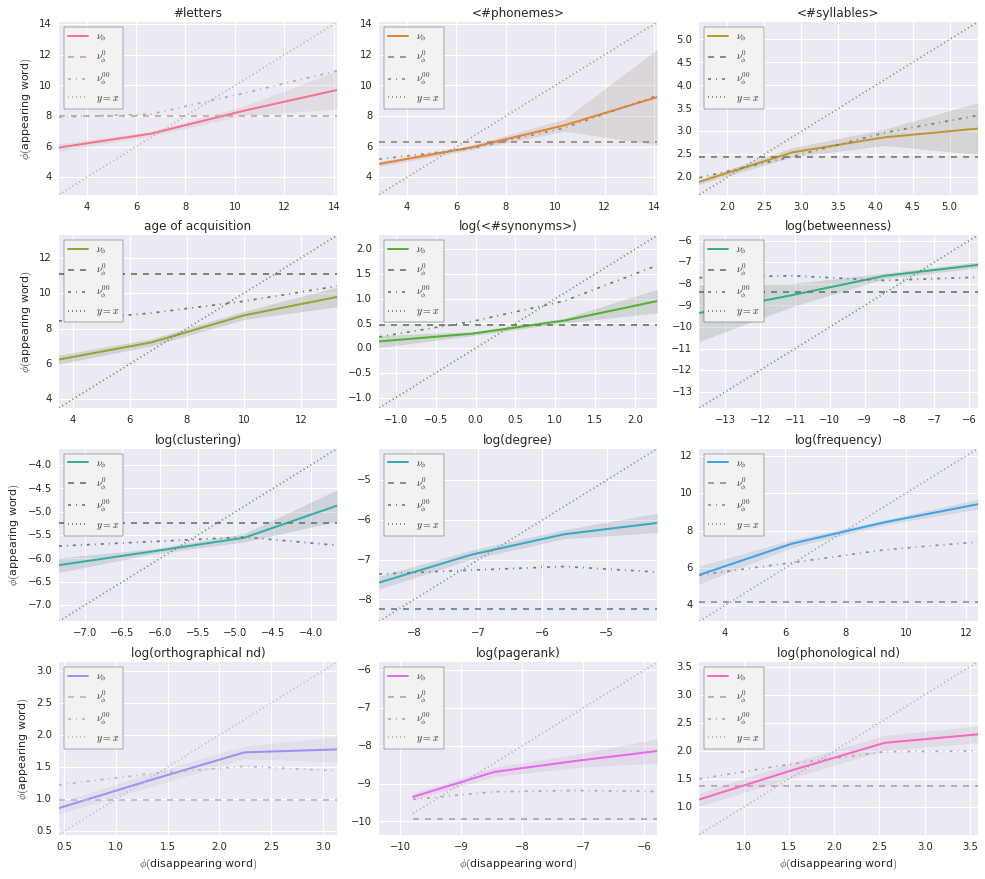

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

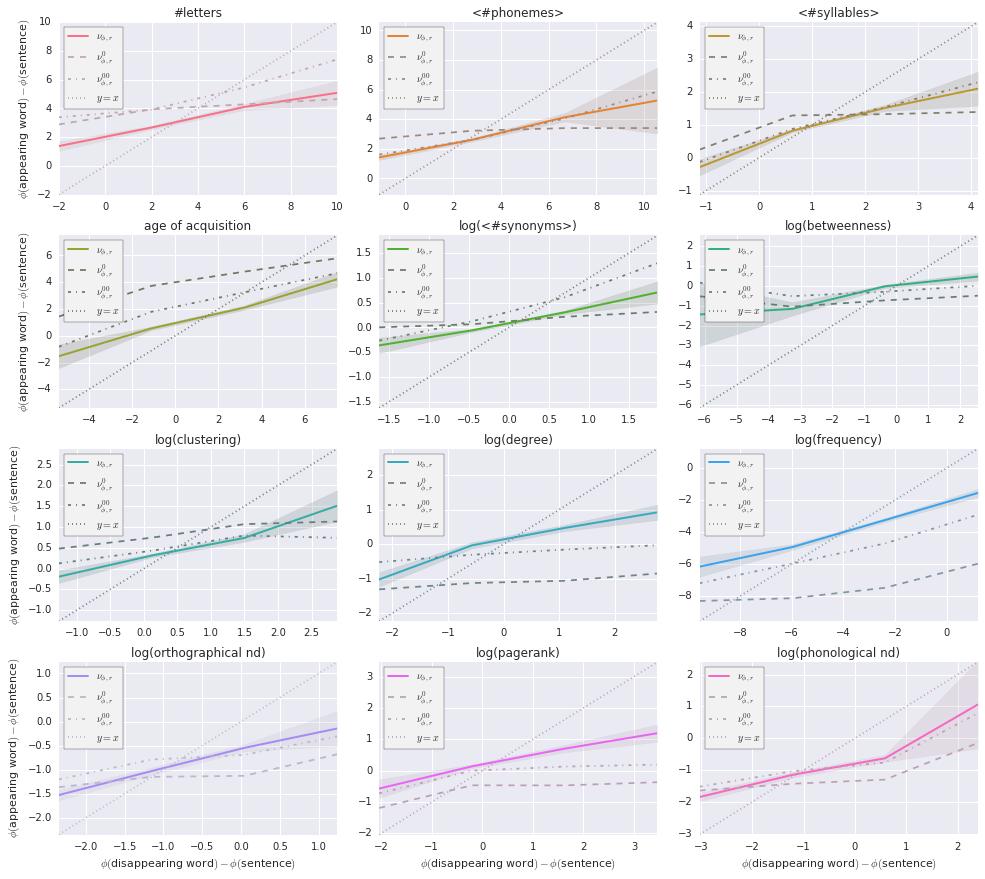

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

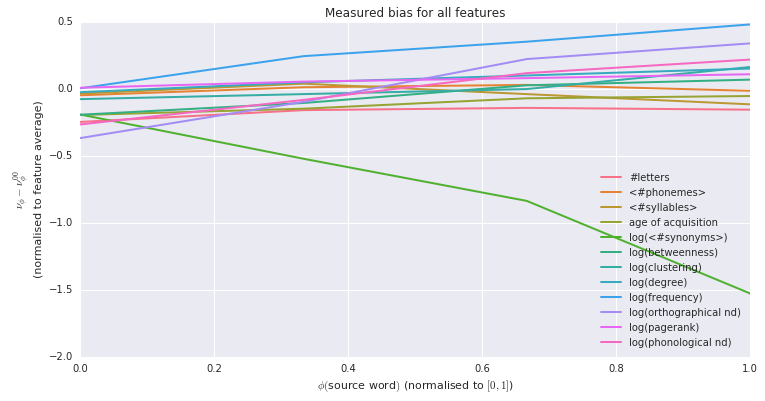

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

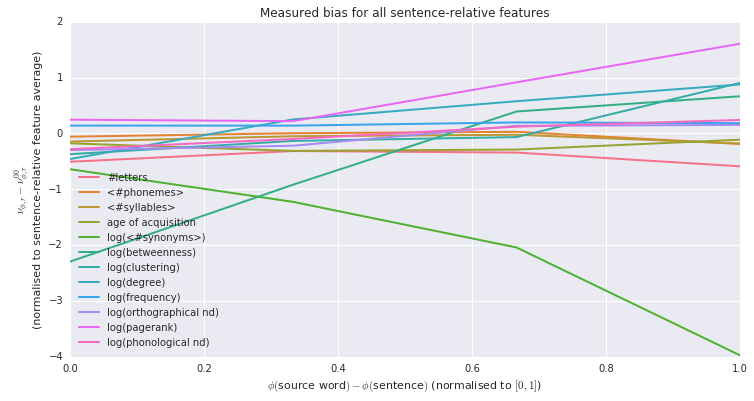

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

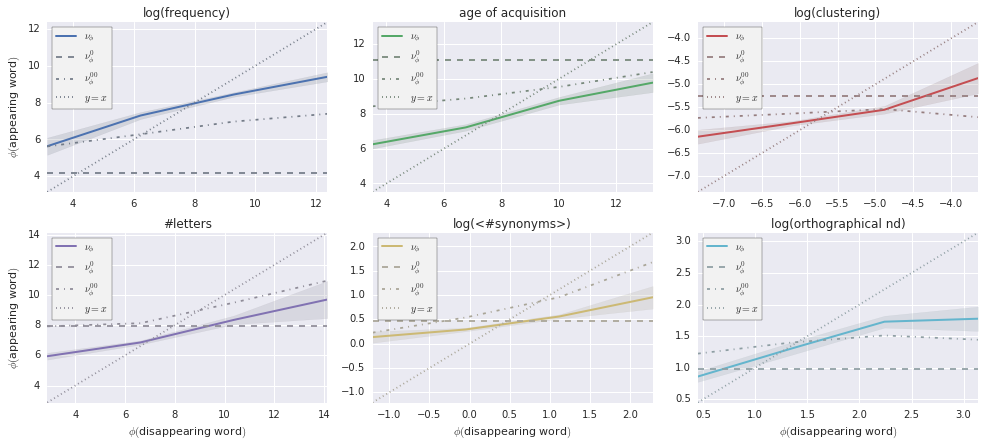

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

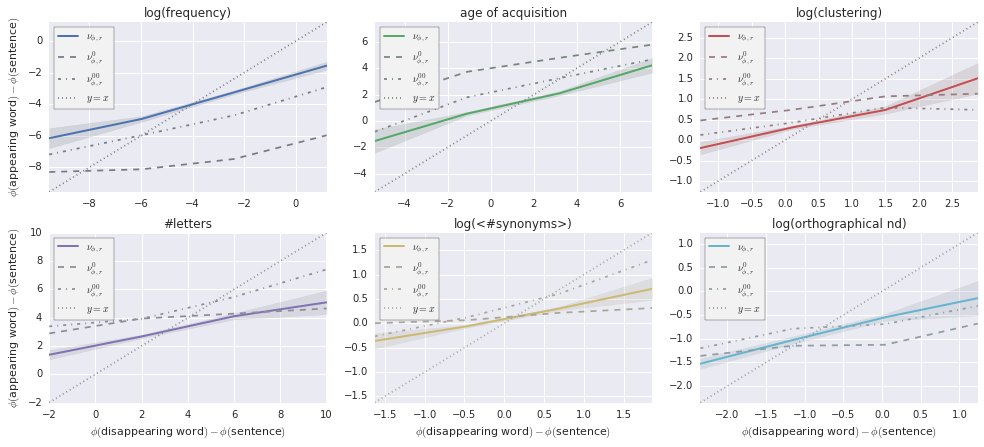

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

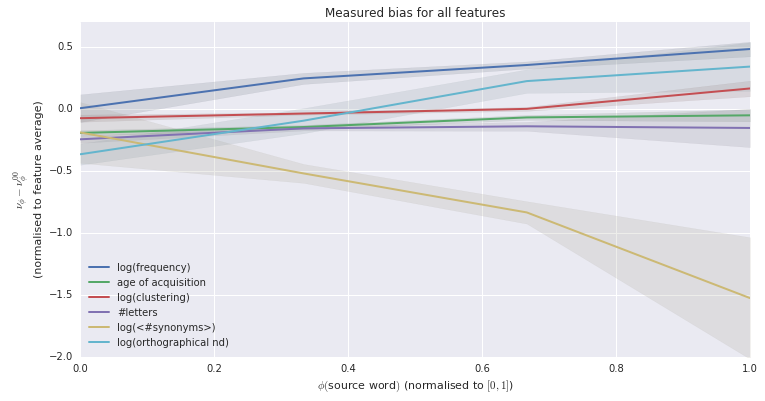

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

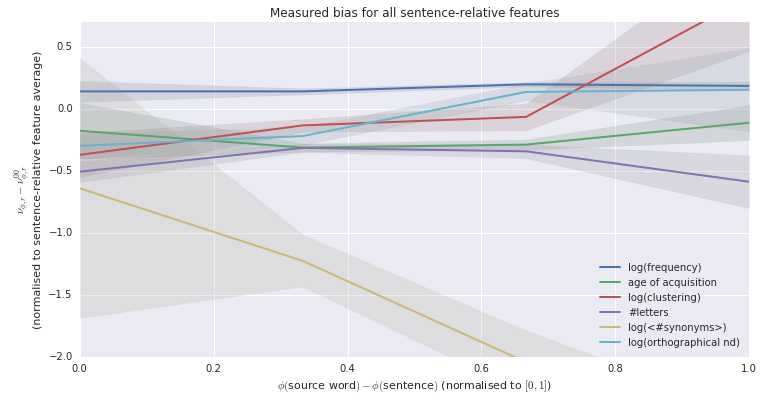

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


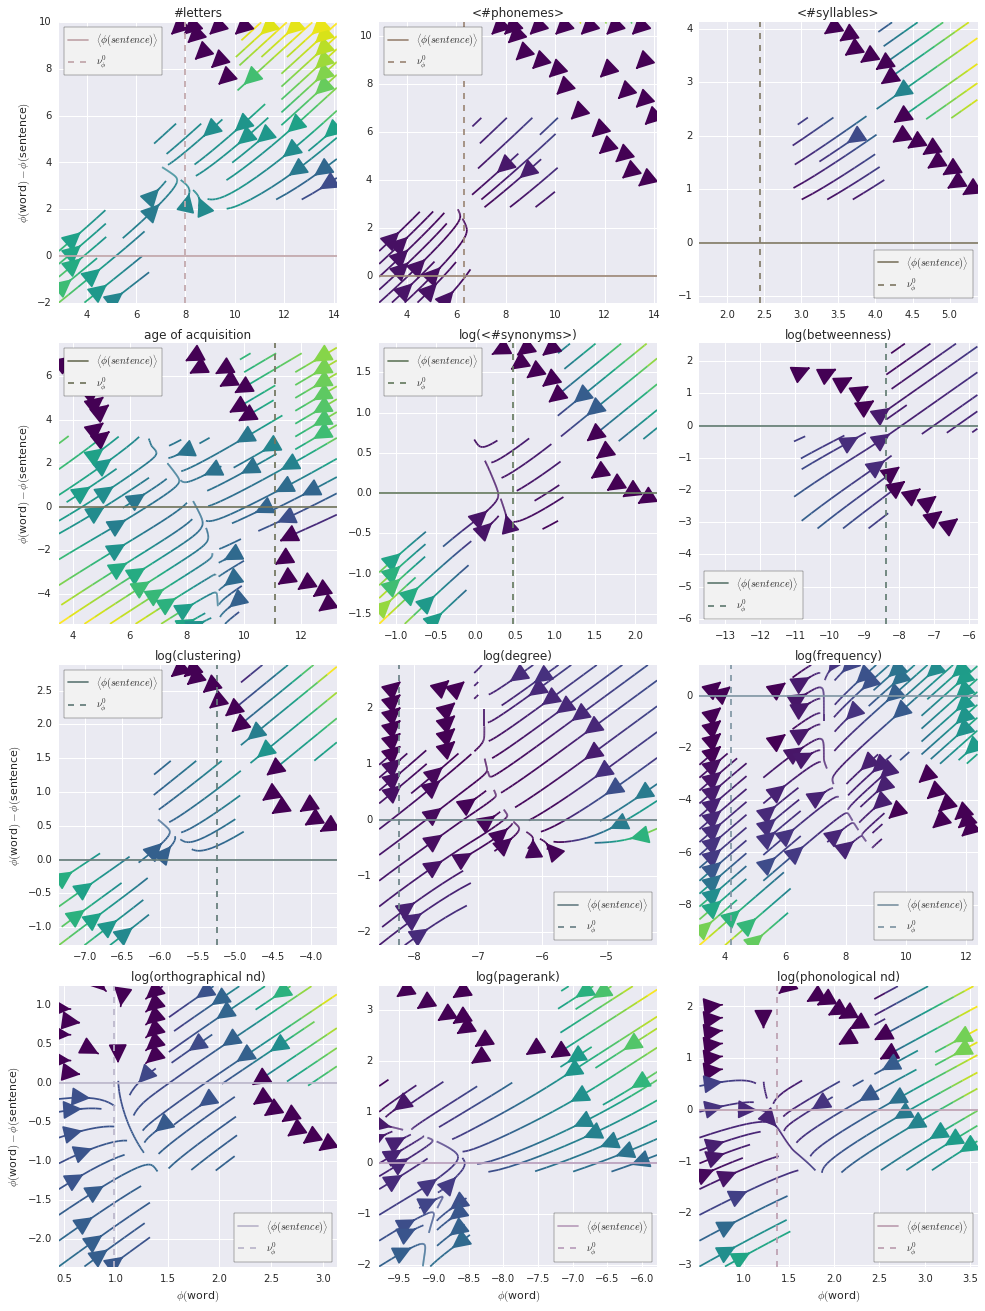

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


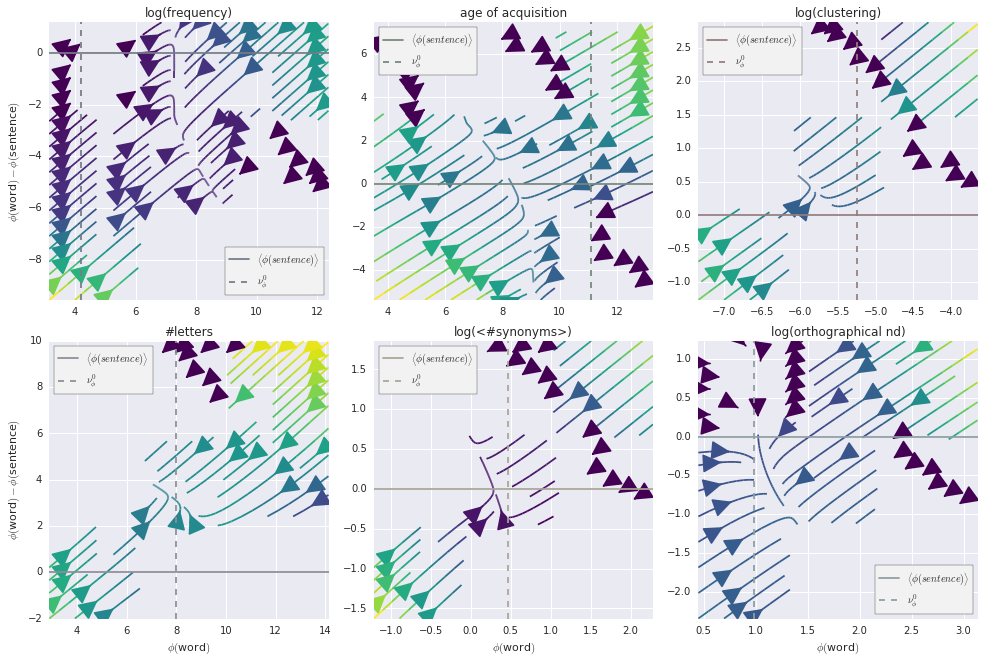

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.52250992  0.17399939  0.08956493  0.07355811  0.03471619  0.02865239
  0.02217452  0.01862682  0.01386789  0.00964897]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.479563,0.280277,-0.077859,0.246742,0.204008,-0.427455,0.211989,0.278167,-0.413468,0.277754,-0.172520,-0.000778
Component-1,-0.312984,0.407331,-0.140314,0.300155,0.268588,0.432741,-0.166233,0.288657,0.433154,-0.210314,0.154312,-0.017711
Component-2,0.739786,0.307751,-0.139574,0.089922,0.539255,-0.154225,-0.004390,0.062939,-0.047725,0.078036,-0.008680,-0.058615


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 99525) |         | Elapsed Time: 0:02:40 ETA:  184 days, 19:26:51

  0% (   18 of 99525) |                    | Elapsed Time: 0:02:41 ETA:  1:35:11

  0% (   61 of 99525) |                    | Elapsed Time: 0:02:42 ETA:  0:52:51

  0% (  123 of 99525) |                    | Elapsed Time: 0:02:43 ETA:  0:38:21

  0% (  190 of 99525) |                    | Elapsed Time: 0:02:44 ETA:  0:32:42

  0% (  245 of 99525) |                    | Elapsed Time: 0:02:45 ETA:  0:32:35

  0% (  286 of 99525) |                    | Elapsed Time: 0:02:46 ETA:  0:33:19

  0% (  333 of 99525) |                    | Elapsed Time: 0:02:47 ETA:  0:33:41

  0% (  406 of 99525) |                    | Elapsed Time: 0:02:48 ETA:  0:31:17

  0% (  485 of 99525) |                    | Elapsed Time: 0:02:49 ETA:  0:29:08

  0% (  576 of 99525) |                    | Elapsed Time: 0:02:50 ETA:  0:24:55

  0% (  646 of 99525) |                    | Elapsed Time: 0:02:51 ETA:  0:23:37

  0% (  734 of 99525) |                    | Elapsed Time: 0:02:52 ETA:  0:22:27

  0% (  833 of 99525) |                    | Elapsed Time: 0:02:53 ETA:  0:21:08

  0% (  923 of 99525) |                    | Elapsed Time: 0:02:54 ETA:  0:19:30

  1% ( 1030 of 99525) |                    | Elapsed Time: 0:02:55 ETA:  0:17:30

  1% ( 1131 of 99525) |                    | Elapsed Time: 0:02:56 ETA:  0:15:54

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:02:57 ETA:  0:14:47

  1% ( 1355 of 99525) |                    | Elapsed Time: 0:02:58 ETA:  0:14:19

  1% ( 1480 of 99525) |                    | Elapsed Time: 0:02:59 ETA:  0:13:09

  1% ( 1591 of 99525) |                    | Elapsed Time: 0:03:00 ETA:  0:12:42

  1% ( 1675 of 99525) |                    | Elapsed Time: 0:03:01 ETA:  0:12:58

  1% ( 1774 of 99525) |                    | Elapsed Time: 0:03:02 ETA:  0:12:48

  1% ( 1846 of 99525) |                    | Elapsed Time: 0:03:03 ETA:  0:13:30

  1% ( 1913 of 99525) |                    | Elapsed Time: 0:03:04 ETA:  0:14:13

  2% ( 2027 of 99525) |                    | Elapsed Time: 0:03:05 ETA:  0:13:59

  2% ( 2134 of 99525) |                    | Elapsed Time: 0:03:06 ETA:  0:13:48

  2% ( 2237 of 99525) |                    | Elapsed Time: 0:03:07 ETA:  0:13:55

  2% ( 2326 of 99525) |                    | Elapsed Time: 0:03:08 ETA:  0:14:37

  2% ( 2443 of 99525) |                    | Elapsed Time: 0:03:09 ETA:  0:14:29

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:03:10 ETA:  0:13:54

  2% ( 2575 of 99525) |                    | Elapsed Time: 0:03:11 ETA:  0:14:09

  2% ( 2638 of 99525) |                    | Elapsed Time: 0:03:12 ETA:  0:14:17

  2% ( 2703 of 99525) |                    | Elapsed Time: 0:03:13 ETA:  0:14:18

  2% ( 2769 of 99525) |                    | Elapsed Time: 0:03:14 ETA:  0:15:25

  2% ( 2835 of 99525) |                    | Elapsed Time: 0:03:15 ETA:  0:16:30

  2% ( 2899 of 99525) |                    | Elapsed Time: 0:03:16 ETA:  0:17:39

  2% ( 2966 of 99525) |                    | Elapsed Time: 0:03:17 ETA:  0:18:22

  3% ( 3032 of 99525) |                    | Elapsed Time: 0:03:18 ETA:  0:20:14

  3% ( 3099 of 99525) |                    | Elapsed Time: 0:03:19 ETA:  0:21:18

  3% ( 3166 of 99525) |                    | Elapsed Time: 0:03:20 ETA:  0:22:03

  3% ( 3231 of 99525) |                    | Elapsed Time: 0:03:21 ETA:  0:21:57

  3% ( 3299 of 99525) |                    | Elapsed Time: 0:03:22 ETA:  0:21:51

  3% ( 3340 of 99525) |                    | Elapsed Time: 0:03:23 ETA:  0:22:55

  3% ( 3411 of 99525) |                    | Elapsed Time: 0:03:24 ETA:  0:22:41

  3% ( 3480 of 99525) |                    | Elapsed Time: 0:03:25 ETA:  0:22:27

  3% ( 3575 of 99525) |                    | Elapsed Time: 0:03:26 ETA:  0:21:14

  3% ( 3666 of 99525) |                    | Elapsed Time: 0:03:27 ETA:  0:20:14

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:03:28 ETA:  0:19:36

  3% ( 3810 of 99525) |                    | Elapsed Time: 0:03:29 ETA:  0:19:13

  3% ( 3903 of 99525) |                    | Elapsed Time: 0:03:30 ETA:  0:18:15

  4% ( 4006 of 99525) |                    | Elapsed Time: 0:03:31 ETA:  0:17:09

  4% ( 4111 of 99525) |                    | Elapsed Time: 0:03:32 ETA:  0:15:25

  4% ( 4195 of 99525) |                    | Elapsed Time: 0:03:33 ETA:  0:15:07

  4% ( 4283 of 99525) |                    | Elapsed Time: 0:03:34 ETA:  0:14:39

  4% ( 4370 of 99525) |                    | Elapsed Time: 0:03:35 ETA:  0:14:48

  4% ( 4472 of 99525) |                    | Elapsed Time: 0:03:36 ETA:  0:14:38

  4% ( 4569 of 99525) |                    | Elapsed Time: 0:03:37 ETA:  0:14:26

  4% ( 4693 of 99525) |                    | Elapsed Time: 0:03:38 ETA:  0:13:27

  4% ( 4810 of 99525) |                    | Elapsed Time: 0:03:39 ETA:  0:12:58

  4% ( 4906 of 99525) |                    | Elapsed Time: 0:03:40 ETA:  0:13:05

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:03:41 ETA:  0:13:31

  5% ( 5081 of 99525) |#                   | Elapsed Time: 0:03:42 ETA:  0:13:09

  5% ( 5201 of 99525) |#                   | Elapsed Time: 0:03:43 ETA:  0:12:28

  5% ( 5323 of 99525) |#                   | Elapsed Time: 0:03:44 ETA:  0:11:58

  5% ( 5469 of 99525) |#                   | Elapsed Time: 0:03:45 ETA:  0:11:05

  5% ( 5594 of 99525) |#                   | Elapsed Time: 0:03:46 ETA:  0:11:04

  5% ( 5720 of 99525) |#                   | Elapsed Time: 0:03:47 ETA:  0:10:54

  5% ( 5851 of 99525) |#                   | Elapsed Time: 0:03:48 ETA:  0:10:20

  6% ( 5978 of 99525) |#                   | Elapsed Time: 0:03:49 ETA:  0:09:27

  6% ( 6109 of 99525) |#                   | Elapsed Time: 0:03:50 ETA:  0:09:23

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:03:51 ETA:  0:09:05

  6% ( 6356 of 99525) |#                   | Elapsed Time: 0:03:52 ETA:  0:08:54

  6% ( 6485 of 99525) |#                   | Elapsed Time: 0:03:53 ETA:  0:08:48

  6% ( 6619 of 99525) |#                   | Elapsed Time: 0:03:54 ETA:  0:08:55

  6% ( 6726 of 99525) |#                   | Elapsed Time: 0:03:55 ETA:  0:09:08

  6% ( 6846 of 99525) |#                   | Elapsed Time: 0:03:56 ETA:  0:09:11

  6% ( 6958 of 99525) |#                   | Elapsed Time: 0:03:57 ETA:  0:09:24

  7% ( 7066 of 99525) |#                   | Elapsed Time: 0:03:58 ETA:  0:09:37

  7% ( 7181 of 99525) |#                   | Elapsed Time: 0:03:59 ETA:  0:09:48

  7% ( 7295 of 99525) |#                   | Elapsed Time: 0:04:00 ETA:  0:09:57

  7% ( 7421 of 99525) |#                   | Elapsed Time: 0:04:01 ETA:  0:10:03

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:04:01 ETA:  0:10:07

  7% ( 7597 of 99525) |#                   | Elapsed Time: 0:04:02 ETA:  0:10:08

  7% ( 7725 of 99525) |#                   | Elapsed Time: 0:04:03 ETA:  0:09:47

  7% ( 7849 of 99525) |#                   | Elapsed Time: 0:04:04 ETA:  0:09:43

  8% ( 7968 of 99525) |#                   | Elapsed Time: 0:04:05 ETA:  0:09:36

  8% ( 8053 of 99525) |#                   | Elapsed Time: 0:04:06 ETA:  0:09:54

  8% ( 8143 of 99525) |#                   | Elapsed Time: 0:04:07 ETA:  0:10:15

  8% ( 8220 of 99525) |#                   | Elapsed Time: 0:04:08 ETA:  0:10:52

  8% ( 8273 of 99525) |#                   | Elapsed Time: 0:04:09 ETA:  0:12:08

  8% ( 8340 of 99525) |#                   | Elapsed Time: 0:04:10 ETA:  0:13:09

  8% ( 8432 of 99525) |#                   | Elapsed Time: 0:04:11 ETA:  0:14:01

  8% ( 8515 of 99525) |#                   | Elapsed Time: 0:04:12 ETA:  0:15:28

  8% ( 8617 of 99525) |#                   | Elapsed Time: 0:04:13 ETA:  0:16:03

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:04:14 ETA:  0:16:32

  8% ( 8836 of 99525) |#                   | Elapsed Time: 0:04:15 ETA:  0:15:24

  8% ( 8902 of 99525) |#                   | Elapsed Time: 0:04:16 ETA:  0:16:00

  9% ( 8993 of 99525) |#                   | Elapsed Time: 0:04:17 ETA:  0:15:33

  9% ( 9084 of 99525) |#                   | Elapsed Time: 0:04:18 ETA:  0:14:36

  9% ( 9147 of 99525) |#                   | Elapsed Time: 0:04:19 ETA:  0:14:38

  9% ( 9217 of 99525) |#                   | Elapsed Time: 0:04:20 ETA:  0:15:07

  9% ( 9288 of 99525) |#                   | Elapsed Time: 0:04:21 ETA:  0:14:58

  9% ( 9349 of 99525) |#                   | Elapsed Time: 0:04:22 ETA:  0:15:59

  9% ( 9449 of 99525) |#                   | Elapsed Time: 0:04:24 ETA:  0:16:01

  9% ( 9606 of 99525) |#                   | Elapsed Time: 0:04:25 ETA:  0:15:12

  9% ( 9750 of 99525) |#                   | Elapsed Time: 0:04:26 ETA:  0:13:23

  9% ( 9880 of 99525) |#                   | Elapsed Time: 0:04:27 ETA:  0:12:36

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:04:27 ETA:  0:12:30

 10% (10047 of 99525) |##                  | Elapsed Time: 0:04:28 ETA:  0:11:46

 10% (10142 of 99525) |##                  | Elapsed Time: 0:04:29 ETA:  0:11:23

 10% (10236 of 99525) |##                  | Elapsed Time: 0:04:30 ETA:  0:10:59

 10% (10333 of 99525) |##                  | Elapsed Time: 0:04:31 ETA:  0:10:25

 10% (10437 of 99525) |##                  | Elapsed Time: 0:04:32 ETA:  0:10:20

 10% (10585 of 99525) |##                  | Elapsed Time: 0:04:33 ETA:  0:10:28

 10% (10731 of 99525) |##                  | Elapsed Time: 0:04:34 ETA:  0:10:25

 10% (10869 of 99525) |##                  | Elapsed Time: 0:04:35 ETA:  0:10:16

 11% (10989 of 99525) |##                  | Elapsed Time: 0:04:36 ETA:  0:09:57

 11% (11127 of 99525) |##                  | Elapsed Time: 0:04:37 ETA:  0:09:20

 11% (11197 of 99525) |##                  | Elapsed Time: 0:04:38 ETA:  0:09:06

 11% (11290 of 99525) |##                  | Elapsed Time: 0:04:39 ETA:  0:09:07

 11% (11387 of 99525) |##                  | Elapsed Time: 0:04:40 ETA:  0:09:06

 11% (11490 of 99525) |##                  | Elapsed Time: 0:04:41 ETA:  0:09:06

 11% (11599 of 99525) |##                  | Elapsed Time: 0:04:42 ETA:  0:09:37

 11% (11687 of 99525) |##                  | Elapsed Time: 0:04:43 ETA:  0:10:28

 11% (11794 of 99525) |##                  | Elapsed Time: 0:04:44 ETA:  0:10:57

 11% (11896 of 99525) |##                  | Elapsed Time: 0:04:45 ETA:  0:11:15

 12% (12005 of 99525) |##                  | Elapsed Time: 0:04:46 ETA:  0:11:46

 12% (12113 of 99525) |##                  | Elapsed Time: 0:04:47 ETA:  0:11:36

 12% (12222 of 99525) |##                  | Elapsed Time: 0:04:48 ETA:  0:11:17

 12% (12332 of 99525) |##                  | Elapsed Time: 0:04:49 ETA:  0:11:02

 12% (12441 of 99525) |##                  | Elapsed Time: 0:04:50 ETA:  0:11:09

 12% (12548 of 99525) |##                  | Elapsed Time: 0:04:51 ETA:  0:10:47

 12% (12655 of 99525) |##                  | Elapsed Time: 0:04:52 ETA:  0:10:46

 12% (12762 of 99525) |##                  | Elapsed Time: 0:04:53 ETA:  0:10:40

 12% (12871 of 99525) |##                  | Elapsed Time: 0:04:54 ETA:  0:10:38

 13% (12982 of 99525) |##                  | Elapsed Time: 0:04:55 ETA:  0:10:34

 13% (13090 of 99525) |##                  | Elapsed Time: 0:04:56 ETA:  0:10:33

 13% (13194 of 99525) |##                  | Elapsed Time: 0:04:57 ETA:  0:10:39

 13% (13295 of 99525) |##                  | Elapsed Time: 0:04:58 ETA:  0:10:37

 13% (13397 of 99525) |##                  | Elapsed Time: 0:04:59 ETA:  0:10:40

 13% (13525 of 99525) |##                  | Elapsed Time: 0:05:00 ETA:  0:10:19

 13% (13645 of 99525) |##                  | Elapsed Time: 0:05:01 ETA:  0:10:05

 13% (13685 of 99525) |##                  | Elapsed Time: 0:05:02 ETA:  0:09:55

 13% (13813 of 99525) |##                  | Elapsed Time: 0:05:03 ETA:  0:09:36

 14% (13947 of 99525) |##                  | Elapsed Time: 0:05:04 ETA:  0:09:14

 14% (14070 of 99525) |##                  | Elapsed Time: 0:05:05 ETA:  0:09:00

 14% (14209 of 99525) |##                  | Elapsed Time: 0:05:06 ETA:  0:08:30

 14% (14340 of 99525) |##                  | Elapsed Time: 0:05:07 ETA:  0:08:05

 14% (14468 of 99525) |##                  | Elapsed Time: 0:05:08 ETA:  0:07:45

 14% (14574 of 99525) |##                  | Elapsed Time: 0:05:09 ETA:  0:08:01

 14% (14698 of 99525) |##                  | Elapsed Time: 0:05:10 ETA:  0:07:57

 14% (14842 of 99525) |##                  | Elapsed Time: 0:05:11 ETA:  0:07:46

 15% (14929 of 99525) |###                 | Elapsed Time: 0:05:11 ETA:  0:07:37

 15% (15071 of 99525) |###                 | Elapsed Time: 0:05:12 ETA:  0:07:31

 15% (15211 of 99525) |###                 | Elapsed Time: 0:05:13 ETA:  0:07:18

 15% (15348 of 99525) |###                 | Elapsed Time: 0:05:14 ETA:  0:07:19

 15% (15496 of 99525) |###                 | Elapsed Time: 0:05:15 ETA:  0:07:06

 15% (15647 of 99525) |###                 | Elapsed Time: 0:05:16 ETA:  0:06:50

 15% (15793 of 99525) |###                 | Elapsed Time: 0:05:17 ETA:  0:06:25

 15% (15917 of 99525) |###                 | Elapsed Time: 0:05:18 ETA:  0:06:25

 16% (16043 of 99525) |###                 | Elapsed Time: 0:05:19 ETA:  0:06:34

 16% (16173 of 99525) |###                 | Elapsed Time: 0:05:20 ETA:  0:06:57

 16% (16296 of 99525) |###                 | Elapsed Time: 0:05:21 ETA:  0:07:07

 16% (16425 of 99525) |###                 | Elapsed Time: 0:05:22 ETA:  0:07:17

 16% (16553 of 99525) |###                 | Elapsed Time: 0:05:23 ETA:  0:07:30

 16% (16658 of 99525) |###                 | Elapsed Time: 0:05:24 ETA:  0:08:05

 16% (16761 of 99525) |###                 | Elapsed Time: 0:05:25 ETA:  0:08:40

 16% (16869 of 99525) |###                 | Elapsed Time: 0:05:26 ETA:  0:08:53

 17% (16978 of 99525) |###                 | Elapsed Time: 0:05:27 ETA:  0:09:08

 17% (17086 of 99525) |###                 | Elapsed Time: 0:05:28 ETA:  0:09:11

 17% (17193 of 99525) |###                 | Elapsed Time: 0:05:29 ETA:  0:09:16

 17% (17301 of 99525) |###                 | Elapsed Time: 0:05:31 ETA:  0:09:30

 17% (17417 of 99525) |###                 | Elapsed Time: 0:05:31 ETA:  0:09:30

 17% (17538 of 99525) |###                 | Elapsed Time: 0:05:32 ETA:  0:09:35

 17% (17649 of 99525) |###                 | Elapsed Time: 0:05:33 ETA:  0:09:28

 17% (17759 of 99525) |###                 | Elapsed Time: 0:05:34 ETA:  0:09:21

 17% (17888 of 99525) |###                 | Elapsed Time: 0:05:35 ETA:  0:09:01

 18% (18014 of 99525) |###                 | Elapsed Time: 0:05:36 ETA:  0:08:46

 18% (18133 of 99525) |###                 | Elapsed Time: 0:05:37 ETA:  0:08:36

 18% (18261 of 99525) |###                 | Elapsed Time: 0:05:38 ETA:  0:08:18

 18% (18392 of 99525) |###                 | Elapsed Time: 0:05:39 ETA:  0:07:58

 18% (18514 of 99525) |###                 | Elapsed Time: 0:05:40 ETA:  0:07:58

 18% (18661 of 99525) |###                 | Elapsed Time: 0:05:42 ETA:  0:07:37

 18% (18794 of 99525) |###                 | Elapsed Time: 0:05:43 ETA:  0:07:18

 19% (18918 of 99525) |###                 | Elapsed Time: 0:05:44 ETA:  0:07:20

 19% (19043 of 99525) |###                 | Elapsed Time: 0:05:45 ETA:  0:07:20

 19% (19142 of 99525) |###                 | Elapsed Time: 0:05:46 ETA:  0:07:36

 19% (19240 of 99525) |###                 | Elapsed Time: 0:05:47 ETA:  0:08:00

 19% (19351 of 99525) |###                 | Elapsed Time: 0:05:48 ETA:  0:08:16

 19% (19446 of 99525) |###                 | Elapsed Time: 0:05:49 ETA:  0:08:40

 19% (19507 of 99525) |###                 | Elapsed Time: 0:05:50 ETA:  0:09:54

 19% (19587 of 99525) |###                 | Elapsed Time: 0:05:51 ETA:  0:10:25

 19% (19673 of 99525) |###                 | Elapsed Time: 0:05:52 ETA:  0:11:18

 19% (19798 of 99525) |###                 | Elapsed Time: 0:05:53 ETA:  0:11:16

 20% (19905 of 99525) |####                | Elapsed Time: 0:05:54 ETA:  0:11:21

 20% (20032 of 99525) |####                | Elapsed Time: 0:05:55 ETA:  0:10:46

 20% (20159 of 99525) |####                | Elapsed Time: 0:05:56 ETA:  0:10:14

 20% (20284 of 99525) |####                | Elapsed Time: 0:05:57 ETA:  0:09:58

 20% (20378 of 99525) |####                | Elapsed Time: 0:05:58 ETA:  0:09:57

 20% (20510 of 99525) |####                | Elapsed Time: 0:05:59 ETA:  0:08:47

 20% (20653 of 99525) |####                | Elapsed Time: 0:06:00 ETA:  0:07:51

 20% (20803 of 99525) |####                | Elapsed Time: 0:06:01 ETA:  0:07:02

 21% (20944 of 99525) |####                | Elapsed Time: 0:06:02 ETA:  0:06:51

 21% (21081 of 99525) |####                | Elapsed Time: 0:06:03 ETA:  0:06:42

 21% (21150 of 99525) |####                | Elapsed Time: 0:06:03 ETA:  0:06:28

 21% (21312 of 99525) |####                | Elapsed Time: 0:06:04 ETA:  0:06:05

 21% (21471 of 99525) |####                | Elapsed Time: 0:06:05 ETA:  0:05:43

 21% (21621 of 99525) |####                | Elapsed Time: 0:06:06 ETA:  0:05:09

 21% (21721 of 99525) |####                | Elapsed Time: 0:06:07 ETA:  0:05:26

 21% (21821 of 99525) |####                | Elapsed Time: 0:06:08 ETA:  0:05:51

 22% (21920 of 99525) |####                | Elapsed Time: 0:06:09 ETA:  0:06:23

 22% (22046 of 99525) |####                | Elapsed Time: 0:06:10 ETA:  0:06:32

 22% (22185 of 99525) |####                | Elapsed Time: 0:06:11 ETA:  0:06:29

 22% (22328 of 99525) |####                | Elapsed Time: 0:06:12 ETA:  0:06:30

 22% (22394 of 99525) |####                | Elapsed Time: 0:06:13 ETA:  0:06:49

 22% (22543 of 99525) |####                | Elapsed Time: 0:06:14 ETA:  0:06:55

 22% (22690 of 99525) |####                | Elapsed Time: 0:06:15 ETA:  0:06:56

 22% (22829 of 99525) |####                | Elapsed Time: 0:06:16 ETA:  0:06:28

 23% (22968 of 99525) |####                | Elapsed Time: 0:06:17 ETA:  0:06:00

 23% (23110 of 99525) |####                | Elapsed Time: 0:06:18 ETA:  0:05:32

 23% (23260 of 99525) |####                | Elapsed Time: 0:06:19 ETA:  0:05:18

 23% (23402 of 99525) |####                | Elapsed Time: 0:06:20 ETA:  0:05:15

 23% (23509 of 99525) |####                | Elapsed Time: 0:06:21 ETA:  0:05:35

 23% (23638 of 99525) |####                | Elapsed Time: 0:06:22 ETA:  0:06:03

 23% (23748 of 99525) |####                | Elapsed Time: 0:06:23 ETA:  0:06:28

 23% (23868 of 99525) |####                | Elapsed Time: 0:06:24 ETA:  0:06:41

 24% (24022 of 99525) |####                | Elapsed Time: 0:06:25 ETA:  0:06:29

 24% (24184 of 99525) |####                | Elapsed Time: 0:06:26 ETA:  0:06:15

 24% (24332 of 99525) |####                | Elapsed Time: 0:06:27 ETA:  0:06:16

 24% (24481 of 99525) |####                | Elapsed Time: 0:06:28 ETA:  0:06:10

 24% (24627 of 99525) |####                | Elapsed Time: 0:06:29 ETA:  0:05:42

 24% (24770 of 99525) |####                | Elapsed Time: 0:06:30 ETA:  0:05:20

 25% (24882 of 99525) |#####               | Elapsed Time: 0:06:31 ETA:  0:05:28

 25% (25002 of 99525) |#####               | Elapsed Time: 0:06:32 ETA:  0:05:27

 25% (25117 of 99525) |#####               | Elapsed Time: 0:06:33 ETA:  0:05:51

 25% (25242 of 99525) |#####               | Elapsed Time: 0:06:34 ETA:  0:06:14

 25% (25348 of 99525) |#####               | Elapsed Time: 0:06:35 ETA:  0:06:47

 25% (25478 of 99525) |#####               | Elapsed Time: 0:06:36 ETA:  0:07:01

 25% (25631 of 99525) |#####               | Elapsed Time: 0:06:37 ETA:  0:06:54

 25% (25772 of 99525) |#####               | Elapsed Time: 0:06:38 ETA:  0:06:55

 26% (25888 of 99525) |#####               | Elapsed Time: 0:06:39 ETA:  0:06:35

 26% (26016 of 99525) |#####               | Elapsed Time: 0:06:40 ETA:  0:06:33

 26% (26126 of 99525) |#####               | Elapsed Time: 0:06:41 ETA:  0:06:28

 26% (26266 of 99525) |#####               | Elapsed Time: 0:06:42 ETA:  0:06:10

 26% (26418 of 99525) |#####               | Elapsed Time: 0:06:43 ETA:  0:05:51

 26% (26562 of 99525) |#####               | Elapsed Time: 0:06:44 ETA:  0:05:26

 26% (26686 of 99525) |#####               | Elapsed Time: 0:06:45 ETA:  0:05:28

 26% (26844 of 99525) |#####               | Elapsed Time: 0:06:46 ETA:  0:05:24

 27% (27006 of 99525) |#####               | Elapsed Time: 0:06:47 ETA:  0:05:10

 27% (27167 of 99525) |#####               | Elapsed Time: 0:06:48 ETA:  0:04:44

 27% (27329 of 99525) |#####               | Elapsed Time: 0:06:49 ETA:  0:04:25

 27% (27370 of 99525) |#####               | Elapsed Time: 0:06:49 ETA:  0:04:12

 27% (27528 of 99525) |#####               | Elapsed Time: 0:06:50 ETA:  0:04:02

 27% (27685 of 99525) |#####               | Elapsed Time: 0:06:51 ETA:  0:03:58

 27% (27847 of 99525) |#####               | Elapsed Time: 0:06:52 ETA:  0:03:48

 28% (28008 of 99525) |#####               | Elapsed Time: 0:06:53 ETA:  0:03:29

 28% (28134 of 99525) |#####               | Elapsed Time: 0:06:54 ETA:  0:03:44

 28% (28277 of 99525) |#####               | Elapsed Time: 0:06:55 ETA:  0:03:52

 28% (28443 of 99525) |#####               | Elapsed Time: 0:06:56 ETA:  0:03:49

 28% (28614 of 99525) |#####               | Elapsed Time: 0:06:57 ETA:  0:03:48

 28% (28782 of 99525) |#####               | Elapsed Time: 0:06:58 ETA:  0:03:42

 29% (28949 of 99525) |#####               | Elapsed Time: 0:06:59 ETA:  0:03:36

 29% (29117 of 99525) |#####               | Elapsed Time: 0:07:00 ETA:  0:03:31

 29% (29271 of 99525) |#####               | Elapsed Time: 0:07:01 ETA:  0:03:34

 29% (29364 of 99525) |#####               | Elapsed Time: 0:07:02 ETA:  0:03:50

 29% (29473 of 99525) |#####               | Elapsed Time: 0:07:03 ETA:  0:04:07

 29% (29597 of 99525) |#####               | Elapsed Time: 0:07:04 ETA:  0:04:31

 29% (29726 of 99525) |#####               | Elapsed Time: 0:07:05 ETA:  0:04:51

 30% (29858 of 99525) |######              | Elapsed Time: 0:07:06 ETA:  0:04:47

 30% (30011 of 99525) |######              | Elapsed Time: 0:07:07 ETA:  0:04:54

 30% (30133 of 99525) |######              | Elapsed Time: 0:07:08 ETA:  0:05:22

 30% (30281 of 99525) |######              | Elapsed Time: 0:07:09 ETA:  0:05:33

 30% (30439 of 99525) |######              | Elapsed Time: 0:07:10 ETA:  0:05:30

 30% (30568 of 99525) |######              | Elapsed Time: 0:07:11 ETA:  0:05:06

 30% (30702 of 99525) |######              | Elapsed Time: 0:07:12 ETA:  0:04:50

 30% (30813 of 99525) |######              | Elapsed Time: 0:07:13 ETA:  0:04:56

 31% (30957 of 99525) |######              | Elapsed Time: 0:07:14 ETA:  0:04:46

 31% (31102 of 99525) |######              | Elapsed Time: 0:07:15 ETA:  0:04:33

 31% (31265 of 99525) |######              | Elapsed Time: 0:07:16 ETA:  0:04:26

 31% (31429 of 99525) |######              | Elapsed Time: 0:07:17 ETA:  0:04:02

 31% (31596 of 99525) |######              | Elapsed Time: 0:07:18 ETA:  0:03:51

 31% (31745 of 99525) |######              | Elapsed Time: 0:07:19 ETA:  0:03:55

 32% (31878 of 99525) |######              | Elapsed Time: 0:07:20 ETA:  0:03:52

 32% (32006 of 99525) |######              | Elapsed Time: 0:07:21 ETA:  0:03:54

 32% (32101 of 99525) |######              | Elapsed Time: 0:07:22 ETA:  0:04:02

 32% (32182 of 99525) |######              | Elapsed Time: 0:07:23 ETA:  0:04:37

 32% (32278 of 99525) |######              | Elapsed Time: 0:07:24 ETA:  0:05:20

 32% (32346 of 99525) |######              | Elapsed Time: 0:07:25 ETA:  0:05:42

 32% (32474 of 99525) |######              | Elapsed Time: 0:07:26 ETA:  0:06:08

 32% (32583 of 99525) |######              | Elapsed Time: 0:07:27 ETA:  0:06:55

 32% (32686 of 99525) |######              | Elapsed Time: 0:07:28 ETA:  0:07:37

 32% (32798 of 99525) |######              | Elapsed Time: 0:07:29 ETA:  0:07:56

 33% (32929 of 99525) |######              | Elapsed Time: 0:07:30 ETA:  0:07:53

 33% (33049 of 99525) |######              | Elapsed Time: 0:07:31 ETA:  0:07:28

 33% (33166 of 99525) |######              | Elapsed Time: 0:07:32 ETA:  0:06:53

 33% (33310 of 99525) |######              | Elapsed Time: 0:07:33 ETA:  0:06:12

 33% (33465 of 99525) |######              | Elapsed Time: 0:07:34 ETA:  0:05:50

 33% (33590 of 99525) |######              | Elapsed Time: 0:07:34 ETA:  0:05:33

 33% (33718 of 99525) |######              | Elapsed Time: 0:07:35 ETA:  0:05:19

 33% (33815 of 99525) |######              | Elapsed Time: 0:07:36 ETA:  0:05:22

 34% (33924 of 99525) |######              | Elapsed Time: 0:07:37 ETA:  0:05:23

 34% (34032 of 99525) |######              | Elapsed Time: 0:07:38 ETA:  0:05:38

 34% (34143 of 99525) |######              | Elapsed Time: 0:07:39 ETA:  0:05:43

 34% (34300 of 99525) |######              | Elapsed Time: 0:07:40 ETA:  0:05:13

 34% (34459 of 99525) |######              | Elapsed Time: 0:07:41 ETA:  0:05:03

 34% (34555 of 99525) |######              | Elapsed Time: 0:07:42 ETA:  0:05:43

 34% (34665 of 99525) |######              | Elapsed Time: 0:07:43 ETA:  0:06:12

 34% (34769 of 99525) |######              | Elapsed Time: 0:07:44 ETA:  0:06:31

 35% (34834 of 99525) |#######             | Elapsed Time: 0:07:45 ETA:  0:06:57

 35% (34957 of 99525) |#######             | Elapsed Time: 0:07:46 ETA:  0:06:44

 35% (35101 of 99525) |#######             | Elapsed Time: 0:07:47 ETA:  0:06:14

 35% (35221 of 99525) |#######             | Elapsed Time: 0:07:48 ETA:  0:06:06

 35% (35325 of 99525) |#######             | Elapsed Time: 0:07:49 ETA:  0:06:48

 35% (35433 of 99525) |#######             | Elapsed Time: 0:07:50 ETA:  0:07:33

 35% (35533 of 99525) |#######             | Elapsed Time: 0:07:51 ETA:  0:07:29

 35% (35660 of 99525) |#######             | Elapsed Time: 0:07:52 ETA:  0:07:11

 35% (35806 of 99525) |#######             | Elapsed Time: 0:07:53 ETA:  0:06:32

 36% (35934 of 99525) |#######             | Elapsed Time: 0:07:54 ETA:  0:05:42

 36% (36078 of 99525) |#######             | Elapsed Time: 0:07:56 ETA:  0:05:56

 36% (36194 of 99525) |#######             | Elapsed Time: 0:07:57 ETA:  0:05:58

 36% (36324 of 99525) |#######             | Elapsed Time: 0:07:58 ETA:  0:05:37

 36% (36419 of 99525) |#######             | Elapsed Time: 0:07:59 ETA:  0:05:49

 36% (36519 of 99525) |#######             | Elapsed Time: 0:08:00 ETA:  0:05:49

 36% (36522 of 99525) |#######             | Elapsed Time: 0:11:41 ETA:  7:08:02

 36% (36598 of 99525) |#######             | Elapsed Time: 0:11:42 ETA:  7:46:53

 36% (36678 of 99525) |#######             | Elapsed Time: 0:11:43 ETA:  8:17:45

 36% (36732 of 99525) |#######             | Elapsed Time: 0:11:44 ETA:  9:09:01

 36% (36778 of 99525) |#######             | Elapsed Time: 0:11:45 ETA:  8:51:54

 36% (36822 of 99525) |#######             | Elapsed Time: 0:11:46 ETA:  9:54:15

 37% (36849 of 99525) |#######            | Elapsed Time: 0:11:47 ETA:  11:53:21

 37% (36879 of 99525) |#######            | Elapsed Time: 0:11:48 ETA:  13:35:44

 37% (36935 of 99525) |#######            | Elapsed Time: 0:11:49 ETA:  15:03:15

 37% (37003 of 99525) |#######             | Elapsed Time: 0:11:50 ETA:  0:19:52

 37% (37080 of 99525) |#######             | Elapsed Time: 0:11:51 ETA:  0:19:48

 37% (37154 of 99525) |#######             | Elapsed Time: 0:11:52 ETA:  0:20:14

 37% (37246 of 99525) |#######             | Elapsed Time: 0:11:53 ETA:  0:17:49

 37% (37322 of 99525) |#######             | Elapsed Time: 0:11:54 ETA:  0:15:48

 37% (37400 of 99525) |#######             | Elapsed Time: 0:11:55 ETA:  0:14:06

 37% (37486 of 99525) |#######             | Elapsed Time: 0:11:56 ETA:  0:11:27

 37% (37584 of 99525) |#######             | Elapsed Time: 0:11:57 ETA:  0:09:09

 37% (37688 of 99525) |#######             | Elapsed Time: 0:11:58 ETA:  0:07:47

 37% (37772 of 99525) |#######             | Elapsed Time: 0:11:59 ETA:  0:07:22

 38% (37879 of 99525) |#######             | Elapsed Time: 0:12:00 ETA:  0:06:36

 38% (37963 of 99525) |#######             | Elapsed Time: 0:12:01 ETA:  0:06:20

 38% (38041 of 99525) |#######             | Elapsed Time: 0:12:02 ETA:  0:06:39

 38% (38142 of 99525) |#######             | Elapsed Time: 0:12:03 ETA:  0:06:14

 38% (38247 of 99525) |#######             | Elapsed Time: 0:12:04 ETA:  0:05:39

 38% (38342 of 99525) |#######             | Elapsed Time: 0:12:05 ETA:  0:05:28

 38% (38416 of 99525) |#######             | Elapsed Time: 0:12:06 ETA:  0:05:57

 38% (38480 of 99525) |#######             | Elapsed Time: 0:12:07 ETA:  0:06:51

 38% (38566 of 99525) |#######             | Elapsed Time: 0:12:08 ETA:  0:06:43

 38% (38648 of 99525) |#######             | Elapsed Time: 0:12:09 ETA:  0:07:24

 38% (38689 of 99525) |#######             | Elapsed Time: 0:12:10 ETA:  0:08:33

 38% (38765 of 99525) |#######             | Elapsed Time: 0:12:11 ETA:  0:08:35

 39% (38847 of 99525) |#######             | Elapsed Time: 0:12:12 ETA:  0:09:07

 39% (38938 of 99525) |#######             | Elapsed Time: 0:12:13 ETA:  0:09:32

 39% (39027 of 99525) |#######             | Elapsed Time: 0:12:14 ETA:  0:09:41

 39% (39162 of 99525) |#######             | Elapsed Time: 0:12:15 ETA:  0:07:52

 39% (39304 of 99525) |#######             | Elapsed Time: 0:12:16 ETA:  0:05:57

 39% (39439 of 99525) |#######             | Elapsed Time: 0:12:17 ETA:  0:04:58

 39% (39568 of 99525) |#######             | Elapsed Time: 0:12:18 ETA:  0:03:59

 39% (39692 of 99525) |#######             | Elapsed Time: 0:12:19 ETA:  0:02:37

 40% (39810 of 99525) |########            | Elapsed Time: 0:12:20 ETA:  0:01:51

 40% (39934 of 99525) |########            | Elapsed Time: 0:12:21 ETA:  0:01:17

 40% (40060 of 99525) |########            | Elapsed Time: 0:12:22 ETA:  0:00:50

 40% (40163 of 99525) |########            | Elapsed Time: 0:12:23 ETA:  0:00:39

 40% (40282 of 99525) |########            | Elapsed Time: 0:12:24 ETA:  0:00:49

 40% (40415 of 99525) |########            | Elapsed Time: 0:12:25 ETA:  0:00:55

 40% (40505 of 99525) |########            | Elapsed Time: 0:12:26 ETA:  0:01:28

 40% (40647 of 99525) |########            | Elapsed Time: 0:12:27 ETA:  0:01:17

 40% (40734 of 99525) |########            | Elapsed Time: 0:12:28 ETA:  0:01:45

 41% (40850 of 99525) |########            | Elapsed Time: 0:12:29 ETA:  0:01:55

 41% (40970 of 99525) |########            | Elapsed Time: 0:12:30 ETA:  0:01:57

 41% (41055 of 99525) |########            | Elapsed Time: 0:12:31 ETA:  0:02:07

 41% (41174 of 99525) |########            | Elapsed Time: 0:12:32 ETA:  0:01:52

 41% (41301 of 99525) |########            | Elapsed Time: 0:12:33 ETA:  0:01:44

 41% (41435 of 99525) |########            | Elapsed Time: 0:12:34 ETA:  0:01:44

 41% (41570 of 99525) |########            | Elapsed Time: 0:12:35 ETA:  0:01:06

 41% (41706 of 99525) |########            | Elapsed Time: 0:12:36 ETA:  0:01:09

 42% (41831 of 99525) |########            | Elapsed Time: 0:12:37 ETA:  0:00:40

 42% (41949 of 99525) |########            | Elapsed Time: 0:12:38 ETA:  0:00:37

 42% (42067 of 99525) |########            | Elapsed Time: 0:12:39 ETA:  0:00:39

 42% (42185 of 99525) |########            | Elapsed Time: 0:12:40 ETA:  0:00:38

 42% (42299 of 99525) |########            | Elapsed Time: 0:12:41 ETA:  0:00:48

 42% (42430 of 99525) |########            | Elapsed Time: 0:12:42 ETA:  0:00:48

 42% (42561 of 99525) |########            | Elapsed Time: 0:12:43 ETA:  0:00:50

 42% (42688 of 99525) |########            | Elapsed Time: 0:12:44 ETA:  0:00:57

 43% (42814 of 99525) |########            | Elapsed Time: 0:12:45 ETA:  0:00:54

 43% (42912 of 99525) |########            | Elapsed Time: 0:12:46 ETA:  0:01:10

 43% (43011 of 99525) |########            | Elapsed Time: 0:12:47 ETA:  0:01:25

 43% (43120 of 99525) |########            | Elapsed Time: 0:12:48 ETA:  0:01:32

 43% (43254 of 99525) |########            | Elapsed Time: 0:12:49 ETA:  0:01:07

 43% (43368 of 99525) |########            | Elapsed Time: 0:12:50 ETA:  0:01:10

 43% (43470 of 99525) |########            | Elapsed Time: 0:12:51 ETA:  0:01:33

 43% (43543 of 99525) |########            | Elapsed Time: 0:12:52 ETA:  0:02:49

 43% (43661 of 99525) |########            | Elapsed Time: 0:12:53 ETA:  0:02:57

 43% (43777 of 99525) |########            | Elapsed Time: 0:12:54 ETA:  0:02:36

 44% (43898 of 99525) |########            | Elapsed Time: 0:12:55 ETA:  0:02:12

 44% (44020 of 99525) |########            | Elapsed Time: 0:12:56 ETA:  0:01:58

 44% (44130 of 99525) |########            | Elapsed Time: 0:12:57 ETA:  0:02:22

 44% (44248 of 99525) |########            | Elapsed Time: 0:12:58 ETA:  0:02:17

 44% (44381 of 99525) |########            | Elapsed Time: 0:12:59 ETA:  0:01:44

 44% (44494 of 99525) |########            | Elapsed Time: 0:13:00 ETA:  0:00:57

 44% (44593 of 99525) |########            | Elapsed Time: 0:13:01 ETA:  0:01:15

 44% (44715 of 99525) |########            | Elapsed Time: 0:13:02 ETA:  0:01:11

 45% (44787 of 99525) |#########           | Elapsed Time: 0:13:03 ETA:  0:01:30

 45% (44876 of 99525) |#########           | Elapsed Time: 0:13:04 ETA:  0:01:57

 45% (45002 of 99525) |#########           | Elapsed Time: 0:13:05 ETA:  0:01:52

 45% (45124 of 99525) |#########           | Elapsed Time: 0:13:06 ETA:  0:01:40

 45% (45233 of 99525) |#########           | Elapsed Time: 0:13:07 ETA:  0:01:48

 45% (45369 of 99525) |#########           | Elapsed Time: 0:13:08 ETA:  0:01:44

 45% (45496 of 99525) |#########           | Elapsed Time: 0:13:09 ETA:  0:01:30

 45% (45603 of 99525) |#########           | Elapsed Time: 0:13:10 ETA:  0:01:22

 45% (45715 of 99525) |#########           | Elapsed Time: 0:13:11 ETA:  0:01:30

 46% (45798 of 99525) |#########           | Elapsed Time: 0:13:12 ETA:  0:01:37

 46% (45919 of 99525) |#########           | Elapsed Time: 0:13:13 ETA:  0:01:09

 46% (46031 of 99525) |#########           | Elapsed Time: 0:13:14 ETA:  0:01:15

 46% (46143 of 99525) |#########           | Elapsed Time: 0:13:15 ETA:  0:01:22

 46% (46272 of 99525) |#########           | Elapsed Time: 0:13:16 ETA:  0:01:04

 46% (46405 of 99525) |#########           | Elapsed Time: 0:13:17 ETA:  0:01:05

 46% (46544 of 99525) |#########           | Elapsed Time: 0:13:18 ETA:  0:00:54

 46% (46683 of 99525) |#########           | Elapsed Time: 0:13:19 ETA:  0:00:28

 47% (46808 of 99525) |#########           | Elapsed Time: 0:13:20 ETA:  0:00:16

 47% (46921 of 99525) |#########           | Elapsed Time: 0:13:21 ETA:  0:00:00

 47% (47039 of 99525) |#########           | Elapsed Time: 0:13:22 ETA:  0:00:00

 47% (47146 of 99525) |#########           | Elapsed Time: 0:13:23 ETA:  0:00:01

 47% (47240 of 99525) |#########           | Elapsed Time: 0:13:24 ETA:  0:00:14

 47% (47275 of 99525) |#########           | Elapsed Time: 0:13:24 ETA:  0:00:21

 47% (47429 of 99525) |#########           | Elapsed Time: 0:13:25 ETA:  0:00:03

 47% (47544 of 99525) |#########           | Elapsed Time: 0:13:26 ETA:  0:00:21

 47% (47665 of 99525) |#########           | Elapsed Time: 0:13:27 ETA:  0:00:35

 48% (47787 of 99525) |#########           | Elapsed Time: 0:13:28 ETA:  0:00:37

 48% (47910 of 99525) |#########           | Elapsed Time: 0:13:29 ETA:  0:00:28

 48% (48012 of 99525) |#########           | Elapsed Time: 0:13:30 ETA:  0:00:41

 48% (48102 of 99525) |#########           | Elapsed Time: 0:13:31 ETA:  0:00:55

 48% (48213 of 99525) |#########           | Elapsed Time: 0:13:32 ETA:  0:00:38

 48% (48338 of 99525) |#########           | Elapsed Time: 0:13:33 ETA:  0:00:31

 48% (48441 of 99525) |#########           | Elapsed Time: 0:13:34 ETA:  0:01:13

 48% (48519 of 99525) |#########           | Elapsed Time: 0:13:35 ETA:  0:01:26

 48% (48633 of 99525) |#########           | Elapsed Time: 0:13:36 ETA:  0:01:32

 48% (48701 of 99525) |#########           | Elapsed Time: 0:13:37 ETA:  0:02:25

 49% (48826 of 99525) |#########           | Elapsed Time: 0:13:38 ETA:  0:02:22

 49% (48943 of 99525) |#########           | Elapsed Time: 0:13:39 ETA:  0:02:05

 49% (49032 of 99525) |#########           | Elapsed Time: 0:13:40 ETA:  0:02:05

 49% (49132 of 99525) |#########           | Elapsed Time: 0:13:41 ETA:  0:02:16

 49% (49218 of 99525) |#########           | Elapsed Time: 0:13:42 ETA:  0:02:58

 49% (49333 of 99525) |#########           | Elapsed Time: 0:13:43 ETA:  0:02:44

 49% (49478 of 99525) |#########           | Elapsed Time: 0:13:44 ETA:  0:01:54

 49% (49619 of 99525) |#########           | Elapsed Time: 0:13:45 ETA:  0:01:28

 50% (49763 of 99525) |##########          | Elapsed Time: 0:13:46 ETA:  0:00:16

 50% (49913 of 99525) |##########          | Elapsed Time: 0:13:47 ETA:  0:00:00

 50% (50065 of 99525) |##########          | Elapsed Time: 0:13:48 ETA:  0:00:00

 50% (50204 of 99525) |##########          | Elapsed Time: 0:13:49 ETA:  0:00:00

 50% (50347 of 99525) |##########          | Elapsed Time: 0:13:50 ETA:  0:00:00

 50% (50453 of 99525) |##########          | Elapsed Time: 0:13:51 ETA:  0:00:00

 50% (50521 of 99525) |##########          | Elapsed Time: 0:13:52 ETA:  0:00:00

 50% (50626 of 99525) |##########          | Elapsed Time: 0:13:53 ETA:  0:00:00

 50% (50746 of 99525) |##########          | Elapsed Time: 0:13:54 ETA:  0:00:00

 51% (50864 of 99525) |##########          | Elapsed Time: 0:13:55 ETA:  0:00:00

 51% (50982 of 99525) |##########          | Elapsed Time: 0:13:56 ETA:  0:00:03

 51% (51007 of 99525) |##########          | Elapsed Time: 0:13:57 ETA:  0:00:33

 51% (51123 of 99525) |##########          | Elapsed Time: 0:13:58 ETA:  0:00:54

 51% (51249 of 99525) |##########          | Elapsed Time: 0:13:59 ETA:  0:01:10

 51% (51373 of 99525) |##########          | Elapsed Time: 0:14:00 ETA:  0:00:51

 51% (51500 of 99525) |##########          | Elapsed Time: 0:14:01 ETA:  0:00:00

 51% (51624 of 99525) |##########          | Elapsed Time: 0:14:02 ETA:  0:00:00

 52% (51760 of 99525) |##########          | Elapsed Time: 0:14:03 ETA:  0:00:00

 52% (51892 of 99525) |##########          | Elapsed Time: 0:14:04 ETA:  0:00:00

 52% (52060 of 99525) |##########          | Elapsed Time: 0:14:05 ETA:  0:00:00

 52% (52211 of 99525) |##########          | Elapsed Time: 0:14:06 ETA:  0:00:00

 52% (52251 of 99525) |##########          | Elapsed Time: 0:14:06 ETA:  0:00:00

 52% (52369 of 99525) |##########          | Elapsed Time: 0:14:07 ETA:  0:00:00

 52% (52484 of 99525) |##########          | Elapsed Time: 0:14:08 ETA:  0:00:00

 52% (52597 of 99525) |##########          | Elapsed Time: 0:14:09 ETA:  0:00:00

 52% (52740 of 99525) |##########          | Elapsed Time: 0:14:10 ETA:  0:00:00

 53% (52863 of 99525) |##########          | Elapsed Time: 0:14:11 ETA:  0:00:00

 53% (53014 of 99525) |##########          | Elapsed Time: 0:14:12 ETA:  0:00:00

 53% (53156 of 99525) |##########          | Elapsed Time: 0:14:13 ETA:  0:00:00

 53% (53276 of 99525) |##########          | Elapsed Time: 0:14:14 ETA:  0:00:00

 53% (53379 of 99525) |##########          | Elapsed Time: 0:14:15 ETA:  0:00:00

 53% (53495 of 99525) |##########          | Elapsed Time: 0:14:16 ETA:  0:00:00

 53% (53642 of 99525) |##########          | Elapsed Time: 0:14:17 ETA:  0:00:00

 54% (53764 of 99525) |##########          | Elapsed Time: 0:14:18 ETA:  0:00:00

 54% (53896 of 99525) |##########          | Elapsed Time: 0:14:19 ETA:  0:00:00

 54% (54029 of 99525) |##########          | Elapsed Time: 0:14:20 ETA:  0:00:00

 54% (54145 of 99525) |##########          | Elapsed Time: 0:14:21 ETA:  0:00:00

 54% (54290 of 99525) |##########          | Elapsed Time: 0:14:22 ETA:  0:00:00

 54% (54422 of 99525) |##########          | Elapsed Time: 0:14:23 ETA:  0:00:00

 54% (54541 of 99525) |##########          | Elapsed Time: 0:14:24 ETA:  0:00:00

 54% (54671 of 99525) |##########          | Elapsed Time: 0:14:25 ETA:  0:00:00

 55% (54739 of 99525) |###########         | Elapsed Time: 0:14:25 ETA:  0:00:00

 55% (54855 of 99525) |###########         | Elapsed Time: 0:14:26 ETA:  0:00:00

 55% (54959 of 99525) |###########         | Elapsed Time: 0:14:27 ETA:  0:00:00

 55% (55069 of 99525) |###########         | Elapsed Time: 0:14:28 ETA:  0:00:00

 55% (55218 of 99525) |###########         | Elapsed Time: 0:14:29 ETA:  0:00:00

 55% (55355 of 99525) |###########         | Elapsed Time: 0:14:30 ETA:  0:00:00

 55% (55504 of 99525) |###########         | Elapsed Time: 0:14:31 ETA:  0:00:00

 55% (55634 of 99525) |###########         | Elapsed Time: 0:14:32 ETA:  0:00:00

 56% (55790 of 99525) |###########         | Elapsed Time: 0:14:33 ETA:  0:00:00

 56% (55935 of 99525) |###########         | Elapsed Time: 0:14:34 ETA:  0:00:00

 56% (55983 of 99525) |###########         | Elapsed Time: 0:14:35 ETA:  0:00:00

 56% (56119 of 99525) |###########         | Elapsed Time: 0:14:36 ETA:  0:00:00

 56% (56246 of 99525) |###########         | Elapsed Time: 0:14:37 ETA:  0:00:00

 56% (56381 of 99525) |###########         | Elapsed Time: 0:14:38 ETA:  0:00:00

 56% (56463 of 99525) |###########         | Elapsed Time: 0:14:39 ETA:  0:00:00

 56% (56565 of 99525) |###########         | Elapsed Time: 0:14:40 ETA:  0:00:00

 56% (56714 of 99525) |###########         | Elapsed Time: 0:14:41 ETA:  0:00:00

 57% (56841 of 99525) |###########         | Elapsed Time: 0:14:42 ETA:  0:00:00

 57% (56980 of 99525) |###########         | Elapsed Time: 0:14:43 ETA:  0:00:00

 57% (57081 of 99525) |###########         | Elapsed Time: 0:14:44 ETA:  0:00:00

 57% (57115 of 99525) |###########         | Elapsed Time: 0:14:45 ETA:  0:00:24

 57% (57227 of 99525) |###########         | Elapsed Time: 0:14:46 ETA:  0:00:13

 57% (57357 of 99525) |###########         | Elapsed Time: 0:14:47 ETA:  0:00:17

 57% (57486 of 99525) |###########         | Elapsed Time: 0:14:48 ETA:  0:00:00

 57% (57622 of 99525) |###########         | Elapsed Time: 0:14:49 ETA:  0:00:00

 58% (57751 of 99525) |###########         | Elapsed Time: 0:14:50 ETA:  0:00:00

 58% (57907 of 99525) |###########         | Elapsed Time: 0:14:51 ETA:  0:00:00

 58% (58046 of 99525) |###########         | Elapsed Time: 0:14:52 ETA:  0:00:00

 58% (58183 of 99525) |###########         | Elapsed Time: 0:14:53 ETA:  0:00:00

 58% (58336 of 99525) |###########         | Elapsed Time: 0:14:54 ETA:  0:00:00

 58% (58471 of 99525) |###########         | Elapsed Time: 0:14:55 ETA:  0:00:00

 58% (58617 of 99525) |###########         | Elapsed Time: 0:14:56 ETA:  0:00:00

 59% (58752 of 99525) |###########         | Elapsed Time: 0:14:57 ETA:  0:00:00

 59% (58869 of 99525) |###########         | Elapsed Time: 0:14:58 ETA:  0:00:00

 59% (58988 of 99525) |###########         | Elapsed Time: 0:14:59 ETA:  0:00:00

 59% (59086 of 99525) |###########         | Elapsed Time: 0:15:00 ETA:  0:00:00

 59% (59224 of 99525) |###########         | Elapsed Time: 0:15:01 ETA:  0:00:00

 59% (59369 of 99525) |###########         | Elapsed Time: 0:15:02 ETA:  0:00:00

 59% (59487 of 99525) |###########         | Elapsed Time: 0:15:03 ETA:  0:00:00

 59% (59615 of 99525) |###########         | Elapsed Time: 0:15:04 ETA:  0:00:00

 60% (59715 of 99525) |############        | Elapsed Time: 0:15:05 ETA:  0:00:00

 60% (59865 of 99525) |############        | Elapsed Time: 0:15:06 ETA:  0:00:00

 60% (60001 of 99525) |############        | Elapsed Time: 0:15:07 ETA:  0:00:00

 60% (60088 of 99525) |############        | Elapsed Time: 0:15:08 ETA:  0:00:00

 60% (60168 of 99525) |############        | Elapsed Time: 0:15:09 ETA:  0:00:00

 60% (60286 of 99525) |############        | Elapsed Time: 0:15:10 ETA:  0:00:00

 60% (60424 of 99525) |############        | Elapsed Time: 0:15:11 ETA:  0:00:00

 60% (60525 of 99525) |############        | Elapsed Time: 0:15:12 ETA:  0:00:00

 60% (60616 of 99525) |############        | Elapsed Time: 0:15:13 ETA:  0:00:00

 60% (60709 of 99525) |############        | Elapsed Time: 0:15:14 ETA:  0:00:00

 61% (60773 of 99525) |############        | Elapsed Time: 0:15:15 ETA:  0:01:21

 61% (60845 of 99525) |############        | Elapsed Time: 0:15:16 ETA:  0:02:35

 61% (60918 of 99525) |############        | Elapsed Time: 0:15:17 ETA:  0:02:52

 61% (60960 of 99525) |############        | Elapsed Time: 0:15:17 ETA:  0:02:44

 61% (61055 of 99525) |############        | Elapsed Time: 0:15:18 ETA:  0:03:15

 61% (61168 of 99525) |############        | Elapsed Time: 0:15:19 ETA:  0:03:49

 61% (61273 of 99525) |############        | Elapsed Time: 0:15:20 ETA:  0:03:41

 61% (61351 of 99525) |############        | Elapsed Time: 0:15:21 ETA:  0:04:00

 61% (61436 of 99525) |############        | Elapsed Time: 0:15:22 ETA:  0:04:10

 61% (61525 of 99525) |############        | Elapsed Time: 0:15:23 ETA:  0:03:30

 61% (61625 of 99525) |############        | Elapsed Time: 0:15:24 ETA:  0:02:49

 61% (61695 of 99525) |############        | Elapsed Time: 0:15:25 ETA:  0:02:53

 62% (61771 of 99525) |############        | Elapsed Time: 0:15:26 ETA:  0:03:04

 62% (61855 of 99525) |############        | Elapsed Time: 0:15:27 ETA:  0:03:19

 62% (61937 of 99525) |############        | Elapsed Time: 0:15:28 ETA:  0:04:03

 62% (62016 of 99525) |############        | Elapsed Time: 0:15:29 ETA:  0:04:43

 62% (62103 of 99525) |############        | Elapsed Time: 0:15:30 ETA:  0:04:32

 62% (62115 of 99525) |############        | Elapsed Time: 0:15:31 ETA:  0:06:42

 62% (62146 of 99525) |############        | Elapsed Time: 0:15:32 ETA:  0:08:46

 62% (62204 of 99525) |############        | Elapsed Time: 0:15:33 ETA:  0:08:53

 62% (62291 of 99525) |############        | Elapsed Time: 0:15:34 ETA:  0:08:07

 62% (62378 of 99525) |############        | Elapsed Time: 0:15:35 ETA:  0:07:40

 62% (62497 of 99525) |############        | Elapsed Time: 0:15:36 ETA:  0:06:24

 62% (62629 of 99525) |############        | Elapsed Time: 0:15:37 ETA:  0:04:48

 63% (62709 of 99525) |############        | Elapsed Time: 0:15:38 ETA:  0:04:49

 63% (62776 of 99525) |############        | Elapsed Time: 0:15:39 ETA:  0:05:21

 63% (62846 of 99525) |############        | Elapsed Time: 0:15:40 ETA:  0:03:40

 63% (62935 of 99525) |############        | Elapsed Time: 0:15:41 ETA:  0:02:13

 63% (63025 of 99525) |############        | Elapsed Time: 0:15:42 ETA:  0:02:39

 63% (63116 of 99525) |############        | Elapsed Time: 0:15:43 ETA:  0:02:32

 63% (63209 of 99525) |############        | Elapsed Time: 0:15:44 ETA:  0:02:23

 63% (63309 of 99525) |############        | Elapsed Time: 0:15:45 ETA:  0:02:47

 63% (63384 of 99525) |############        | Elapsed Time: 0:15:46 ETA:  0:04:09

 63% (63448 of 99525) |############        | Elapsed Time: 0:15:47 ETA:  0:04:12

 63% (63542 of 99525) |############        | Elapsed Time: 0:15:48 ETA:  0:03:28

 63% (63615 of 99525) |############        | Elapsed Time: 0:15:49 ETA:  0:03:24

 63% (63686 of 99525) |############        | Elapsed Time: 0:15:50 ETA:  0:03:53

 64% (63760 of 99525) |############        | Elapsed Time: 0:15:51 ETA:  0:04:19

 64% (63820 of 99525) |############        | Elapsed Time: 0:15:52 ETA:  0:05:16

 64% (63905 of 99525) |############        | Elapsed Time: 0:15:53 ETA:  0:05:29

 64% (63956 of 99525) |############        | Elapsed Time: 0:15:54 ETA:  0:07:06

 64% (64028 of 99525) |############        | Elapsed Time: 0:15:55 ETA:  0:07:12

 64% (64119 of 99525) |############        | Elapsed Time: 0:15:56 ETA:  0:06:36

 64% (64218 of 99525) |############        | Elapsed Time: 0:15:57 ETA:  0:06:25

 64% (64297 of 99525) |############        | Elapsed Time: 0:15:58 ETA:  0:06:10

 64% (64376 of 99525) |############        | Elapsed Time: 0:15:59 ETA:  0:05:51

 64% (64455 of 99525) |############        | Elapsed Time: 0:16:00 ETA:  0:05:38

 64% (64545 of 99525) |############        | Elapsed Time: 0:16:01 ETA:  0:04:40

 65% (64692 of 99525) |#############       | Elapsed Time: 0:16:02 ETA:  0:02:14

 65% (64819 of 99525) |#############       | Elapsed Time: 0:16:03 ETA:  0:00:57

 65% (64972 of 99525) |#############       | Elapsed Time: 0:16:04 ETA:  0:00:00

 65% (65111 of 99525) |#############       | Elapsed Time: 0:16:05 ETA:  0:00:00

 65% (65257 of 99525) |#############       | Elapsed Time: 0:16:06 ETA:  0:00:00

 65% (65384 of 99525) |#############       | Elapsed Time: 0:16:07 ETA:  0:00:00

 65% (65519 of 99525) |#############       | Elapsed Time: 0:16:08 ETA:  0:00:00

 65% (65652 of 99525) |#############       | Elapsed Time: 0:16:09 ETA:  0:00:00

 66% (65758 of 99525) |#############       | Elapsed Time: 0:16:10 ETA:  0:00:00

 66% (65892 of 99525) |#############       | Elapsed Time: 0:16:11 ETA:  0:00:00

 66% (65936 of 99525) |#############       | Elapsed Time: 0:16:11 ETA:  0:00:00

 66% (66058 of 99525) |#############       | Elapsed Time: 0:16:12 ETA:  0:00:00

 66% (66195 of 99525) |#############       | Elapsed Time: 0:16:13 ETA:  0:00:00

 66% (66315 of 99525) |#############       | Elapsed Time: 0:16:14 ETA:  0:00:00

 66% (66414 of 99525) |#############       | Elapsed Time: 0:16:15 ETA:  0:00:00

 66% (66542 of 99525) |#############       | Elapsed Time: 0:16:16 ETA:  0:00:00

 67% (66706 of 99525) |#############       | Elapsed Time: 0:16:17 ETA:  0:00:00

 67% (66865 of 99525) |#############       | Elapsed Time: 0:16:18 ETA:  0:00:00

 67% (66951 of 99525) |#############       | Elapsed Time: 0:16:19 ETA:  0:00:00

 67% (67044 of 99525) |#############       | Elapsed Time: 0:16:20 ETA:  0:00:00

 67% (67149 of 99525) |#############       | Elapsed Time: 0:16:21 ETA:  0:00:00

 67% (67180 of 99525) |#############       | Elapsed Time: 0:16:22 ETA:  0:00:00

 67% (67310 of 99525) |#############       | Elapsed Time: 0:16:23 ETA:  0:00:00

 67% (67474 of 99525) |#############       | Elapsed Time: 0:16:24 ETA:  0:00:00

 67% (67616 of 99525) |#############       | Elapsed Time: 0:16:25 ETA:  0:00:00

 68% (67769 of 99525) |#############       | Elapsed Time: 0:16:26 ETA:  0:00:00

 68% (67919 of 99525) |#############       | Elapsed Time: 0:16:27 ETA:  0:00:00

 68% (67934 of 99525) |#############       | Elapsed Time: 0:16:28 ETA:  0:00:00

 68% (68022 of 99525) |#############       | Elapsed Time: 0:16:29 ETA:  0:00:00

 68% (68164 of 99525) |#############       | Elapsed Time: 0:16:30 ETA:  0:00:00

 68% (68285 of 99525) |#############       | Elapsed Time: 0:16:31 ETA:  0:00:00

 68% (68424 of 99525) |#############       | Elapsed Time: 0:16:33 ETA:  0:00:00

 68% (68559 of 99525) |#############       | Elapsed Time: 0:16:34 ETA:  0:00:00

 69% (68680 of 99525) |#############       | Elapsed Time: 0:16:35 ETA:  0:00:00

 69% (68806 of 99525) |#############       | Elapsed Time: 0:16:36 ETA:  0:00:00

 69% (68935 of 99525) |#############       | Elapsed Time: 0:16:37 ETA:  0:00:00

 69% (69035 of 99525) |#############       | Elapsed Time: 0:16:38 ETA:  0:00:00

 69% (69156 of 99525) |#############       | Elapsed Time: 0:16:39 ETA:  0:00:00

 69% (69290 of 99525) |#############       | Elapsed Time: 0:16:40 ETA:  0:00:00

 69% (69423 of 99525) |#############       | Elapsed Time: 0:16:41 ETA:  0:00:00

 69% (69569 of 99525) |#############       | Elapsed Time: 0:16:42 ETA:  0:00:00

 70% (69668 of 99525) |##############      | Elapsed Time: 0:16:42 ETA:  0:00:00

 70% (69803 of 99525) |##############      | Elapsed Time: 0:16:43 ETA:  0:00:00

 70% (69926 of 99525) |##############      | Elapsed Time: 0:16:44 ETA:  0:00:00

 70% (70037 of 99525) |##############      | Elapsed Time: 0:16:45 ETA:  0:00:00

 70% (70180 of 99525) |##############      | Elapsed Time: 0:16:46 ETA:  0:00:00

 70% (70296 of 99525) |##############      | Elapsed Time: 0:16:47 ETA:  0:00:00

 70% (70424 of 99525) |##############      | Elapsed Time: 0:16:48 ETA:  0:00:00

 70% (70565 of 99525) |##############      | Elapsed Time: 0:16:49 ETA:  0:00:00

 71% (70685 of 99525) |##############      | Elapsed Time: 0:16:50 ETA:  0:00:00

 71% (70770 of 99525) |##############      | Elapsed Time: 0:16:51 ETA:  0:00:00

 71% (70912 of 99525) |##############      | Elapsed Time: 0:16:53 ETA:  0:00:00

 71% (71075 of 99525) |##############      | Elapsed Time: 0:16:54 ETA:  0:00:00

 71% (71196 of 99525) |##############      | Elapsed Time: 0:16:55 ETA:  0:00:00

 71% (71304 of 99525) |##############      | Elapsed Time: 0:16:56 ETA:  0:00:00

 71% (71425 of 99525) |##############      | Elapsed Time: 0:16:57 ETA:  0:00:00

 71% (71551 of 99525) |##############      | Elapsed Time: 0:16:58 ETA:  0:00:00

 72% (71722 of 99525) |##############      | Elapsed Time: 0:16:59 ETA:  0:00:00

 72% (71809 of 99525) |##############      | Elapsed Time: 0:17:00 ETA:  0:00:00

 72% (71951 of 99525) |##############      | Elapsed Time: 0:17:01 ETA:  0:00:00

 72% (72089 of 99525) |##############      | Elapsed Time: 0:17:02 ETA:  0:00:00

 72% (72156 of 99525) |##############      | Elapsed Time: 0:17:02 ETA:  0:00:00

 72% (72310 of 99525) |##############      | Elapsed Time: 0:17:03 ETA:  0:00:00

 72% (72430 of 99525) |##############      | Elapsed Time: 0:17:04 ETA:  0:00:00

 72% (72561 of 99525) |##############      | Elapsed Time: 0:17:05 ETA:  0:00:00

 73% (72707 of 99525) |##############      | Elapsed Time: 0:17:06 ETA:  0:00:00

 73% (72853 of 99525) |##############      | Elapsed Time: 0:17:07 ETA:  0:00:00

 73% (72983 of 99525) |##############      | Elapsed Time: 0:17:08 ETA:  0:00:00

 73% (73122 of 99525) |##############      | Elapsed Time: 0:17:09 ETA:  0:00:00

 73% (73248 of 99525) |##############      | Elapsed Time: 0:17:10 ETA:  0:00:00

 73% (73400 of 99525) |##############      | Elapsed Time: 0:17:11 ETA:  0:00:00

 73% (73541 of 99525) |##############      | Elapsed Time: 0:17:12 ETA:  0:00:00

 74% (73691 of 99525) |##############      | Elapsed Time: 0:17:13 ETA:  0:00:00

 74% (73839 of 99525) |##############      | Elapsed Time: 0:17:14 ETA:  0:00:00

 74% (73947 of 99525) |##############      | Elapsed Time: 0:17:15 ETA:  0:00:00

 74% (74069 of 99525) |##############      | Elapsed Time: 0:17:16 ETA:  0:00:00

 74% (74157 of 99525) |##############      | Elapsed Time: 0:17:17 ETA:  0:00:00

 74% (74298 of 99525) |##############      | Elapsed Time: 0:17:18 ETA:  0:00:00

 74% (74439 of 99525) |##############      | Elapsed Time: 0:17:19 ETA:  0:00:00

 74% (74582 of 99525) |##############      | Elapsed Time: 0:17:20 ETA:  0:00:00

 75% (74644 of 99525) |###############     | Elapsed Time: 0:17:21 ETA:  0:00:00

 75% (74813 of 99525) |###############     | Elapsed Time: 0:17:22 ETA:  0:00:00

 75% (74942 of 99525) |###############     | Elapsed Time: 0:17:23 ETA:  0:00:00

 75% (75058 of 99525) |###############     | Elapsed Time: 0:17:24 ETA:  0:00:00

 75% (75174 of 99525) |###############     | Elapsed Time: 0:17:25 ETA:  0:00:00

 75% (75254 of 99525) |###############     | Elapsed Time: 0:17:26 ETA:  0:00:00

 75% (75346 of 99525) |###############     | Elapsed Time: 0:17:27 ETA:  0:00:00

 75% (75467 of 99525) |###############     | Elapsed Time: 0:17:28 ETA:  0:00:00

 75% (75633 of 99525) |###############     | Elapsed Time: 0:17:29 ETA:  0:00:00

 76% (75770 of 99525) |###############     | Elapsed Time: 0:17:30 ETA:  0:00:00

 76% (75888 of 99525) |###############     | Elapsed Time: 0:17:31 ETA:  0:00:00

 76% (76036 of 99525) |###############     | Elapsed Time: 0:17:32 ETA:  0:00:00

 76% (76175 of 99525) |###############     | Elapsed Time: 0:17:33 ETA:  0:00:00

 76% (76293 of 99525) |###############     | Elapsed Time: 0:17:34 ETA:  0:00:00

 76% (76410 of 99525) |###############     | Elapsed Time: 0:17:35 ETA:  0:00:00

 76% (76538 of 99525) |###############     | Elapsed Time: 0:17:36 ETA:  0:00:00

 77% (76669 of 99525) |###############     | Elapsed Time: 0:17:37 ETA:  0:00:00

 77% (76788 of 99525) |###############     | Elapsed Time: 0:17:38 ETA:  0:00:00

 77% (76910 of 99525) |###############     | Elapsed Time: 0:17:39 ETA:  0:00:00

 77% (77045 of 99525) |###############     | Elapsed Time: 0:17:40 ETA:  0:00:00

 77% (77132 of 99525) |###############     | Elapsed Time: 0:17:41 ETA:  0:00:00

 77% (77247 of 99525) |###############     | Elapsed Time: 0:17:42 ETA:  0:00:00

 77% (77362 of 99525) |###############     | Elapsed Time: 0:17:43 ETA:  0:00:00

 77% (77489 of 99525) |###############     | Elapsed Time: 0:17:44 ETA:  0:00:00

 77% (77595 of 99525) |###############     | Elapsed Time: 0:17:45 ETA:  0:00:00

 78% (77704 of 99525) |###############     | Elapsed Time: 0:17:46 ETA:  0:00:00

 78% (77820 of 99525) |###############     | Elapsed Time: 0:17:47 ETA:  0:00:00

 78% (77975 of 99525) |###############     | Elapsed Time: 0:17:48 ETA:  0:00:00

 78% (78145 of 99525) |###############     | Elapsed Time: 0:17:49 ETA:  0:00:00

 78% (78262 of 99525) |###############     | Elapsed Time: 0:17:50 ETA:  0:00:00

 78% (78376 of 99525) |###############     | Elapsed Time: 0:17:51 ETA:  0:00:00

 78% (78484 of 99525) |###############     | Elapsed Time: 0:17:52 ETA:  0:00:00

 79% (78633 of 99525) |###############     | Elapsed Time: 0:17:53 ETA:  0:00:00

 79% (78770 of 99525) |###############     | Elapsed Time: 0:17:54 ETA:  0:00:00

 79% (78905 of 99525) |###############     | Elapsed Time: 0:17:55 ETA:  0:00:00

 79% (79066 of 99525) |###############     | Elapsed Time: 0:17:56 ETA:  0:00:00

 79% (79217 of 99525) |###############     | Elapsed Time: 0:17:57 ETA:  0:00:00

 79% (79337 of 99525) |###############     | Elapsed Time: 0:17:58 ETA:  0:00:00

 79% (79395 of 99525) |###############     | Elapsed Time: 0:17:59 ETA:  0:00:00

 79% (79516 of 99525) |###############     | Elapsed Time: 0:18:00 ETA:  0:00:00

 80% (79620 of 99525) |################    | Elapsed Time: 0:18:00 ETA:  0:00:00

 80% (79710 of 99525) |################    | Elapsed Time: 0:18:01 ETA:  0:00:00

 80% (79822 of 99525) |################    | Elapsed Time: 0:18:02 ETA:  0:00:00

 80% (79926 of 99525) |################    | Elapsed Time: 0:18:03 ETA:  0:00:00

 80% (80031 of 99525) |################    | Elapsed Time: 0:18:04 ETA:  0:00:00

 80% (80157 of 99525) |################    | Elapsed Time: 0:18:05 ETA:  0:00:00

 80% (80272 of 99525) |################    | Elapsed Time: 0:18:06 ETA:  0:00:00

 80% (80377 of 99525) |################    | Elapsed Time: 0:18:07 ETA:  0:00:00

 80% (80519 of 99525) |################    | Elapsed Time: 0:18:08 ETA:  0:00:00

 81% (80666 of 99525) |################    | Elapsed Time: 0:18:09 ETA:  0:00:00

 81% (80795 of 99525) |################    | Elapsed Time: 0:18:10 ETA:  0:00:00

 81% (80865 of 99525) |################    | Elapsed Time: 0:18:11 ETA:  0:00:00

 81% (81007 of 99525) |################    | Elapsed Time: 0:18:12 ETA:  0:00:00

 81% (81117 of 99525) |################    | Elapsed Time: 0:18:13 ETA:  0:00:00

 81% (81264 of 99525) |################    | Elapsed Time: 0:18:14 ETA:  0:00:00

 81% (81412 of 99525) |################    | Elapsed Time: 0:18:15 ETA:  0:00:00

 81% (81532 of 99525) |################    | Elapsed Time: 0:18:16 ETA:  0:00:00

 82% (81655 of 99525) |################    | Elapsed Time: 0:18:17 ETA:  0:00:00

 82% (81788 of 99525) |################    | Elapsed Time: 0:18:18 ETA:  0:00:00

 82% (81936 of 99525) |################    | Elapsed Time: 0:18:19 ETA:  0:00:00

 82% (82072 of 99525) |################    | Elapsed Time: 0:18:20 ETA:  0:00:00

 82% (82109 of 99525) |################    | Elapsed Time: 0:18:20 ETA:  0:00:00

 82% (82240 of 99525) |################    | Elapsed Time: 0:18:21 ETA:  0:00:00

 82% (82367 of 99525) |################    | Elapsed Time: 0:18:22 ETA:  0:00:00

 82% (82512 of 99525) |################    | Elapsed Time: 0:18:23 ETA:  0:00:00

 83% (82653 of 99525) |################    | Elapsed Time: 0:18:24 ETA:  0:00:00

 83% (82792 of 99525) |################    | Elapsed Time: 0:18:25 ETA:  0:00:00

 83% (82927 of 99525) |################    | Elapsed Time: 0:18:26 ETA:  0:00:00

 83% (83052 of 99525) |################    | Elapsed Time: 0:18:27 ETA:  0:00:00

 83% (83186 of 99525) |################    | Elapsed Time: 0:18:28 ETA:  0:00:00

 83% (83318 of 99525) |################    | Elapsed Time: 0:18:29 ETA:  0:00:00

 83% (83353 of 99525) |################    | Elapsed Time: 0:18:30 ETA:  0:00:00

 83% (83486 of 99525) |################    | Elapsed Time: 0:18:31 ETA:  0:00:00

 84% (83625 of 99525) |################    | Elapsed Time: 0:18:32 ETA:  0:00:00

 84% (83769 of 99525) |################    | Elapsed Time: 0:18:33 ETA:  0:00:00

 84% (83893 of 99525) |################    | Elapsed Time: 0:18:34 ETA:  0:00:00

 84% (84014 of 99525) |################    | Elapsed Time: 0:18:35 ETA:  0:00:00

 84% (84147 of 99525) |################    | Elapsed Time: 0:18:36 ETA:  0:00:00

 84% (84324 of 99525) |################    | Elapsed Time: 0:18:37 ETA:  0:00:00

 84% (84489 of 99525) |################    | Elapsed Time: 0:18:38 ETA:  0:00:00

 84% (84560 of 99525) |################    | Elapsed Time: 0:18:39 ETA:  0:00:00

 85% (84597 of 99525) |#################   | Elapsed Time: 0:18:39 ETA:  0:00:00

 85% (84716 of 99525) |#################   | Elapsed Time: 0:18:40 ETA:  0:00:00

 85% (84848 of 99525) |#################   | Elapsed Time: 0:18:41 ETA:  0:00:00

 85% (84977 of 99525) |#################   | Elapsed Time: 0:18:42 ETA:  0:00:00

 85% (85100 of 99525) |#################   | Elapsed Time: 0:18:43 ETA:  0:00:00

 85% (85232 of 99525) |#################   | Elapsed Time: 0:18:44 ETA:  0:00:00

 85% (85367 of 99525) |#################   | Elapsed Time: 0:18:45 ETA:  0:00:00

 85% (85468 of 99525) |#################   | Elapsed Time: 0:18:46 ETA:  0:00:00

 85% (85589 of 99525) |#################   | Elapsed Time: 0:18:47 ETA:  0:00:00

 86% (85722 of 99525) |#################   | Elapsed Time: 0:18:48 ETA:  0:00:00

 86% (85841 of 99525) |#################   | Elapsed Time: 0:18:49 ETA:  0:00:00

 86% (85968 of 99525) |#################   | Elapsed Time: 0:18:50 ETA:  0:00:00

 86% (86111 of 99525) |#################   | Elapsed Time: 0:18:51 ETA:  0:00:00

 86% (86230 of 99525) |#################   | Elapsed Time: 0:18:52 ETA:  0:00:00

 86% (86341 of 99525) |#################   | Elapsed Time: 0:18:53 ETA:  0:00:00

 86% (86454 of 99525) |#################   | Elapsed Time: 0:18:54 ETA:  0:00:00

 87% (86590 of 99525) |#################   | Elapsed Time: 0:18:55 ETA:  0:00:00

 87% (86708 of 99525) |#################   | Elapsed Time: 0:18:56 ETA:  0:00:00

 87% (86823 of 99525) |#################   | Elapsed Time: 0:18:57 ETA:  0:00:00

 87% (86958 of 99525) |#################   | Elapsed Time: 0:18:58 ETA:  0:00:00

 87% (87085 of 99525) |#################   | Elapsed Time: 0:18:59 ETA:  0:00:00

 87% (87206 of 99525) |#################   | Elapsed Time: 0:19:00 ETA:  0:00:00

 87% (87352 of 99525) |#################   | Elapsed Time: 0:19:01 ETA:  0:00:00

 87% (87485 of 99525) |#################   | Elapsed Time: 0:19:02 ETA:  0:00:00

 88% (87610 of 99525) |#################   | Elapsed Time: 0:19:03 ETA:  0:00:00

 88% (87750 of 99525) |#################   | Elapsed Time: 0:19:04 ETA:  0:00:00

 88% (87845 of 99525) |#################   | Elapsed Time: 0:19:05 ETA:  0:00:00

 88% (87982 of 99525) |#################   | Elapsed Time: 0:19:06 ETA:  0:00:00

 88% (88095 of 99525) |#################   | Elapsed Time: 0:19:07 ETA:  0:00:00

 88% (88211 of 99525) |#################   | Elapsed Time: 0:19:08 ETA:  0:00:00

 88% (88329 of 99525) |#################   | Elapsed Time: 0:19:09 ETA:  0:00:00

 88% (88447 of 99525) |#################   | Elapsed Time: 0:19:10 ETA:  0:00:00

 89% (88588 of 99525) |#################   | Elapsed Time: 0:19:11 ETA:  0:00:00

 89% (88735 of 99525) |#################   | Elapsed Time: 0:19:12 ETA:  0:00:00

 89% (88875 of 99525) |#################   | Elapsed Time: 0:19:13 ETA:  0:00:00

 89% (89006 of 99525) |#################   | Elapsed Time: 0:19:14 ETA:  0:00:00

 89% (89182 of 99525) |#################   | Elapsed Time: 0:19:15 ETA:  0:00:00

 89% (89304 of 99525) |#################   | Elapsed Time: 0:19:16 ETA:  0:00:00

 89% (89440 of 99525) |#################   | Elapsed Time: 0:19:17 ETA:  0:00:00

 90% (89573 of 99525) |##################  | Elapsed Time: 0:19:18 ETA:  0:00:00

 90% (89703 of 99525) |##################  | Elapsed Time: 0:19:19 ETA:  0:00:00

 90% (89832 of 99525) |##################  | Elapsed Time: 0:19:20 ETA:  0:00:00

 90% (89969 of 99525) |##################  | Elapsed Time: 0:19:21 ETA:  0:00:00

 90% (90107 of 99525) |##################  | Elapsed Time: 0:19:22 ETA:  0:00:00

 90% (90221 of 99525) |##################  | Elapsed Time: 0:19:23 ETA:  0:00:00

 90% (90329 of 99525) |##################  | Elapsed Time: 0:19:24 ETA:  0:00:00

 90% (90448 of 99525) |##################  | Elapsed Time: 0:19:25 ETA:  0:00:00

 91% (90576 of 99525) |##################  | Elapsed Time: 0:19:26 ETA:  0:00:00

 91% (90726 of 99525) |##################  | Elapsed Time: 0:19:27 ETA:  0:00:00

 91% (90817 of 99525) |##################  | Elapsed Time: 0:19:28 ETA:  0:00:00

 91% (90950 of 99525) |##################  | Elapsed Time: 0:19:29 ETA:  0:00:00

 91% (91063 of 99525) |##################  | Elapsed Time: 0:19:30 ETA:  0:00:00

 91% (91154 of 99525) |##################  | Elapsed Time: 0:19:31 ETA:  0:00:00

 91% (91279 of 99525) |##################  | Elapsed Time: 0:19:32 ETA:  0:00:00

 91% (91383 of 99525) |##################  | Elapsed Time: 0:19:33 ETA:  0:00:00

 91% (91503 of 99525) |##################  | Elapsed Time: 0:19:34 ETA:  0:00:00

 92% (91622 of 99525) |##################  | Elapsed Time: 0:19:35 ETA:  0:00:00

 92% (91729 of 99525) |##################  | Elapsed Time: 0:19:36 ETA:  0:00:00

 92% (91861 of 99525) |##################  | Elapsed Time: 0:19:37 ETA:  0:00:00

 92% (91989 of 99525) |##################  | Elapsed Time: 0:19:38 ETA:  0:00:00

 92% (92061 of 99525) |##################  | Elapsed Time: 0:19:39 ETA:  0:00:00

 92% (92169 of 99525) |##################  | Elapsed Time: 0:19:40 ETA:  0:00:00

 92% (92278 of 99525) |##################  | Elapsed Time: 0:19:41 ETA:  0:00:00

 92% (92390 of 99525) |##################  | Elapsed Time: 0:19:42 ETA:  0:00:00

 92% (92515 of 99525) |##################  | Elapsed Time: 0:19:43 ETA:  0:00:00

 93% (92657 of 99525) |##################  | Elapsed Time: 0:19:44 ETA:  0:00:00

 93% (92784 of 99525) |##################  | Elapsed Time: 0:19:45 ETA:  0:00:00

 93% (92934 of 99525) |##################  | Elapsed Time: 0:19:46 ETA:  0:00:00

 93% (93052 of 99525) |##################  | Elapsed Time: 0:19:47 ETA:  0:00:00

 93% (93158 of 99525) |##################  | Elapsed Time: 0:19:48 ETA:  0:00:00

 93% (93305 of 99525) |##################  | Elapsed Time: 0:19:49 ETA:  0:00:00

 93% (93421 of 99525) |##################  | Elapsed Time: 0:19:50 ETA:  0:00:00

 94% (93557 of 99525) |##################  | Elapsed Time: 0:19:51 ETA:  0:00:00

 94% (93655 of 99525) |##################  | Elapsed Time: 0:19:52 ETA:  0:00:00

 94% (93768 of 99525) |##################  | Elapsed Time: 0:19:53 ETA:  0:00:00

 94% (93915 of 99525) |##################  | Elapsed Time: 0:19:54 ETA:  0:00:00

 94% (94039 of 99525) |##################  | Elapsed Time: 0:19:55 ETA:  0:00:00

 94% (94174 of 99525) |##################  | Elapsed Time: 0:19:56 ETA:  0:00:00

 94% (94300 of 99525) |##################  | Elapsed Time: 0:19:57 ETA:  0:00:00

 94% (94428 of 99525) |##################  | Elapsed Time: 0:19:58 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 0:19:59 ETA:  0:00:00

 95% (94665 of 99525) |################### | Elapsed Time: 0:20:00 ETA:  0:00:00

 95% (94794 of 99525) |################### | Elapsed Time: 0:20:01 ETA:  0:00:00

 95% (94908 of 99525) |################### | Elapsed Time: 0:20:02 ETA:  0:00:00

 95% (95047 of 99525) |################### | Elapsed Time: 0:20:03 ETA:  0:00:00

 95% (95170 of 99525) |################### | Elapsed Time: 0:20:04 ETA:  0:00:00

 95% (95285 of 99525) |################### | Elapsed Time: 0:20:05 ETA:  0:00:00

 95% (95398 of 99525) |################### | Elapsed Time: 0:20:06 ETA:  0:00:00

 95% (95529 of 99525) |################### | Elapsed Time: 0:20:07 ETA:  0:00:00

 96% (95638 of 99525) |################### | Elapsed Time: 0:20:08 ETA:  0:00:00

 96% (95793 of 99525) |################### | Elapsed Time: 0:20:09 ETA:  0:00:00

 96% (95896 of 99525) |################### | Elapsed Time: 0:20:10 ETA:  0:00:00

 96% (96017 of 99525) |################### | Elapsed Time: 0:20:11 ETA:  0:00:00

 96% (96138 of 99525) |################### | Elapsed Time: 0:20:12 ETA:  0:00:00

 96% (96275 of 99525) |################### | Elapsed Time: 0:20:13 ETA:  0:00:00

 96% (96386 of 99525) |################### | Elapsed Time: 0:20:14 ETA:  0:00:00

 96% (96485 of 99525) |################### | Elapsed Time: 0:20:15 ETA:  0:00:00

 97% (96594 of 99525) |################### | Elapsed Time: 0:20:16 ETA:  0:00:00

 97% (96719 of 99525) |################### | Elapsed Time: 0:20:17 ETA:  0:00:00

 97% (96857 of 99525) |################### | Elapsed Time: 0:20:18 ETA:  0:00:00

 97% (96977 of 99525) |################### | Elapsed Time: 0:20:19 ETA:  0:00:00

 97% (97037 of 99525) |################### | Elapsed Time: 0:20:19 ETA:  0:00:00

 97% (97162 of 99525) |################### | Elapsed Time: 0:20:20 ETA:  0:00:00

 97% (97307 of 99525) |################### | Elapsed Time: 0:20:21 ETA:  0:00:00

 97% (97443 of 99525) |################### | Elapsed Time: 0:20:22 ETA:  0:00:00

 98% (97560 of 99525) |################### | Elapsed Time: 0:20:23 ETA:  0:00:00

 98% (97698 of 99525) |################### | Elapsed Time: 0:20:24 ETA:  0:00:00

 98% (97831 of 99525) |################### | Elapsed Time: 0:20:25 ETA:  0:00:00

 98% (97966 of 99525) |################### | Elapsed Time: 0:20:26 ETA:  0:00:00

 98% (98081 of 99525) |################### | Elapsed Time: 0:20:27 ETA:  0:00:00

 98% (98187 of 99525) |################### | Elapsed Time: 0:20:28 ETA:  0:00:00

 98% (98281 of 99525) |################### | Elapsed Time: 0:20:29 ETA:  0:00:00

 98% (98422 of 99525) |################### | Elapsed Time: 0:20:30 ETA:  0:00:00

 99% (98554 of 99525) |################### | Elapsed Time: 0:20:31 ETA:  0:00:00

 99% (98697 of 99525) |################### | Elapsed Time: 0:20:32 ETA:  0:00:00

 99% (98835 of 99525) |################### | Elapsed Time: 0:20:33 ETA:  0:00:00

 99% (98917 of 99525) |################### | Elapsed Time: 0:20:34 ETA:  0:00:00

 99% (99028 of 99525) |################### | Elapsed Time: 0:20:35 ETA:  0:00:00

 99% (99161 of 99525) |################### | Elapsed Time: 0:20:36 ETA:  0:00:00

 99% (99248 of 99525) |################### | Elapsed Time: 0:20:37 ETA:  0:00:00

 99% (99393 of 99525) |################### | Elapsed Time: 0:20:38 ETA:  0:00:00

100% (99525 of 99525) |####################| Elapsed Time: 0:20:39 Time: 0:20:39


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

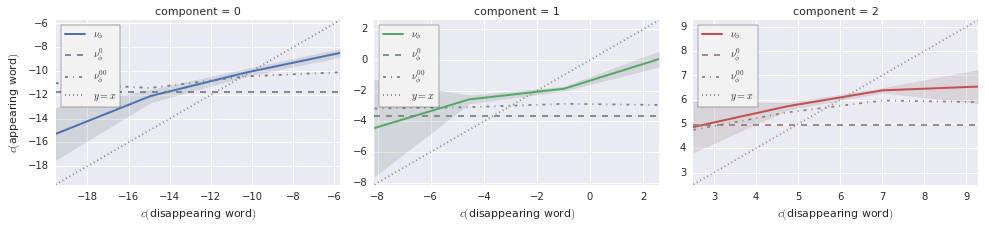

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.54692798  0.18982666  0.1567398   0.04211733  0.03665298]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.721316,-0.087602,0.304948,-0.553093,0.270415,0.000740
Component-1,-0.523566,-0.091867,0.313685,0.740638,-0.265255,0.011695
Component-2,-0.442523,0.125688,-0.881632,0.086823,0.031979,0.050395


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 99525) |           | Elapsed Time: 0:00:34 ETA:  40 days, 2:24:42

  0% (   88 of 99525) |                    | Elapsed Time: 0:00:35 ETA:  0:18:34

  0% (  195 of 99525) |                    | Elapsed Time: 0:00:36 ETA:  0:16:31

  0% (  292 of 99525) |                    | Elapsed Time: 0:00:37 ETA:  0:16:32

  0% (  414 of 99525) |                    | Elapsed Time: 0:00:38 ETA:  0:15:28

  0% (  533 of 99525) |                    | Elapsed Time: 0:00:39 ETA:  0:14:59

  0% (  664 of 99525) |                    | Elapsed Time: 0:00:40 ETA:  0:14:23

  0% (  789 of 99525) |                    | Elapsed Time: 0:00:41 ETA:  0:14:06

  0% (  918 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  0:13:49

  1% ( 1057 of 99525) |                    | Elapsed Time: 0:00:43 ETA:  0:13:27

  1% ( 1196 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  0:12:46

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:00:45 ETA:  0:12:29

  1% ( 1385 of 99525) |                    | Elapsed Time: 0:00:46 ETA:  0:11:56

  1% ( 1529 of 99525) |                    | Elapsed Time: 0:00:47 ETA:  0:11:40

  1% ( 1667 of 99525) |                    | Elapsed Time: 0:00:48 ETA:  0:11:26

  1% ( 1803 of 99525) |                    | Elapsed Time: 0:00:49 ETA:  0:11:22

  1% ( 1934 of 99525) |                    | Elapsed Time: 0:00:50 ETA:  0:11:17

  2% ( 2085 of 99525) |                    | Elapsed Time: 0:00:51 ETA:  0:11:03

  2% ( 2241 of 99525) |                    | Elapsed Time: 0:00:52 ETA:  0:10:52

  2% ( 2381 of 99525) |                    | Elapsed Time: 0:00:53 ETA:  0:10:50

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:00:53 ETA:  0:10:43

  2% ( 2581 of 99525) |                    | Elapsed Time: 0:00:54 ETA:  0:11:11

  2% ( 2664 of 99525) |                    | Elapsed Time: 0:00:55 ETA:  0:11:49

  2% ( 2742 of 99525) |                    | Elapsed Time: 0:00:56 ETA:  0:12:30

  2% ( 2821 of 99525) |                    | Elapsed Time: 0:00:57 ETA:  0:13:15

  2% ( 2902 of 99525) |                    | Elapsed Time: 0:00:58 ETA:  0:13:58

  3% ( 2988 of 99525) |                    | Elapsed Time: 0:00:59 ETA:  0:15:02

  3% ( 3069 of 99525) |                    | Elapsed Time: 0:01:00 ETA:  0:16:29

  3% ( 3149 of 99525) |                    | Elapsed Time: 0:01:01 ETA:  0:17:51

  3% ( 3229 of 99525) |                    | Elapsed Time: 0:01:02 ETA:  0:19:15

  3% ( 3317 of 99525) |                    | Elapsed Time: 0:01:03 ETA:  0:19:21

  3% ( 3412 of 99525) |                    | Elapsed Time: 0:01:04 ETA:  0:19:00

  3% ( 3518 of 99525) |                    | Elapsed Time: 0:01:05 ETA:  0:18:16

  3% ( 3637 of 99525) |                    | Elapsed Time: 0:01:07 ETA:  0:17:18

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:01:07 ETA:  0:16:31

  3% ( 3852 of 99525) |                    | Elapsed Time: 0:01:08 ETA:  0:15:49

  3% ( 3977 of 99525) |                    | Elapsed Time: 0:01:09 ETA:  0:14:58

  4% ( 4107 of 99525) |                    | Elapsed Time: 0:01:10 ETA:  0:14:06

  4% ( 4245 of 99525) |                    | Elapsed Time: 0:01:11 ETA:  0:13:13

  4% ( 4368 of 99525) |                    | Elapsed Time: 0:01:12 ETA:  0:12:42

  4% ( 4491 of 99525) |                    | Elapsed Time: 0:01:13 ETA:  0:12:20

  4% ( 4607 of 99525) |                    | Elapsed Time: 0:01:14 ETA:  0:12:11

  4% ( 4738 of 99525) |                    | Elapsed Time: 0:01:15 ETA:  0:12:01

  4% ( 4875 of 99525) |                    | Elapsed Time: 0:01:16 ETA:  0:11:50

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:01:17 ETA:  0:11:47

  5% ( 5142 of 99525) |#                   | Elapsed Time: 0:01:18 ETA:  0:11:19

  5% ( 5313 of 99525) |#                   | Elapsed Time: 0:01:19 ETA:  0:10:52

  5% ( 5485 of 99525) |#                   | Elapsed Time: 0:01:20 ETA:  0:10:30

  5% ( 5651 of 99525) |#                   | Elapsed Time: 0:01:21 ETA:  0:10:06

  5% ( 5822 of 99525) |#                   | Elapsed Time: 0:01:22 ETA:  0:09:40

  6% ( 5994 of 99525) |#                   | Elapsed Time: 0:01:23 ETA:  0:09:12

  6% ( 6162 of 99525) |#                   | Elapsed Time: 0:01:24 ETA:  0:08:54

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:01:25 ETA:  0:08:40

  6% ( 6397 of 99525) |#                   | Elapsed Time: 0:01:26 ETA:  0:08:19

  6% ( 6576 of 99525) |#                   | Elapsed Time: 0:01:27 ETA:  0:08:12

  6% ( 6732 of 99525) |#                   | Elapsed Time: 0:01:28 ETA:  0:08:17

  6% ( 6882 of 99525) |#                   | Elapsed Time: 0:01:29 ETA:  0:08:26

  7% ( 7023 of 99525) |#                   | Elapsed Time: 0:01:30 ETA:  0:08:35

  7% ( 7173 of 99525) |#                   | Elapsed Time: 0:01:31 ETA:  0:08:44

  7% ( 7322 of 99525) |#                   | Elapsed Time: 0:01:32 ETA:  0:08:54

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:01:32 ETA:  0:09:00

  7% ( 7613 of 99525) |#                   | Elapsed Time: 0:01:33 ETA:  0:09:07

  7% ( 7762 of 99525) |#                   | Elapsed Time: 0:01:34 ETA:  0:09:19

  7% ( 7910 of 99525) |#                   | Elapsed Time: 0:01:36 ETA:  0:09:33

  8% ( 8027 of 99525) |#                   | Elapsed Time: 0:01:37 ETA:  0:09:53

  8% ( 8139 of 99525) |#                   | Elapsed Time: 0:01:38 ETA:  0:10:13

  8% ( 8227 of 99525) |#                   | Elapsed Time: 0:01:39 ETA:  0:10:43

  8% ( 8296 of 99525) |#                   | Elapsed Time: 0:01:40 ETA:  0:11:36

  8% ( 8437 of 99525) |#                   | Elapsed Time: 0:01:41 ETA:  0:11:41

  8% ( 8570 of 99525) |#                   | Elapsed Time: 0:01:42 ETA:  0:11:52

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:01:42 ETA:  0:11:53

  8% ( 8852 of 99525) |#                   | Elapsed Time: 0:01:44 ETA:  0:11:59

  8% ( 8918 of 99525) |#                   | Elapsed Time: 0:01:45 ETA:  0:13:05

  9% ( 9036 of 99525) |#                   | Elapsed Time: 0:01:46 ETA:  0:13:06

  9% ( 9118 of 99525) |#                   | Elapsed Time: 0:01:47 ETA:  0:13:32

  9% ( 9202 of 99525) |#                   | Elapsed Time: 0:01:48 ETA:  0:13:34

  9% ( 9288 of 99525) |#                   | Elapsed Time: 0:01:49 ETA:  0:13:17

  9% ( 9372 of 99525) |#                   | Elapsed Time: 0:01:50 ETA:  0:14:12

  9% ( 9493 of 99525) |#                   | Elapsed Time: 0:01:51 ETA:  0:14:23

  9% ( 9669 of 99525) |#                   | Elapsed Time: 0:01:52 ETA:  0:13:50

  9% ( 9818 of 99525) |#                   | Elapsed Time: 0:01:53 ETA:  0:13:39

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:01:54 ETA:  0:12:55

 10% (10058 of 99525) |##                  | Elapsed Time: 0:01:55 ETA:  0:12:32

 10% (10162 of 99525) |##                  | Elapsed Time: 0:01:56 ETA:  0:12:13

 10% (10268 of 99525) |##                  | Elapsed Time: 0:01:57 ETA:  0:11:55

 10% (10371 of 99525) |##                  | Elapsed Time: 0:01:58 ETA:  0:11:39

 10% (10527 of 99525) |##                  | Elapsed Time: 0:01:59 ETA:  0:11:11

 10% (10679 of 99525) |##                  | Elapsed Time: 0:02:00 ETA:  0:11:28

 10% (10825 of 99525) |##                  | Elapsed Time: 0:02:01 ETA:  0:11:33

 11% (10952 of 99525) |##                  | Elapsed Time: 0:02:02 ETA:  0:11:24

 11% (11099 of 99525) |##                  | Elapsed Time: 0:02:03 ETA:  0:11:04

 11% (11197 of 99525) |##                  | Elapsed Time: 0:02:04 ETA:  0:10:42

 11% (11303 of 99525) |##                  | Elapsed Time: 0:02:05 ETA:  0:10:39

 11% (11423 of 99525) |##                  | Elapsed Time: 0:02:06 ETA:  0:10:30

 11% (11542 of 99525) |##                  | Elapsed Time: 0:02:07 ETA:  0:10:18

 11% (11664 of 99525) |##                  | Elapsed Time: 0:02:08 ETA:  0:10:39

 11% (11784 of 99525) |##                  | Elapsed Time: 0:02:09 ETA:  0:11:00

 11% (11906 of 99525) |##                  | Elapsed Time: 0:02:10 ETA:  0:11:14

 12% (12027 of 99525) |##                  | Elapsed Time: 0:02:11 ETA:  0:11:17

 12% (12149 of 99525) |##                  | Elapsed Time: 0:02:12 ETA:  0:11:35

 12% (12266 of 99525) |##                  | Elapsed Time: 0:02:13 ETA:  0:11:47

 12% (12377 of 99525) |##                  | Elapsed Time: 0:02:14 ETA:  0:11:42

 12% (12441 of 99525) |##                  | Elapsed Time: 0:02:14 ETA:  0:11:40

 12% (12564 of 99525) |##                  | Elapsed Time: 0:02:15 ETA:  0:11:36

 12% (12692 of 99525) |##                  | Elapsed Time: 0:02:16 ETA:  0:11:31

 12% (12810 of 99525) |##                  | Elapsed Time: 0:02:17 ETA:  0:11:31

 12% (12930 of 99525) |##                  | Elapsed Time: 0:02:18 ETA:  0:11:32

 13% (13049 of 99525) |##                  | Elapsed Time: 0:02:19 ETA:  0:11:33

 13% (13173 of 99525) |##                  | Elapsed Time: 0:02:20 ETA:  0:11:31

 13% (13297 of 99525) |##                  | Elapsed Time: 0:02:21 ETA:  0:11:25

 13% (13419 of 99525) |##                  | Elapsed Time: 0:02:22 ETA:  0:11:15

 13% (13561 of 99525) |##                  | Elapsed Time: 0:02:23 ETA:  0:10:59

 13% (13685 of 99525) |##                  | Elapsed Time: 0:02:24 ETA:  0:10:46

 13% (13825 of 99525) |##                  | Elapsed Time: 0:02:25 ETA:  0:10:37

 14% (13969 of 99525) |##                  | Elapsed Time: 0:02:26 ETA:  0:10:18

 14% (14123 of 99525) |##                  | Elapsed Time: 0:02:27 ETA:  0:09:55

 14% (14273 of 99525) |##                  | Elapsed Time: 0:02:28 ETA:  0:09:35

 14% (14411 of 99525) |##                  | Elapsed Time: 0:02:29 ETA:  0:09:26

 14% (14549 of 99525) |##                  | Elapsed Time: 0:02:30 ETA:  0:09:17

 14% (14678 of 99525) |##                  | Elapsed Time: 0:02:31 ETA:  0:09:12

 14% (14824 of 99525) |##                  | Elapsed Time: 0:02:32 ETA:  0:09:09

 15% (14929 of 99525) |###                 | Elapsed Time: 0:02:33 ETA:  0:09:07

 15% (15076 of 99525) |###                 | Elapsed Time: 0:02:34 ETA:  0:09:02

 15% (15222 of 99525) |###                 | Elapsed Time: 0:02:35 ETA:  0:09:00

 15% (15372 of 99525) |###                 | Elapsed Time: 0:02:36 ETA:  0:09:01

 15% (15519 of 99525) |###                 | Elapsed Time: 0:02:37 ETA:  0:09:02

 15% (15667 of 99525) |###                 | Elapsed Time: 0:02:38 ETA:  0:08:55

 15% (15822 of 99525) |###                 | Elapsed Time: 0:02:39 ETA:  0:08:44

 16% (15941 of 99525) |###                 | Elapsed Time: 0:02:40 ETA:  0:08:49

 16% (16068 of 99525) |###                 | Elapsed Time: 0:02:41 ETA:  0:09:01

 16% (16173 of 99525) |###                 | Elapsed Time: 0:02:42 ETA:  0:09:03

 16% (16311 of 99525) |###                 | Elapsed Time: 0:02:43 ETA:  0:09:06

 16% (16446 of 99525) |###                 | Elapsed Time: 0:02:44 ETA:  0:09:11

 16% (16580 of 99525) |###                 | Elapsed Time: 0:02:45 ETA:  0:09:20

 16% (16699 of 99525) |###                 | Elapsed Time: 0:02:46 ETA:  0:09:36

 16% (16821 of 99525) |###                 | Elapsed Time: 0:02:47 ETA:  0:09:51

 17% (16942 of 99525) |###                 | Elapsed Time: 0:02:48 ETA:  0:10:14

 17% (17012 of 99525) |###                 | Elapsed Time: 0:02:49 ETA:  0:10:48

 17% (17140 of 99525) |###                 | Elapsed Time: 0:02:50 ETA:  0:10:44

 17% (17257 of 99525) |###                 | Elapsed Time: 0:02:51 ETA:  0:10:57

 17% (17389 of 99525) |###                 | Elapsed Time: 0:02:52 ETA:  0:11:01

 17% (17417 of 99525) |###                 | Elapsed Time: 0:02:52 ETA:  0:11:13

 17% (17548 of 99525) |###                 | Elapsed Time: 0:02:53 ETA:  0:11:14

 17% (17673 of 99525) |###                 | Elapsed Time: 0:02:54 ETA:  0:11:08

 17% (17800 of 99525) |###                 | Elapsed Time: 0:02:55 ETA:  0:11:02

 18% (17939 of 99525) |###                 | Elapsed Time: 0:02:56 ETA:  0:10:47

 18% (18074 of 99525) |###                 | Elapsed Time: 0:02:57 ETA:  0:09:55

 18% (18210 of 99525) |###                 | Elapsed Time: 0:02:58 ETA:  0:09:48

 18% (18344 of 99525) |###                 | Elapsed Time: 0:02:59 ETA:  0:09:36

 18% (18481 of 99525) |###                 | Elapsed Time: 0:03:00 ETA:  0:09:31

 18% (18613 of 99525) |###                 | Elapsed Time: 0:03:01 ETA:  0:09:31

 18% (18661 of 99525) |###                 | Elapsed Time: 0:03:01 ETA:  0:09:27

 18% (18798 of 99525) |###                 | Elapsed Time: 0:03:02 ETA:  0:09:18

 19% (18931 of 99525) |###                 | Elapsed Time: 0:03:03 ETA:  0:09:14

 19% (19063 of 99525) |###                 | Elapsed Time: 0:03:04 ETA:  0:09:17

 19% (19171 of 99525) |###                 | Elapsed Time: 0:03:05 ETA:  0:09:34

 19% (19289 of 99525) |###                 | Elapsed Time: 0:03:06 ETA:  0:09:46

 19% (19414 of 99525) |###                 | Elapsed Time: 0:03:07 ETA:  0:09:51

 19% (19497 of 99525) |###                 | Elapsed Time: 0:03:08 ETA:  0:10:32

 19% (19586 of 99525) |###                 | Elapsed Time: 0:03:09 ETA:  0:11:07

 19% (19695 of 99525) |###                 | Elapsed Time: 0:03:10 ETA:  0:11:19

 19% (19833 of 99525) |###                 | Elapsed Time: 0:03:11 ETA:  0:11:18

 20% (19905 of 99525) |####                | Elapsed Time: 0:03:12 ETA:  0:11:24

 20% (20041 of 99525) |####                | Elapsed Time: 0:03:13 ETA:  0:11:19

 20% (20175 of 99525) |####                | Elapsed Time: 0:03:14 ETA:  0:10:55

 20% (20309 of 99525) |####                | Elapsed Time: 0:03:15 ETA:  0:10:41

 20% (20421 of 99525) |####                | Elapsed Time: 0:03:16 ETA:  0:10:51

 20% (20562 of 99525) |####                | Elapsed Time: 0:03:17 ETA:  0:10:03

 20% (20710 of 99525) |####                | Elapsed Time: 0:03:18 ETA:  0:09:19

 20% (20855 of 99525) |####                | Elapsed Time: 0:03:19 ETA:  0:08:54

 21% (21002 of 99525) |####                | Elapsed Time: 0:03:20 ETA:  0:08:48

 21% (21150 of 99525) |####                | Elapsed Time: 0:03:21 ETA:  0:08:37

 21% (21321 of 99525) |####                | Elapsed Time: 0:03:22 ETA:  0:08:16

 21% (21486 of 99525) |####                | Elapsed Time: 0:03:23 ETA:  0:08:00

 21% (21624 of 99525) |####                | Elapsed Time: 0:03:24 ETA:  0:07:57

 21% (21731 of 99525) |####                | Elapsed Time: 0:03:25 ETA:  0:07:59

 21% (21837 of 99525) |####                | Elapsed Time: 0:03:26 ETA:  0:08:17

 22% (21942 of 99525) |####                | Elapsed Time: 0:03:27 ETA:  0:08:41

 22% (22082 of 99525) |####                | Elapsed Time: 0:03:28 ETA:  0:08:43

 22% (22235 of 99525) |####                | Elapsed Time: 0:03:29 ETA:  0:08:38

 22% (22394 of 99525) |####                | Elapsed Time: 0:03:30 ETA:  0:09:07

 22% (22554 of 99525) |####                | Elapsed Time: 0:03:31 ETA:  0:09:08

 22% (22711 of 99525) |####                | Elapsed Time: 0:03:32 ETA:  0:08:54

 22% (22863 of 99525) |####                | Elapsed Time: 0:03:33 ETA:  0:08:23

 23% (23017 of 99525) |####                | Elapsed Time: 0:03:34 ETA:  0:07:53

 23% (23171 of 99525) |####                | Elapsed Time: 0:03:35 ETA:  0:07:24

 23% (23328 of 99525) |####                | Elapsed Time: 0:03:36 ETA:  0:07:15

 23% (23464 of 99525) |####                | Elapsed Time: 0:03:37 ETA:  0:07:23

 23% (23574 of 99525) |####                | Elapsed Time: 0:03:38 ETA:  0:07:38

 23% (23638 of 99525) |####                | Elapsed Time: 0:03:39 ETA:  0:07:45

 23% (23751 of 99525) |####                | Elapsed Time: 0:03:40 ETA:  0:08:11

 23% (23873 of 99525) |####                | Elapsed Time: 0:03:41 ETA:  0:08:32

 24% (24039 of 99525) |####                | Elapsed Time: 0:03:42 ETA:  0:08:22

 24% (24205 of 99525) |####                | Elapsed Time: 0:03:43 ETA:  0:08:14

 24% (24374 of 99525) |####                | Elapsed Time: 0:03:44 ETA:  0:08:04

 24% (24523 of 99525) |####                | Elapsed Time: 0:03:45 ETA:  0:08:07

 24% (24683 of 99525) |####                | Elapsed Time: 0:03:46 ETA:  0:07:52

 24% (24790 of 99525) |####                | Elapsed Time: 0:03:47 ETA:  0:07:53

 25% (24882 of 99525) |#####               | Elapsed Time: 0:03:47 ETA:  0:07:59

 25% (25015 of 99525) |#####               | Elapsed Time: 0:03:48 ETA:  0:07:47

 25% (25133 of 99525) |#####               | Elapsed Time: 0:03:49 ETA:  0:07:48

 25% (25264 of 99525) |#####               | Elapsed Time: 0:03:50 ETA:  0:08:07

 25% (25369 of 99525) |#####               | Elapsed Time: 0:03:51 ETA:  0:08:44

 25% (25503 of 99525) |#####               | Elapsed Time: 0:03:52 ETA:  0:09:07

 25% (25673 of 99525) |#####               | Elapsed Time: 0:03:53 ETA:  0:08:52

 25% (25788 of 99525) |#####               | Elapsed Time: 0:03:54 ETA:  0:09:23

 26% (25910 of 99525) |#####               | Elapsed Time: 0:03:55 ETA:  0:09:11

 26% (26043 of 99525) |#####               | Elapsed Time: 0:03:56 ETA:  0:08:58

 26% (26126 of 99525) |#####               | Elapsed Time: 0:03:57 ETA:  0:08:57

 26% (26263 of 99525) |#####               | Elapsed Time: 0:03:58 ETA:  0:08:43

 26% (26426 of 99525) |#####               | Elapsed Time: 0:03:59 ETA:  0:08:21

 26% (26569 of 99525) |#####               | Elapsed Time: 0:04:00 ETA:  0:07:56

 26% (26681 of 99525) |#####               | Elapsed Time: 0:04:01 ETA:  0:08:08

 26% (26849 of 99525) |#####               | Elapsed Time: 0:04:02 ETA:  0:08:08

 27% (27011 of 99525) |#####               | Elapsed Time: 0:04:03 ETA:  0:07:39

 27% (27170 of 99525) |#####               | Elapsed Time: 0:04:04 ETA:  0:07:17

 27% (27370 of 99525) |#####               | Elapsed Time: 0:04:05 ETA:  0:06:51

 27% (27538 of 99525) |#####               | Elapsed Time: 0:04:06 ETA:  0:06:34

 27% (27704 of 99525) |#####               | Elapsed Time: 0:04:07 ETA:  0:06:31

 28% (27869 of 99525) |#####               | Elapsed Time: 0:04:08 ETA:  0:06:19

 28% (28031 of 99525) |#####               | Elapsed Time: 0:04:09 ETA:  0:05:55

 28% (28151 of 99525) |#####               | Elapsed Time: 0:04:10 ETA:  0:06:17

 28% (28299 of 99525) |#####               | Elapsed Time: 0:04:11 ETA:  0:06:22

 28% (28442 of 99525) |#####               | Elapsed Time: 0:04:12 ETA:  0:06:29

 28% (28614 of 99525) |#####               | Elapsed Time: 0:04:13 ETA:  0:06:30

 28% (28778 of 99525) |#####               | Elapsed Time: 0:04:14 ETA:  0:06:31

 29% (28944 of 99525) |#####               | Elapsed Time: 0:04:15 ETA:  0:06:30

 29% (29109 of 99525) |#####               | Elapsed Time: 0:04:16 ETA:  0:06:29

 29% (29261 of 99525) |#####               | Elapsed Time: 0:04:17 ETA:  0:06:34

 29% (29368 of 99525) |#####               | Elapsed Time: 0:04:18 ETA:  0:06:39

 29% (29473 of 99525) |#####               | Elapsed Time: 0:04:19 ETA:  0:07:06

 29% (29609 of 99525) |#####               | Elapsed Time: 0:04:20 ETA:  0:07:10

 29% (29747 of 99525) |#####               | Elapsed Time: 0:04:21 ETA:  0:07:27

 30% (29858 of 99525) |######              | Elapsed Time: 0:04:22 ETA:  0:07:29

 30% (30012 of 99525) |######              | Elapsed Time: 0:04:23 ETA:  0:07:34

 30% (30135 of 99525) |######              | Elapsed Time: 0:04:24 ETA:  0:07:59

 30% (30297 of 99525) |######              | Elapsed Time: 0:04:25 ETA:  0:08:00

 30% (30468 of 99525) |######              | Elapsed Time: 0:04:26 ETA:  0:07:50

 30% (30595 of 99525) |######              | Elapsed Time: 0:04:27 ETA:  0:07:37

 30% (30713 of 99525) |######              | Elapsed Time: 0:04:28 ETA:  0:07:25

 30% (30832 of 99525) |######              | Elapsed Time: 0:04:29 ETA:  0:07:34

 31% (30993 of 99525) |######              | Elapsed Time: 0:04:30 ETA:  0:07:20

 31% (31102 of 99525) |######              | Elapsed Time: 0:04:31 ETA:  0:07:04

 31% (31280 of 99525) |######              | Elapsed Time: 0:04:32 ETA:  0:06:50

 31% (31454 of 99525) |######              | Elapsed Time: 0:04:33 ETA:  0:06:23

 31% (31626 of 99525) |######              | Elapsed Time: 0:04:34 ETA:  0:06:17

 31% (31790 of 99525) |######              | Elapsed Time: 0:04:35 ETA:  0:06:16

 32% (31923 of 99525) |######              | Elapsed Time: 0:04:36 ETA:  0:06:12

 32% (32020 of 99525) |######              | Elapsed Time: 0:04:37 ETA:  0:06:21

 32% (32113 of 99525) |######              | Elapsed Time: 0:04:38 ETA:  0:06:34

 32% (32210 of 99525) |######              | Elapsed Time: 0:04:39 ETA:  0:07:09

 32% (32346 of 99525) |######              | Elapsed Time: 0:04:40 ETA:  0:08:09

 32% (32480 of 99525) |######              | Elapsed Time: 0:04:41 ETA:  0:08:39

 32% (32595 of 99525) |######              | Elapsed Time: 0:04:42 ETA:  0:09:25

 32% (32716 of 99525) |######              | Elapsed Time: 0:04:43 ETA:  0:10:02

 33% (32869 of 99525) |######              | Elapsed Time: 0:04:44 ETA:  0:09:42

 33% (32969 of 99525) |######              | Elapsed Time: 0:04:45 ETA:  0:09:39

 33% (33119 of 99525) |######              | Elapsed Time: 0:04:46 ETA:  0:08:48

 33% (33223 of 99525) |######              | Elapsed Time: 0:04:47 ETA:  0:08:41

 33% (33385 of 99525) |######              | Elapsed Time: 0:04:48 ETA:  0:07:57

 33% (33545 of 99525) |######              | Elapsed Time: 0:04:49 ETA:  0:07:39

 33% (33590 of 99525) |######              | Elapsed Time: 0:04:49 ETA:  0:07:34

 33% (33726 of 99525) |######              | Elapsed Time: 0:04:50 ETA:  0:07:19

 34% (33850 of 99525) |######              | Elapsed Time: 0:04:51 ETA:  0:07:17

 34% (33972 of 99525) |######              | Elapsed Time: 0:04:52 ETA:  0:07:36

 34% (34085 of 99525) |######              | Elapsed Time: 0:04:53 ETA:  0:07:27

 34% (34231 of 99525) |######              | Elapsed Time: 0:04:54 ETA:  0:07:28

 34% (34395 of 99525) |######              | Elapsed Time: 0:04:55 ETA:  0:06:49

 34% (34505 of 99525) |######              | Elapsed Time: 0:04:56 ETA:  0:07:21

 34% (34608 of 99525) |######              | Elapsed Time: 0:04:57 ETA:  0:08:00

 34% (34738 of 99525) |######              | Elapsed Time: 0:04:58 ETA:  0:08:04

 34% (34817 of 99525) |######              | Elapsed Time: 0:04:59 ETA:  0:08:44

 35% (34834 of 99525) |#######             | Elapsed Time: 0:05:00 ETA:  0:08:53

 35% (34961 of 99525) |#######             | Elapsed Time: 0:05:01 ETA:  0:08:48

 35% (35121 of 99525) |#######             | Elapsed Time: 0:05:02 ETA:  0:08:09

 35% (35241 of 99525) |#######             | Elapsed Time: 0:05:03 ETA:  0:08:28

 35% (35361 of 99525) |#######             | Elapsed Time: 0:05:04 ETA:  0:09:04

 35% (35486 of 99525) |#######             | Elapsed Time: 0:05:05 ETA:  0:08:50

 35% (35598 of 99525) |#######             | Elapsed Time: 0:05:06 ETA:  0:08:46

 35% (35736 of 99525) |#######             | Elapsed Time: 0:05:07 ETA:  0:08:38

 36% (35875 of 99525) |#######             | Elapsed Time: 0:05:08 ETA:  0:07:50

 36% (35990 of 99525) |#######             | Elapsed Time: 0:05:09 ETA:  0:07:51

 36% (36078 of 99525) |#######             | Elapsed Time: 0:05:09 ETA:  0:07:45

 36% (36211 of 99525) |#######             | Elapsed Time: 0:05:10 ETA:  0:08:03

 36% (36351 of 99525) |#######             | Elapsed Time: 0:05:11 ETA:  0:07:48

 36% (36482 of 99525) |#######             | Elapsed Time: 0:05:12 ETA:  0:07:40

 36% (36623 of 99525) |#######             | Elapsed Time: 0:05:13 ETA:  0:07:28

 36% (36743 of 99525) |#######             | Elapsed Time: 0:05:14 ETA:  0:07:18

 37% (36876 of 99525) |#######             | Elapsed Time: 0:05:15 ETA:  0:07:20

 37% (37009 of 99525) |#######             | Elapsed Time: 0:05:16 ETA:  0:07:23

 37% (37133 of 99525) |#######             | Elapsed Time: 0:05:17 ETA:  0:07:16

 37% (37269 of 99525) |#######             | Elapsed Time: 0:05:18 ETA:  0:07:15

 37% (37322 of 99525) |#######             | Elapsed Time: 0:05:19 ETA:  0:07:11

 37% (37461 of 99525) |#######             | Elapsed Time: 0:05:20 ETA:  0:07:11

 37% (37611 of 99525) |#######             | Elapsed Time: 0:05:21 ETA:  0:06:57

 37% (37776 of 99525) |#######             | Elapsed Time: 0:05:22 ETA:  0:06:40

 38% (37921 of 99525) |#######             | Elapsed Time: 0:05:23 ETA:  0:06:25

 38% (38031 of 99525) |#######             | Elapsed Time: 0:05:24 ETA:  0:06:38

 38% (38188 of 99525) |#######             | Elapsed Time: 0:05:25 ETA:  0:06:22

 38% (38338 of 99525) |#######             | Elapsed Time: 0:05:26 ETA:  0:06:06

 38% (38434 of 99525) |#######             | Elapsed Time: 0:05:27 ETA:  0:06:29

 38% (38566 of 99525) |#######             | Elapsed Time: 0:05:28 ETA:  0:06:44

 38% (38671 of 99525) |#######             | Elapsed Time: 0:05:29 ETA:  0:07:17

 38% (38788 of 99525) |#######             | Elapsed Time: 0:05:30 ETA:  0:07:53

 39% (38907 of 99525) |#######             | Elapsed Time: 0:05:31 ETA:  0:08:12

 39% (39018 of 99525) |#######             | Elapsed Time: 0:05:32 ETA:  0:08:11

 39% (39173 of 99525) |#######             | Elapsed Time: 0:05:33 ETA:  0:08:11

 39% (39345 of 99525) |#######             | Elapsed Time: 0:05:34 ETA:  0:07:52

 39% (39497 of 99525) |#######             | Elapsed Time: 0:05:35 ETA:  0:07:09

 39% (39645 of 99525) |#######             | Elapsed Time: 0:05:36 ETA:  0:06:45

 40% (39810 of 99525) |########            | Elapsed Time: 0:05:37 ETA:  0:06:09

 40% (39957 of 99525) |########            | Elapsed Time: 0:05:38 ETA:  0:05:50

 40% (40082 of 99525) |########            | Elapsed Time: 0:05:39 ETA:  0:05:46

 40% (40199 of 99525) |########            | Elapsed Time: 0:05:40 ETA:  0:05:41

 40% (40348 of 99525) |########            | Elapsed Time: 0:05:41 ETA:  0:05:44

 40% (40481 of 99525) |########            | Elapsed Time: 0:05:42 ETA:  0:06:08

 40% (40616 of 99525) |########            | Elapsed Time: 0:05:43 ETA:  0:06:17

 40% (40736 of 99525) |########            | Elapsed Time: 0:05:44 ETA:  0:06:35

 41% (40853 of 99525) |########            | Elapsed Time: 0:05:45 ETA:  0:07:01

 41% (40993 of 99525) |########            | Elapsed Time: 0:05:46 ETA:  0:06:55

 41% (41055 of 99525) |########            | Elapsed Time: 0:05:47 ETA:  0:07:04

 41% (41207 of 99525) |########            | Elapsed Time: 0:05:48 ETA:  0:06:44

 41% (41350 of 99525) |########            | Elapsed Time: 0:05:49 ETA:  0:06:26

 41% (41503 of 99525) |########            | Elapsed Time: 0:05:50 ETA:  0:06:22

 41% (41658 of 99525) |########            | Elapsed Time: 0:05:51 ETA:  0:06:06

 42% (41812 of 99525) |########            | Elapsed Time: 0:05:52 ETA:  0:05:54

 42% (41954 of 99525) |########            | Elapsed Time: 0:05:53 ETA:  0:05:40

 42% (42094 of 99525) |########            | Elapsed Time: 0:05:54 ETA:  0:05:27

 42% (42236 of 99525) |########            | Elapsed Time: 0:05:55 ETA:  0:05:25

 42% (42299 of 99525) |########            | Elapsed Time: 0:05:55 ETA:  0:05:26

 42% (42449 of 99525) |########            | Elapsed Time: 0:05:56 ETA:  0:05:26

 42% (42599 of 99525) |########            | Elapsed Time: 0:05:57 ETA:  0:05:21

 42% (42750 of 99525) |########            | Elapsed Time: 0:05:58 ETA:  0:05:21

 43% (42870 of 99525) |########            | Elapsed Time: 0:05:59 ETA:  0:05:40

 43% (42988 of 99525) |########            | Elapsed Time: 0:06:00 ETA:  0:06:01

 43% (43098 of 99525) |########            | Elapsed Time: 0:06:01 ETA:  0:06:20

 43% (43248 of 99525) |########            | Elapsed Time: 0:06:02 ETA:  0:06:12

 43% (43375 of 99525) |########            | Elapsed Time: 0:06:03 ETA:  0:06:20

 43% (43482 of 99525) |########            | Elapsed Time: 0:06:04 ETA:  0:06:35

 43% (43543 of 99525) |########            | Elapsed Time: 0:06:05 ETA:  0:07:01

 43% (43680 of 99525) |########            | Elapsed Time: 0:06:06 ETA:  0:07:09

 44% (43820 of 99525) |########            | Elapsed Time: 0:06:07 ETA:  0:07:16

 44% (43964 of 99525) |########            | Elapsed Time: 0:06:08 ETA:  0:06:57

 44% (44110 of 99525) |########            | Elapsed Time: 0:06:09 ETA:  0:06:36

 44% (44229 of 99525) |########            | Elapsed Time: 0:06:10 ETA:  0:06:28

 44% (44380 of 99525) |########            | Elapsed Time: 0:06:11 ETA:  0:06:27

 44% (44508 of 99525) |########            | Elapsed Time: 0:06:12 ETA:  0:06:29

 44% (44623 of 99525) |########            | Elapsed Time: 0:06:13 ETA:  0:06:23

 44% (44756 of 99525) |########            | Elapsed Time: 0:06:14 ETA:  0:06:09

 45% (44787 of 99525) |#########           | Elapsed Time: 0:06:14 ETA:  0:06:22

 45% (44899 of 99525) |#########           | Elapsed Time: 0:06:15 ETA:  0:06:41

 45% (45043 of 99525) |#########           | Elapsed Time: 0:06:16 ETA:  0:06:40

 45% (45183 of 99525) |#########           | Elapsed Time: 0:06:17 ETA:  0:06:44

 45% (45329 of 99525) |#########           | Elapsed Time: 0:06:18 ETA:  0:06:24

 45% (45471 of 99525) |#########           | Elapsed Time: 0:06:19 ETA:  0:06:29

 45% (45602 of 99525) |#########           | Elapsed Time: 0:06:20 ETA:  0:06:23

 45% (45740 of 99525) |#########           | Elapsed Time: 0:06:21 ETA:  0:06:05

 46% (45849 of 99525) |#########           | Elapsed Time: 0:06:22 ETA:  0:06:20

 46% (45985 of 99525) |#########           | Elapsed Time: 0:06:23 ETA:  0:06:06

 46% (46031 of 99525) |#########           | Elapsed Time: 0:06:24 ETA:  0:05:51

 46% (46128 of 99525) |#########           | Elapsed Time: 0:06:25 ETA:  0:06:22

 46% (46233 of 99525) |#########           | Elapsed Time: 0:06:26 ETA:  0:06:49

 46% (46292 of 99525) |#########           | Elapsed Time: 0:06:27 ETA:  0:08:00

 46% (46405 of 99525) |#########           | Elapsed Time: 0:06:28 ETA:  0:08:26

 46% (46560 of 99525) |#########           | Elapsed Time: 0:06:29 ETA:  0:08:03

 46% (46696 of 99525) |#########           | Elapsed Time: 0:06:30 ETA:  0:08:08

 47% (46829 of 99525) |#########           | Elapsed Time: 0:06:31 ETA:  0:07:46

 47% (46884 of 99525) |#########           | Elapsed Time: 0:06:32 ETA:  0:09:03

 47% (46976 of 99525) |#########           | Elapsed Time: 0:06:33 ETA:  0:09:27

 47% (47103 of 99525) |#########           | Elapsed Time: 0:06:34 ETA:  0:08:57

 47% (47220 of 99525) |#########           | Elapsed Time: 0:06:35 ETA:  0:08:41

 47% (47275 of 99525) |#########           | Elapsed Time: 0:06:35 ETA:  0:08:09

 47% (47424 of 99525) |#########           | Elapsed Time: 0:06:36 ETA:  0:07:37

 47% (47496 of 99525) |#########           | Elapsed Time: 0:06:37 ETA:  0:08:54

 47% (47545 of 99525) |#########           | Elapsed Time: 0:06:38 ETA:  0:10:25

 47% (47583 of 99525) |#########           | Elapsed Time: 0:06:39 ETA:  0:12:38

 47% (47626 of 99525) |#########           | Elapsed Time: 0:06:40 ETA:  0:12:58

 47% (47668 of 99525) |#########           | Elapsed Time: 0:06:41 ETA:  0:14:21

 47% (47727 of 99525) |#########           | Elapsed Time: 0:06:42 ETA:  0:16:39

 48% (47803 of 99525) |#########           | Elapsed Time: 0:06:43 ETA:  0:18:18

 48% (47887 of 99525) |#########           | Elapsed Time: 0:06:45 ETA:  0:18:05

 48% (47954 of 99525) |#########           | Elapsed Time: 0:06:46 ETA:  0:21:59

 48% (48042 of 99525) |#########           | Elapsed Time: 0:06:47 ETA:  0:21:03

 48% (48141 of 99525) |#########           | Elapsed Time: 0:06:48 ETA:  0:18:41

 48% (48239 of 99525) |#########           | Elapsed Time: 0:06:49 ETA:  0:16:14

 48% (48334 of 99525) |#########           | Elapsed Time: 0:06:50 ETA:  0:14:28

 48% (48403 of 99525) |#########           | Elapsed Time: 0:06:51 ETA:  0:13:40

 48% (48519 of 99525) |#########           | Elapsed Time: 0:06:52 ETA:  0:12:07

 48% (48624 of 99525) |#########           | Elapsed Time: 0:06:53 ETA:  0:11:32

 48% (48695 of 99525) |#########           | Elapsed Time: 0:06:54 ETA:  0:11:20

 49% (48815 of 99525) |#########           | Elapsed Time: 0:06:55 ETA:  0:10:34

 49% (48914 of 99525) |#########           | Elapsed Time: 0:06:56 ETA:  0:10:35

 49% (49003 of 99525) |#########           | Elapsed Time: 0:06:57 ETA:  0:10:47

 49% (49085 of 99525) |#########           | Elapsed Time: 0:06:58 ETA:  0:11:04

 49% (49180 of 99525) |#########           | Elapsed Time: 0:06:59 ETA:  0:10:28

 49% (49266 of 99525) |#########           | Elapsed Time: 0:07:00 ETA:  0:10:54

 49% (49358 of 99525) |#########           | Elapsed Time: 0:07:01 ETA:  0:10:53

 49% (49466 of 99525) |#########           | Elapsed Time: 0:07:02 ETA:  0:10:49

 49% (49587 of 99525) |#########           | Elapsed Time: 0:07:03 ETA:  0:09:49

 49% (49685 of 99525) |#########           | Elapsed Time: 0:07:04 ETA:  0:10:14

 50% (49763 of 99525) |##########          | Elapsed Time: 0:07:04 ETA:  0:09:47

 50% (49880 of 99525) |##########          | Elapsed Time: 0:07:05 ETA:  0:09:14

 50% (49997 of 99525) |##########          | Elapsed Time: 0:07:06 ETA:  0:08:35

 50% (50117 of 99525) |##########          | Elapsed Time: 0:07:07 ETA:  0:08:10

 50% (50217 of 99525) |##########          | Elapsed Time: 0:07:08 ETA:  0:07:55

 50% (50316 of 99525) |##########          | Elapsed Time: 0:07:09 ETA:  0:07:50

 50% (50410 of 99525) |##########          | Elapsed Time: 0:07:10 ETA:  0:08:01

 50% (50474 of 99525) |##########          | Elapsed Time: 0:07:11 ETA:  0:08:57

 50% (50543 of 99525) |##########          | Elapsed Time: 0:07:12 ETA:  0:09:30

 50% (50624 of 99525) |##########          | Elapsed Time: 0:07:13 ETA:  0:10:15

 50% (50729 of 99525) |##########          | Elapsed Time: 0:07:14 ETA:  0:10:30

 51% (50832 of 99525) |##########          | Elapsed Time: 0:07:15 ETA:  0:10:46

 51% (50933 of 99525) |##########          | Elapsed Time: 0:07:16 ETA:  0:11:08

 51% (51007 of 99525) |##########          | Elapsed Time: 0:07:17 ETA:  0:11:10

 51% (51128 of 99525) |##########          | Elapsed Time: 0:07:18 ETA:  0:10:35

 51% (51269 of 99525) |##########          | Elapsed Time: 0:07:19 ETA:  0:09:36

 51% (51408 of 99525) |##########          | Elapsed Time: 0:07:20 ETA:  0:08:14

 51% (51553 of 99525) |##########          | Elapsed Time: 0:07:21 ETA:  0:07:02

 51% (51707 of 99525) |##########          | Elapsed Time: 0:07:22 ETA:  0:06:03

 52% (51839 of 99525) |##########          | Elapsed Time: 0:07:23 ETA:  0:05:41

 52% (52019 of 99525) |##########          | Elapsed Time: 0:07:24 ETA:  0:04:50

 52% (52182 of 99525) |##########          | Elapsed Time: 0:07:25 ETA:  0:04:12

 52% (52251 of 99525) |##########          | Elapsed Time: 0:07:26 ETA:  0:03:54

 52% (52388 of 99525) |##########          | Elapsed Time: 0:07:27 ETA:  0:03:45

 52% (52524 of 99525) |##########          | Elapsed Time: 0:07:28 ETA:  0:03:46

 52% (52661 of 99525) |##########          | Elapsed Time: 0:07:29 ETA:  0:03:46

 53% (52803 of 99525) |##########          | Elapsed Time: 0:07:30 ETA:  0:03:46

 53% (52959 of 99525) |##########          | Elapsed Time: 0:07:31 ETA:  0:03:44

 53% (53112 of 99525) |##########          | Elapsed Time: 0:07:32 ETA:  0:03:32

 53% (53261 of 99525) |##########          | Elapsed Time: 0:07:33 ETA:  0:03:48

 53% (53381 of 99525) |##########          | Elapsed Time: 0:07:34 ETA:  0:04:11

 53% (53495 of 99525) |##########          | Elapsed Time: 0:07:34 ETA:  0:04:03

 53% (53646 of 99525) |##########          | Elapsed Time: 0:07:35 ETA:  0:03:54

 54% (53772 of 99525) |##########          | Elapsed Time: 0:07:36 ETA:  0:03:59

 54% (53935 of 99525) |##########          | Elapsed Time: 0:07:37 ETA:  0:03:44

 54% (54075 of 99525) |##########          | Elapsed Time: 0:07:38 ETA:  0:03:44

 54% (54232 of 99525) |##########          | Elapsed Time: 0:07:39 ETA:  0:03:42

 54% (54376 of 99525) |##########          | Elapsed Time: 0:07:40 ETA:  0:03:46

 54% (54524 of 99525) |##########          | Elapsed Time: 0:07:41 ETA:  0:03:46

 54% (54674 of 99525) |##########          | Elapsed Time: 0:07:42 ETA:  0:03:28

 55% (54739 of 99525) |###########         | Elapsed Time: 0:07:43 ETA:  0:03:27

 55% (54883 of 99525) |###########         | Elapsed Time: 0:07:44 ETA:  0:03:30

 55% (55018 of 99525) |###########         | Elapsed Time: 0:07:45 ETA:  0:03:24

 55% (55147 of 99525) |###########         | Elapsed Time: 0:07:46 ETA:  0:03:41

 55% (55313 of 99525) |###########         | Elapsed Time: 0:07:47 ETA:  0:03:26

 55% (55476 of 99525) |###########         | Elapsed Time: 0:07:48 ETA:  0:03:22

 55% (55620 of 99525) |###########         | Elapsed Time: 0:07:49 ETA:  0:03:21

 56% (55771 of 99525) |###########         | Elapsed Time: 0:07:50 ETA:  0:03:18

 56% (55931 of 99525) |###########         | Elapsed Time: 0:07:51 ETA:  0:03:12

 56% (55983 of 99525) |###########         | Elapsed Time: 0:07:51 ETA:  0:03:22

 56% (56107 of 99525) |###########         | Elapsed Time: 0:07:52 ETA:  0:03:32

 56% (56247 of 99525) |###########         | Elapsed Time: 0:07:53 ETA:  0:03:29

 56% (56388 of 99525) |###########         | Elapsed Time: 0:07:54 ETA:  0:03:21

 56% (56487 of 99525) |###########         | Elapsed Time: 0:07:55 ETA:  0:03:59

 56% (56626 of 99525) |###########         | Elapsed Time: 0:07:56 ETA:  0:04:13

 57% (56785 of 99525) |###########         | Elapsed Time: 0:07:57 ETA:  0:04:02

 57% (56901 of 99525) |###########         | Elapsed Time: 0:07:58 ETA:  0:04:23

 57% (57083 of 99525) |###########         | Elapsed Time: 0:07:59 ETA:  0:04:08

 57% (57227 of 99525) |###########         | Elapsed Time: 0:08:00 ETA:  0:03:46

 57% (57374 of 99525) |###########         | Elapsed Time: 0:08:01 ETA:  0:03:32

 57% (57522 of 99525) |###########         | Elapsed Time: 0:08:02 ETA:  0:03:27

 57% (57672 of 99525) |###########         | Elapsed Time: 0:08:03 ETA:  0:03:22

 58% (57816 of 99525) |###########         | Elapsed Time: 0:08:04 ETA:  0:02:57

 58% (57982 of 99525) |###########         | Elapsed Time: 0:08:05 ETA:  0:02:43

 58% (58103 of 99525) |###########         | Elapsed Time: 0:08:06 ETA:  0:03:01

 58% (58285 of 99525) |###########         | Elapsed Time: 0:08:07 ETA:  0:02:28

 58% (58428 of 99525) |###########         | Elapsed Time: 0:08:08 ETA:  0:02:45

 58% (58471 of 99525) |###########         | Elapsed Time: 0:08:08 ETA:  0:02:57

 58% (58625 of 99525) |###########         | Elapsed Time: 0:08:09 ETA:  0:02:53

 59% (58768 of 99525) |###########         | Elapsed Time: 0:08:10 ETA:  0:02:54

 59% (58931 of 99525) |###########         | Elapsed Time: 0:08:11 ETA:  0:02:46

 59% (59055 of 99525) |###########         | Elapsed Time: 0:08:13 ETA:  0:03:16

 59% (59143 of 99525) |###########         | Elapsed Time: 0:08:14 ETA:  0:04:02

 59% (59297 of 99525) |###########         | Elapsed Time: 0:08:15 ETA:  0:03:40

 59% (59434 of 99525) |###########         | Elapsed Time: 0:08:16 ETA:  0:04:07

 59% (59561 of 99525) |###########         | Elapsed Time: 0:08:17 ETA:  0:04:16

 60% (59715 of 99525) |############        | Elapsed Time: 0:08:18 ETA:  0:04:25

 60% (59878 of 99525) |############        | Elapsed Time: 0:08:19 ETA:  0:04:10

 60% (60031 of 99525) |############        | Elapsed Time: 0:08:20 ETA:  0:04:16

 60% (60174 of 99525) |############        | Elapsed Time: 0:08:21 ETA:  0:03:39

 60% (60340 of 99525) |############        | Elapsed Time: 0:08:22 ETA:  0:02:51

 60% (60495 of 99525) |############        | Elapsed Time: 0:08:23 ETA:  0:02:50

 60% (60617 of 99525) |############        | Elapsed Time: 0:08:24 ETA:  0:02:58

 61% (60724 of 99525) |############        | Elapsed Time: 0:08:25 ETA:  0:03:11

 61% (60824 of 99525) |############        | Elapsed Time: 0:08:26 ETA:  0:03:38

 61% (60923 of 99525) |############        | Elapsed Time: 0:08:27 ETA:  0:03:59

 61% (60960 of 99525) |############        | Elapsed Time: 0:08:27 ETA:  0:04:28

 61% (61081 of 99525) |############        | Elapsed Time: 0:08:28 ETA:  0:04:50

 61% (61198 of 99525) |############        | Elapsed Time: 0:08:29 ETA:  0:05:09

 61% (61321 of 99525) |############        | Elapsed Time: 0:08:30 ETA:  0:05:44

 61% (61470 of 99525) |############        | Elapsed Time: 0:08:31 ETA:  0:05:48

 61% (61611 of 99525) |############        | Elapsed Time: 0:08:32 ETA:  0:05:31

 62% (61731 of 99525) |############        | Elapsed Time: 0:08:33 ETA:  0:05:17

 62% (61849 of 99525) |############        | Elapsed Time: 0:08:34 ETA:  0:05:01

 62% (62002 of 99525) |############        | Elapsed Time: 0:08:35 ETA:  0:04:23

 62% (62158 of 99525) |############        | Elapsed Time: 0:08:36 ETA:  0:03:57

 62% (62204 of 99525) |############        | Elapsed Time: 0:08:37 ETA:  0:03:40

 62% (62336 of 99525) |############        | Elapsed Time: 0:08:38 ETA:  0:03:30

 62% (62490 of 99525) |############        | Elapsed Time: 0:08:39 ETA:  0:03:10

 62% (62658 of 99525) |############        | Elapsed Time: 0:08:40 ETA:  0:03:00

 63% (62756 of 99525) |############        | Elapsed Time: 0:08:41 ETA:  0:03:26

 63% (62841 of 99525) |############        | Elapsed Time: 0:08:42 ETA:  0:03:48

 63% (62999 of 99525) |############        | Elapsed Time: 0:08:43 ETA:  0:03:20

 63% (63129 of 99525) |############        | Elapsed Time: 0:08:44 ETA:  0:03:30

 63% (63291 of 99525) |############        | Elapsed Time: 0:08:45 ETA:  0:03:25

 63% (63448 of 99525) |############        | Elapsed Time: 0:08:46 ETA:  0:03:28

 63% (63587 of 99525) |############        | Elapsed Time: 0:08:47 ETA:  0:03:42

 63% (63688 of 99525) |############        | Elapsed Time: 0:08:48 ETA:  0:04:25

 64% (63807 of 99525) |############        | Elapsed Time: 0:08:49 ETA:  0:04:08

 64% (63927 of 99525) |############        | Elapsed Time: 0:08:50 ETA:  0:03:42

 64% (64013 of 99525) |############        | Elapsed Time: 0:08:51 ETA:  0:04:35

 64% (64164 of 99525) |############        | Elapsed Time: 0:08:52 ETA:  0:04:17

 64% (64304 of 99525) |############        | Elapsed Time: 0:08:53 ETA:  0:04:33

 64% (64444 of 99525) |############        | Elapsed Time: 0:08:54 ETA:  0:04:35

 64% (64576 of 99525) |############        | Elapsed Time: 0:08:55 ETA:  0:04:25

 65% (64692 of 99525) |#############       | Elapsed Time: 0:08:56 ETA:  0:04:12

 65% (64796 of 99525) |#############       | Elapsed Time: 0:08:57 ETA:  0:04:09

 65% (64959 of 99525) |#############       | Elapsed Time: 0:08:58 ETA:  0:03:38

 65% (65112 of 99525) |#############       | Elapsed Time: 0:08:59 ETA:  0:03:16

 65% (65264 of 99525) |#############       | Elapsed Time: 0:09:00 ETA:  0:02:36

 65% (65377 of 99525) |#############       | Elapsed Time: 0:09:01 ETA:  0:02:57

 65% (65471 of 99525) |#############       | Elapsed Time: 0:09:02 ETA:  0:03:25

 65% (65598 of 99525) |#############       | Elapsed Time: 0:09:03 ETA:  0:03:32

 66% (65722 of 99525) |#############       | Elapsed Time: 0:09:04 ETA:  0:03:37

 66% (65864 of 99525) |#############       | Elapsed Time: 0:09:05 ETA:  0:03:42

 66% (65936 of 99525) |#############       | Elapsed Time: 0:09:05 ETA:  0:03:20

 66% (66056 of 99525) |#############       | Elapsed Time: 0:09:06 ETA:  0:03:49

 66% (66195 of 99525) |#############       | Elapsed Time: 0:09:07 ETA:  0:03:58

 66% (66329 of 99525) |#############       | Elapsed Time: 0:09:08 ETA:  0:04:10

 66% (66448 of 99525) |#############       | Elapsed Time: 0:09:09 ETA:  0:04:04

 66% (66598 of 99525) |#############       | Elapsed Time: 0:09:10 ETA:  0:03:24

 67% (66781 of 99525) |#############       | Elapsed Time: 0:09:11 ETA:  0:02:47

 67% (66920 of 99525) |#############       | Elapsed Time: 0:09:12 ETA:  0:02:36

 67% (67033 of 99525) |#############       | Elapsed Time: 0:09:13 ETA:  0:02:53

 67% (67155 of 99525) |#############       | Elapsed Time: 0:09:14 ETA:  0:03:02

 67% (67180 of 99525) |#############       | Elapsed Time: 0:09:14 ETA:  0:03:01

 67% (67316 of 99525) |#############       | Elapsed Time: 0:09:15 ETA:  0:03:02

 67% (67485 of 99525) |#############       | Elapsed Time: 0:09:16 ETA:  0:02:39

 67% (67638 of 99525) |#############       | Elapsed Time: 0:09:17 ETA:  0:02:17

 68% (67795 of 99525) |#############       | Elapsed Time: 0:09:18 ETA:  0:02:12

 68% (67934 of 99525) |#############       | Elapsed Time: 0:09:21 ETA:  0:04:40

 68% (68016 of 99525) |#############       | Elapsed Time: 0:09:22 ETA:  0:05:24

 68% (68107 of 99525) |#############       | Elapsed Time: 0:09:23 ETA:  0:05:42

 68% (68250 of 99525) |#############       | Elapsed Time: 0:09:24 ETA:  0:05:23

 68% (68386 of 99525) |#############       | Elapsed Time: 0:09:25 ETA:  0:04:58

 68% (68424 of 99525) |#############       | Elapsed Time: 0:09:25 ETA:  0:05:14

 68% (68572 of 99525) |#############       | Elapsed Time: 0:09:26 ETA:  0:05:30

 69% (68710 of 99525) |#############       | Elapsed Time: 0:09:27 ETA:  0:05:42

 69% (68856 of 99525) |#############       | Elapsed Time: 0:09:28 ETA:  0:05:50

 69% (68949 of 99525) |#############       | Elapsed Time: 0:09:29 ETA:  0:04:24

 69% (69077 of 99525) |#############       | Elapsed Time: 0:09:30 ETA:  0:03:45

 69% (69216 of 99525) |#############       | Elapsed Time: 0:09:31 ETA:  0:03:10

 69% (69366 of 99525) |#############       | Elapsed Time: 0:09:32 ETA:  0:03:04

 69% (69531 of 99525) |#############       | Elapsed Time: 0:09:33 ETA:  0:02:44

 70% (69668 of 99525) |##############      | Elapsed Time: 0:09:34 ETA:  0:02:31

 70% (69814 of 99525) |##############      | Elapsed Time: 0:09:35 ETA:  0:02:31

 70% (69946 of 99525) |##############      | Elapsed Time: 0:09:36 ETA:  0:02:33

 70% (70095 of 99525) |##############      | Elapsed Time: 0:09:37 ETA:  0:02:31

 70% (70228 of 99525) |##############      | Elapsed Time: 0:09:38 ETA:  0:02:00

 70% (70367 of 99525) |##############      | Elapsed Time: 0:09:39 ETA:  0:01:53

 70% (70528 of 99525) |##############      | Elapsed Time: 0:09:40 ETA:  0:01:40

 70% (70646 of 99525) |##############      | Elapsed Time: 0:09:41 ETA:  0:01:56

 71% (70758 of 99525) |##############      | Elapsed Time: 0:09:42 ETA:  0:02:25

 71% (70852 of 99525) |##############      | Elapsed Time: 0:09:43 ETA:  0:02:58

 71% (70912 of 99525) |##############      | Elapsed Time: 0:09:44 ETA:  0:03:12

 71% (71079 of 99525) |##############      | Elapsed Time: 0:09:45 ETA:  0:02:47

 71% (71205 of 99525) |##############      | Elapsed Time: 0:09:46 ETA:  0:03:02

 71% (71329 of 99525) |##############      | Elapsed Time: 0:09:47 ETA:  0:03:03

 71% (71439 of 99525) |##############      | Elapsed Time: 0:09:48 ETA:  0:03:22

 71% (71584 of 99525) |##############      | Elapsed Time: 0:09:49 ETA:  0:03:33

 72% (71740 of 99525) |##############      | Elapsed Time: 0:09:50 ETA:  0:03:04

 72% (71805 of 99525) |##############      | Elapsed Time: 0:09:51 ETA:  0:03:38

 72% (71932 of 99525) |##############      | Elapsed Time: 0:09:52 ETA:  0:03:14

 72% (72081 of 99525) |##############      | Elapsed Time: 0:09:53 ETA:  0:02:56

 72% (72156 of 99525) |##############      | Elapsed Time: 0:09:53 ETA:  0:03:17

 72% (72317 of 99525) |##############      | Elapsed Time: 0:09:54 ETA:  0:02:51

 72% (72444 of 99525) |##############      | Elapsed Time: 0:09:55 ETA:  0:02:49

 72% (72578 of 99525) |##############      | Elapsed Time: 0:09:56 ETA:  0:02:32

 73% (72704 of 99525) |##############      | Elapsed Time: 0:09:58 ETA:  0:02:45

 73% (72793 of 99525) |##############      | Elapsed Time: 0:09:59 ETA:  0:03:33

 73% (72881 of 99525) |##############      | Elapsed Time: 0:10:00 ETA:  0:03:15

 73% (72965 of 99525) |##############      | Elapsed Time: 0:10:01 ETA:  0:03:46

 73% (73047 of 99525) |##############      | Elapsed Time: 0:10:02 ETA:  0:04:42

 73% (73142 of 99525) |##############      | Elapsed Time: 0:10:03 ETA:  0:05:12

 73% (73222 of 99525) |##############      | Elapsed Time: 0:10:04 ETA:  0:06:33

 73% (73300 of 99525) |##############      | Elapsed Time: 0:10:05 ETA:  0:07:29

 73% (73400 of 99525) |##############      | Elapsed Time: 0:10:06 ETA:  0:09:21

 73% (73507 of 99525) |##############      | Elapsed Time: 0:10:07 ETA:  0:08:51

 73% (73596 of 99525) |##############      | Elapsed Time: 0:10:08 ETA:  0:08:50

 74% (73693 of 99525) |##############      | Elapsed Time: 0:10:09 ETA:  0:08:28

 74% (73798 of 99525) |##############      | Elapsed Time: 0:10:10 ETA:  0:07:54

 74% (73904 of 99525) |##############      | Elapsed Time: 0:10:11 ETA:  0:07:39

 74% (73971 of 99525) |##############      | Elapsed Time: 0:10:12 ETA:  0:07:56

 74% (74026 of 99525) |##############      | Elapsed Time: 0:10:13 ETA:  0:08:39

 74% (74049 of 99525) |##############      | Elapsed Time: 0:10:14 ETA:  0:10:33

 74% (74119 of 99525) |##############      | Elapsed Time: 0:10:15 ETA:  0:10:52

 74% (74190 of 99525) |##############      | Elapsed Time: 0:10:16 ETA:  0:11:58

 74% (74287 of 99525) |##############      | Elapsed Time: 0:10:17 ETA:  0:11:40

 74% (74376 of 99525) |##############      | Elapsed Time: 0:10:18 ETA:  0:11:56

 74% (74449 of 99525) |##############      | Elapsed Time: 0:10:19 ETA:  0:13:00

 74% (74536 of 99525) |##############      | Elapsed Time: 0:10:20 ETA:  0:13:39

 74% (74613 of 99525) |##############      | Elapsed Time: 0:10:21 ETA:  0:13:15

 75% (74644 of 99525) |###############     | Elapsed Time: 0:10:21 ETA:  0:12:17

 75% (74760 of 99525) |###############     | Elapsed Time: 0:10:22 ETA:  0:09:18

 75% (74843 of 99525) |###############     | Elapsed Time: 0:10:23 ETA:  0:08:55

 75% (74931 of 99525) |###############     | Elapsed Time: 0:10:24 ETA:  0:08:27

 75% (74988 of 99525) |###############     | Elapsed Time: 0:10:25 ETA:  0:09:29

 75% (75029 of 99525) |###############     | Elapsed Time: 0:10:26 ETA:  0:11:01

 75% (75071 of 99525) |###############     | Elapsed Time: 0:10:27 ETA:  0:12:11

 75% (75139 of 99525) |###############     | Elapsed Time: 0:10:28 ETA:  0:12:54

 75% (75204 of 99525) |###############     | Elapsed Time: 0:10:29 ETA:  0:13:27

 75% (75265 of 99525) |###############     | Elapsed Time: 0:10:30 ETA:  0:13:57

 75% (75340 of 99525) |###############     | Elapsed Time: 0:10:31 ETA:  0:15:41

 75% (75476 of 99525) |###############     | Elapsed Time: 0:10:32 ETA:  0:13:29

 76% (75642 of 99525) |###############     | Elapsed Time: 0:10:33 ETA:  0:10:55

 76% (75791 of 99525) |###############     | Elapsed Time: 0:10:34 ETA:  0:08:26

 76% (75888 of 99525) |###############     | Elapsed Time: 0:10:35 ETA:  0:06:33

 76% (76040 of 99525) |###############     | Elapsed Time: 0:10:36 ETA:  0:04:29

 76% (76185 of 99525) |###############     | Elapsed Time: 0:10:37 ETA:  0:03:22

 76% (76301 of 99525) |###############     | Elapsed Time: 0:10:38 ETA:  0:02:39

 76% (76442 of 99525) |###############     | Elapsed Time: 0:10:39 ETA:  0:01:43

 76% (76570 of 99525) |###############     | Elapsed Time: 0:10:40 ETA:  0:01:09

 77% (76707 of 99525) |###############     | Elapsed Time: 0:10:41 ETA:  0:01:08

 77% (76839 of 99525) |###############     | Elapsed Time: 0:10:42 ETA:  0:01:24

 77% (76970 of 99525) |###############     | Elapsed Time: 0:10:43 ETA:  0:01:34

 77% (77132 of 99525) |###############     | Elapsed Time: 0:10:44 ETA:  0:01:30

 77% (77264 of 99525) |###############     | Elapsed Time: 0:10:45 ETA:  0:01:37

 77% (77391 of 99525) |###############     | Elapsed Time: 0:10:46 ETA:  0:01:29

 77% (77534 of 99525) |###############     | Elapsed Time: 0:10:47 ETA:  0:01:28

 78% (77657 of 99525) |###############     | Elapsed Time: 0:10:48 ETA:  0:01:30

 78% (77778 of 99525) |###############     | Elapsed Time: 0:10:49 ETA:  0:01:40

 78% (77933 of 99525) |###############     | Elapsed Time: 0:10:50 ETA:  0:01:25

 78% (78096 of 99525) |###############     | Elapsed Time: 0:10:51 ETA:  0:01:02

 78% (78226 of 99525) |###############     | Elapsed Time: 0:10:52 ETA:  0:01:18

 78% (78376 of 99525) |###############     | Elapsed Time: 0:10:53 ETA:  0:01:19

 78% (78501 of 99525) |###############     | Elapsed Time: 0:10:54 ETA:  0:01:18

 79% (78659 of 99525) |###############     | Elapsed Time: 0:10:55 ETA:  0:01:07

 79% (78799 of 99525) |###############     | Elapsed Time: 0:10:56 ETA:  0:00:55

 79% (78947 of 99525) |###############     | Elapsed Time: 0:10:57 ETA:  0:00:38

 79% (79105 of 99525) |###############     | Elapsed Time: 0:10:58 ETA:  0:00:33

 79% (79261 of 99525) |###############     | Elapsed Time: 0:10:59 ETA:  0:00:36

 79% (79364 of 99525) |###############     | Elapsed Time: 0:11:00 ETA:  0:00:52

 79% (79452 of 99525) |###############     | Elapsed Time: 0:11:01 ETA:  0:01:21

 80% (79620 of 99525) |################    | Elapsed Time: 0:11:02 ETA:  0:00:51

 80% (79725 of 99525) |################    | Elapsed Time: 0:11:04 ETA:  0:01:27

 80% (79857 of 99525) |################    | Elapsed Time: 0:11:05 ETA:  0:01:31

 80% (79978 of 99525) |################    | Elapsed Time: 0:11:06 ETA:  0:01:50

 80% (80104 of 99525) |################    | Elapsed Time: 0:11:07 ETA:  0:02:14

 80% (80227 of 99525) |################    | Elapsed Time: 0:11:08 ETA:  0:02:40

 80% (80351 of 99525) |################    | Elapsed Time: 0:11:09 ETA:  0:02:22

 80% (80501 of 99525) |################    | Elapsed Time: 0:11:10 ETA:  0:01:33

 81% (80656 of 99525) |################    | Elapsed Time: 0:11:11 ETA:  0:01:40

 81% (80788 of 99525) |################    | Elapsed Time: 0:11:12 ETA:  0:01:37

 81% (80865 of 99525) |################    | Elapsed Time: 0:11:12 ETA:  0:01:17

 81% (81008 of 99525) |################    | Elapsed Time: 0:11:13 ETA:  0:01:09

 81% (81133 of 99525) |################    | Elapsed Time: 0:11:14 ETA:  0:01:06

 81% (81285 of 99525) |################    | Elapsed Time: 0:11:15 ETA:  0:00:55

 81% (81440 of 99525) |################    | Elapsed Time: 0:11:16 ETA:  0:00:36

 81% (81570 of 99525) |################    | Elapsed Time: 0:11:17 ETA:  0:00:31

 82% (81700 of 99525) |################    | Elapsed Time: 0:11:18 ETA:  0:00:41

 82% (81857 of 99525) |################    | Elapsed Time: 0:11:19 ETA:  0:00:41

 82% (81966 of 99525) |################    | Elapsed Time: 0:11:20 ETA:  0:00:54

 82% (82109 of 99525) |################    | Elapsed Time: 0:11:21 ETA:  0:00:56

 82% (82265 of 99525) |################    | Elapsed Time: 0:11:22 ETA:  0:00:34

 82% (82388 of 99525) |################    | Elapsed Time: 0:11:23 ETA:  0:00:45

 82% (82545 of 99525) |################    | Elapsed Time: 0:11:24 ETA:  0:00:42

 83% (82703 of 99525) |################    | Elapsed Time: 0:11:25 ETA:  0:00:23

 83% (82853 of 99525) |################    | Elapsed Time: 0:11:26 ETA:  0:00:15

 83% (82992 of 99525) |################    | Elapsed Time: 0:11:27 ETA:  0:00:23

 83% (83141 of 99525) |################    | Elapsed Time: 0:11:28 ETA:  0:00:00

 83% (83280 of 99525) |################    | Elapsed Time: 0:11:29 ETA:  0:00:00

 83% (83353 of 99525) |################    | Elapsed Time: 0:11:30 ETA:  0:00:09

 83% (83491 of 99525) |################    | Elapsed Time: 0:11:31 ETA:  0:00:18

 84% (83625 of 99525) |################    | Elapsed Time: 0:11:32 ETA:  0:00:11

 84% (83774 of 99525) |################    | Elapsed Time: 0:11:33 ETA:  0:00:15

 84% (83906 of 99525) |################    | Elapsed Time: 0:11:34 ETA:  0:00:30

 84% (84052 of 99525) |################    | Elapsed Time: 0:11:35 ETA:  0:00:27

 84% (84190 of 99525) |################    | Elapsed Time: 0:11:36 ETA:  0:00:26

 84% (84293 of 99525) |#########  | Elapsed Time: 1:10:09 ETA:  3 days, 11:19:39

 84% (84294 of 99525) |#########  | Elapsed Time: 1:10:11 ETA:  3 days, 22:50:27

 84% (84303 of 99525) |##########  | Elapsed Time: 1:10:12 ETA:  4 days, 5:19:05

 84% (84319 of 99525) |#########  | Elapsed Time: 1:10:13 ETA:  4 days, 20:25:13

 84% (84334 of 99525) |#########  | Elapsed Time: 1:10:14 ETA:  5 days, 16:09:26

 84% (84349 of 99525) |##########  | Elapsed Time: 1:10:15 ETA:  7 days, 0:09:48

 84% (84365 of 99525) |#########  | Elapsed Time: 1:10:16 ETA:  8 days, 18:57:37

 84% (84380 of 99525) |#########  | Elapsed Time: 1:10:17 ETA:  12 days, 7:41:09

 84% (84396 of 99525) |########  | Elapsed Time: 1:10:18 ETA:  19 days, 15:30:13

 84% (84411 of 99525) |################    | Elapsed Time: 1:10:19 ETA:  1:07:32

 84% (84431 of 99525) |################    | Elapsed Time: 1:10:20 ETA:  0:42:43

 84% (84445 of 99525) |################    | Elapsed Time: 1:10:21 ETA:  0:39:31

 84% (84452 of 99525) |################    | Elapsed Time: 1:10:22 ETA:  0:46:43

 84% (84464 of 99525) |################    | Elapsed Time: 1:10:23 ETA:  0:49:27

 84% (84478 of 99525) |################    | Elapsed Time: 1:10:24 ETA:  0:50:40

 84% (84487 of 99525) |################    | Elapsed Time: 1:10:26 ETA:  1:02:27

 84% (84503 of 99525) |################    | Elapsed Time: 1:10:27 ETA:  1:02:33

 84% (84518 of 99525) |################    | Elapsed Time: 1:10:28 ETA:  1:03:14

 84% (84525 of 99525) |################    | Elapsed Time: 1:10:29 ETA:  1:19:15

 84% (84530 of 99525) |################    | Elapsed Time: 1:10:31 ETA:  1:49:34

 84% (84545 of 99525) |################    | Elapsed Time: 1:10:32 ETA:  1:46:49

 84% (84556 of 99525) |################    | Elapsed Time: 1:10:33 ETA:  1:40:16

 84% (84573 of 99525) |################    | Elapsed Time: 1:10:34 ETA:  1:33:16

 85% (84597 of 99525) |#################   | Elapsed Time: 1:10:35 ETA:  1:12:57

 85% (84611 of 99525) |#################   | Elapsed Time: 1:10:36 ETA:  1:14:23

 85% (84623 of 99525) |#################   | Elapsed Time: 1:10:38 ETA:  1:20:23

 85% (84639 of 99525) |#################   | Elapsed Time: 1:10:39 ETA:  1:05:20

 85% (84654 of 99525) |#################   | Elapsed Time: 1:10:40 ETA:  0:47:57

 85% (84675 of 99525) |#################   | Elapsed Time: 1:10:41 ETA:  0:43:53

 85% (84692 of 99525) |#################   | Elapsed Time: 1:10:42 ETA:  0:38:50

 85% (84706 of 99525) |#################   | Elapsed Time: 1:10:43 ETA:  0:40:27

 85% (84724 of 99525) |#################   | Elapsed Time: 1:10:44 ETA:  0:41:41

 85% (84746 of 99525) |#################   | Elapsed Time: 1:10:45 ETA:  0:37:49

 85% (84769 of 99525) |#################   | Elapsed Time: 1:10:46 ETA:  0:31:28

 85% (84785 of 99525) |#################   | Elapsed Time: 1:10:47 ETA:  0:27:35

 85% (84794 of 99525) |#################   | Elapsed Time: 1:10:48 ETA:  0:29:36

 85% (84807 of 99525) |#################   | Elapsed Time: 1:10:49 ETA:  0:30:38

 85% (84828 of 99525) |#################   | Elapsed Time: 1:10:50 ETA:  0:29:46

 85% (84838 of 99525) |#################   | Elapsed Time: 1:10:51 ETA:  0:34:08

 85% (84859 of 99525) |#################   | Elapsed Time: 1:10:52 ETA:  0:29:35

 85% (84885 of 99525) |#################   | Elapsed Time: 1:10:53 ETA:  0:24:42

 85% (84914 of 99525) |#################   | Elapsed Time: 1:10:54 ETA:  0:20:14

 85% (84926 of 99525) |#################   | Elapsed Time: 1:10:55 ETA:  0:26:31

 85% (84947 of 99525) |#################   | Elapsed Time: 1:10:56 ETA:  0:23:43

 85% (84961 of 99525) |#################   | Elapsed Time: 1:10:58 ETA:  0:22:28

 85% (84982 of 99525) |#################   | Elapsed Time: 1:10:59 ETA:  0:18:13

 85% (85002 of 99525) |#################   | Elapsed Time: 1:11:00 ETA:  0:18:41

 85% (85013 of 99525) |#################   | Elapsed Time: 1:11:01 ETA:  0:19:08

 85% (85027 of 99525) |#################   | Elapsed Time: 1:11:02 ETA:  0:23:47

 85% (85048 of 99525) |#################   | Elapsed Time: 1:11:03 ETA:  0:26:36

 85% (85059 of 99525) |#################   | Elapsed Time: 1:11:04 ETA:  0:40:34

 85% (85077 of 99525) |#################   | Elapsed Time: 1:11:05 ETA:  0:36:06

 85% (85098 of 99525) |#################   | Elapsed Time: 1:11:06 ETA:  0:36:56

 85% (85115 of 99525) |#################   | Elapsed Time: 1:11:07 ETA:  0:32:56

 85% (85140 of 99525) |#################   | Elapsed Time: 1:11:08 ETA:  0:30:31

 85% (85161 of 99525) |#################   | Elapsed Time: 1:11:09 ETA:  0:30:19

 85% (85181 of 99525) |#################   | Elapsed Time: 1:11:10 ETA:  0:23:59

 85% (85202 of 99525) |#################   | Elapsed Time: 1:11:11 ETA:  0:19:19

 85% (85231 of 99525) |#################   | Elapsed Time: 1:11:12 ETA:  0:15:10

 85% (85248 of 99525) |#################   | Elapsed Time: 1:11:13 ETA:  0:10:50

 85% (85279 of 99525) |#################   | Elapsed Time: 1:11:14 ETA:  0:05:26

 85% (85308 of 99525) |#################   | Elapsed Time: 1:11:15 ETA:  0:01:50

 85% (85332 of 99525) |#################   | Elapsed Time: 1:11:16 ETA:  0:00:00

 85% (85353 of 99525) |#################   | Elapsed Time: 1:11:18 ETA:  0:00:39

 85% (85386 of 99525) |#################   | Elapsed Time: 1:11:19 ETA:  0:00:00

 85% (85401 of 99525) |#################   | Elapsed Time: 1:11:20 ETA:  0:00:00

 85% (85437 of 99525) |#################   | Elapsed Time: 1:11:21 ETA:  0:00:00

 85% (85452 of 99525) |#################   | Elapsed Time: 1:11:22 ETA:  0:00:00

 85% (85481 of 99525) |#################   | Elapsed Time: 1:11:23 ETA:  0:00:00

 85% (85509 of 99525) |#################   | Elapsed Time: 1:11:24 ETA:  0:00:00

 85% (85541 of 99525) |#################   | Elapsed Time: 1:11:25 ETA:  0:00:00

 85% (85559 of 99525) |#################   | Elapsed Time: 1:11:26 ETA:  0:00:00

 85% (85582 of 99525) |#################   | Elapsed Time: 1:11:27 ETA:  0:00:00

 86% (85615 of 99525) |#################   | Elapsed Time: 1:11:28 ETA:  0:00:00

 86% (85641 of 99525) |#################   | Elapsed Time: 1:11:29 ETA:  0:00:00

 86% (85677 of 99525) |#################   | Elapsed Time: 1:11:30 ETA:  0:00:00

 86% (85710 of 99525) |#################   | Elapsed Time: 1:11:31 ETA:  0:00:00

 86% (85755 of 99525) |#################   | Elapsed Time: 1:11:32 ETA:  0:00:00

 86% (85785 of 99525) |#################   | Elapsed Time: 1:11:33 ETA:  0:00:00

 86% (85816 of 99525) |#################   | Elapsed Time: 1:11:34 ETA:  0:00:00

 86% (85841 of 99525) |#################   | Elapsed Time: 1:11:35 ETA:  0:00:00

 86% (85883 of 99525) |#################   | Elapsed Time: 1:11:36 ETA:  0:00:00

 86% (85905 of 99525) |#################   | Elapsed Time: 1:11:37 ETA:  0:00:00

 86% (85930 of 99525) |#################   | Elapsed Time: 1:11:38 ETA:  0:00:00

 86% (85963 of 99525) |#################   | Elapsed Time: 1:11:39 ETA:  0:00:00

 86% (85988 of 99525) |#################   | Elapsed Time: 1:11:40 ETA:  0:00:00

 86% (86026 of 99525) |#################   | Elapsed Time: 1:11:41 ETA:  0:00:00

 86% (86073 of 99525) |#################   | Elapsed Time: 1:11:42 ETA:  0:00:00

 86% (86116 of 99525) |#################   | Elapsed Time: 1:11:43 ETA:  0:00:00

 86% (86152 of 99525) |#################   | Elapsed Time: 1:11:44 ETA:  0:00:00

 86% (86200 of 99525) |#################   | Elapsed Time: 1:11:45 ETA:  0:00:00

 86% (86230 of 99525) |#################   | Elapsed Time: 1:11:46 ETA:  0:00:00

 86% (86273 of 99525) |#################   | Elapsed Time: 1:11:47 ETA:  0:00:00

 86% (86308 of 99525) |#################   | Elapsed Time: 1:11:48 ETA:  0:00:00

 86% (86346 of 99525) |#################   | Elapsed Time: 1:11:49 ETA:  0:00:00

 86% (86395 of 99525) |#################   | Elapsed Time: 1:11:50 ETA:  0:00:00

 86% (86429 of 99525) |#################   | Elapsed Time: 1:11:51 ETA:  0:00:00

 86% (86475 of 99525) |#################   | Elapsed Time: 1:11:52 ETA:  0:00:00

 86% (86518 of 99525) |#################   | Elapsed Time: 1:11:53 ETA:  0:00:00

 86% (86555 of 99525) |#################   | Elapsed Time: 1:11:54 ETA:  0:00:00

 86% (86586 of 99525) |#################   | Elapsed Time: 1:11:55 ETA:  0:00:00

 87% (86636 of 99525) |#################   | Elapsed Time: 1:11:56 ETA:  0:00:00

 87% (86677 of 99525) |#################   | Elapsed Time: 1:11:57 ETA:  0:00:00

 87% (86713 of 99525) |#################   | Elapsed Time: 1:11:59 ETA:  0:00:00

 87% (86749 of 99525) |#################   | Elapsed Time: 1:12:00 ETA:  0:00:00

 87% (86808 of 99525) |#################   | Elapsed Time: 1:12:01 ETA:  0:00:00

 87% (86840 of 99525) |#################   | Elapsed Time: 1:12:02 ETA:  0:00:00

 87% (86883 of 99525) |#################   | Elapsed Time: 1:12:03 ETA:  0:00:00

 87% (86943 of 99525) |#################   | Elapsed Time: 1:12:04 ETA:  0:00:00

 87% (86990 of 99525) |#################   | Elapsed Time: 1:12:05 ETA:  0:00:00

 87% (87042 of 99525) |#################   | Elapsed Time: 1:12:06 ETA:  0:00:00

 87% (87085 of 99525) |#################   | Elapsed Time: 1:12:06 ETA:  0:00:00

 87% (87115 of 99525) |#################   | Elapsed Time: 1:12:08 ETA:  0:00:00

 87% (87156 of 99525) |#################   | Elapsed Time: 1:12:09 ETA:  0:00:00

 87% (87205 of 99525) |#################   | Elapsed Time: 1:12:10 ETA:  0:00:00

 87% (87256 of 99525) |#################   | Elapsed Time: 1:12:11 ETA:  0:00:00

 87% (87289 of 99525) |#################   | Elapsed Time: 1:12:12 ETA:  0:00:00

 87% (87312 of 99525) |#################   | Elapsed Time: 1:12:13 ETA:  0:00:00

 87% (87361 of 99525) |#################   | Elapsed Time: 1:12:14 ETA:  0:00:00

 87% (87419 of 99525) |#################   | Elapsed Time: 1:12:15 ETA:  0:00:00

 87% (87467 of 99525) |#################   | Elapsed Time: 1:12:16 ETA:  0:00:00

 87% (87521 of 99525) |#################   | Elapsed Time: 1:12:17 ETA:  0:00:00

 87% (87560 of 99525) |#################   | Elapsed Time: 1:12:18 ETA:  0:00:00

 88% (87614 of 99525) |#################   | Elapsed Time: 1:12:19 ETA:  0:00:00

 88% (87674 of 99525) |#################   | Elapsed Time: 1:12:20 ETA:  0:00:00

 88% (87719 of 99525) |#################   | Elapsed Time: 1:12:21 ETA:  0:00:00

 88% (87752 of 99525) |#################   | Elapsed Time: 1:12:22 ETA:  0:00:00

 88% (87795 of 99525) |#################   | Elapsed Time: 1:12:23 ETA:  0:00:00

 88% (87836 of 99525) |#################   | Elapsed Time: 1:12:24 ETA:  0:00:00

 88% (87888 of 99525) |#################   | Elapsed Time: 1:12:25 ETA:  0:00:00

 88% (87938 of 99525) |#################   | Elapsed Time: 1:12:26 ETA:  0:00:00

 88% (87994 of 99525) |#################   | Elapsed Time: 1:12:27 ETA:  0:00:00

 88% (88035 of 99525) |#################   | Elapsed Time: 1:12:28 ETA:  0:00:00

 88% (88089 of 99525) |#################   | Elapsed Time: 1:12:29 ETA:  0:00:00

 88% (88146 of 99525) |#################   | Elapsed Time: 1:12:30 ETA:  0:00:00

 88% (88189 of 99525) |#################   | Elapsed Time: 1:12:31 ETA:  0:00:00

 88% (88246 of 99525) |#################   | Elapsed Time: 1:12:32 ETA:  0:00:00

 88% (88291 of 99525) |#################   | Elapsed Time: 1:12:33 ETA:  0:00:00

 88% (88329 of 99525) |#################   | Elapsed Time: 1:12:34 ETA:  0:00:00

 88% (88391 of 99525) |#################   | Elapsed Time: 1:12:35 ETA:  0:00:00

 88% (88451 of 99525) |#################   | Elapsed Time: 1:12:36 ETA:  0:00:00

 88% (88512 of 99525) |#################   | Elapsed Time: 1:12:37 ETA:  0:00:00

 88% (88563 of 99525) |#################   | Elapsed Time: 1:12:38 ETA:  0:00:00

 89% (88610 of 99525) |#################   | Elapsed Time: 1:12:39 ETA:  0:00:00

 89% (88687 of 99525) |#################   | Elapsed Time: 1:12:40 ETA:  0:00:00

 89% (88742 of 99525) |#################   | Elapsed Time: 1:12:41 ETA:  0:00:00

 89% (88804 of 99525) |#################   | Elapsed Time: 1:12:42 ETA:  0:00:00

 89% (88862 of 99525) |#################   | Elapsed Time: 1:12:43 ETA:  0:00:00

 89% (88919 of 99525) |#################   | Elapsed Time: 1:12:44 ETA:  0:00:00

 89% (88981 of 99525) |#################   | Elapsed Time: 1:12:45 ETA:  0:00:00

 89% (89044 of 99525) |#################   | Elapsed Time: 1:12:46 ETA:  0:00:00

 89% (89113 of 99525) |#################   | Elapsed Time: 1:12:47 ETA:  0:00:00

 89% (89179 of 99525) |#################   | Elapsed Time: 1:12:48 ETA:  0:00:00

 89% (89206 of 99525) |#################   | Elapsed Time: 1:12:49 ETA:  0:00:00

 89% (89233 of 99525) |#################   | Elapsed Time: 1:12:50 ETA:  0:00:00

 89% (89259 of 99525) |#################   | Elapsed Time: 1:12:51 ETA:  0:00:00

 89% (89290 of 99525) |#################   | Elapsed Time: 1:12:52 ETA:  0:00:00

 89% (89313 of 99525) |#################   | Elapsed Time: 1:12:53 ETA:  0:00:00

 89% (89337 of 99525) |#################   | Elapsed Time: 1:12:55 ETA:  0:00:00

 89% (89363 of 99525) |#################   | Elapsed Time: 1:12:56 ETA:  0:00:00

 89% (89401 of 99525) |#################   | Elapsed Time: 1:12:57 ETA:  0:00:00

 89% (89419 of 99525) |#################   | Elapsed Time: 1:12:58 ETA:  0:00:00

 89% (89447 of 99525) |#################   | Elapsed Time: 1:12:59 ETA:  0:00:00

 89% (89472 of 99525) |#################   | Elapsed Time: 1:13:00 ETA:  0:00:00

 89% (89506 of 99525) |#################   | Elapsed Time: 1:13:01 ETA:  0:00:00

 89% (89545 of 99525) |#################   | Elapsed Time: 1:13:02 ETA:  0:00:00

 90% (89573 of 99525) |##################  | Elapsed Time: 1:13:02 ETA:  0:00:00

 90% (89610 of 99525) |##################  | Elapsed Time: 1:13:03 ETA:  0:00:00

 90% (89643 of 99525) |##################  | Elapsed Time: 1:13:05 ETA:  0:00:00

 90% (89671 of 99525) |##################  | Elapsed Time: 1:13:06 ETA:  0:00:00

 90% (89731 of 99525) |##################  | Elapsed Time: 1:13:07 ETA:  0:00:00

 90% (89794 of 99525) |##################  | Elapsed Time: 1:13:08 ETA:  0:00:00

 90% (89854 of 99525) |##################  | Elapsed Time: 1:13:09 ETA:  0:00:00

 90% (89919 of 99525) |##################  | Elapsed Time: 1:13:10 ETA:  0:00:00

 90% (89966 of 99525) |##################  | Elapsed Time: 1:13:11 ETA:  0:00:00

 90% (90044 of 99525) |##################  | Elapsed Time: 1:13:12 ETA:  0:00:00

 90% (90100 of 99525) |##################  | Elapsed Time: 1:13:13 ETA:  0:00:00

 90% (90167 of 99525) |##################  | Elapsed Time: 1:13:14 ETA:  0:00:00

 90% (90209 of 99525) |##################  | Elapsed Time: 1:13:15 ETA:  0:00:00

 90% (90267 of 99525) |##################  | Elapsed Time: 1:13:16 ETA:  0:00:00

 90% (90329 of 99525) |##################  | Elapsed Time: 1:13:17 ETA:  0:00:00

 90% (90408 of 99525) |##################  | Elapsed Time: 1:13:18 ETA:  0:00:00

 90% (90468 of 99525) |##################  | Elapsed Time: 1:13:19 ETA:  0:00:00

 90% (90531 of 99525) |##################  | Elapsed Time: 1:13:20 ETA:  0:00:00

 91% (90622 of 99525) |##################  | Elapsed Time: 1:13:21 ETA:  0:00:00

 91% (90699 of 99525) |##################  | Elapsed Time: 1:13:22 ETA:  0:00:00

 91% (90765 of 99525) |##################  | Elapsed Time: 1:13:23 ETA:  0:00:00

 91% (90806 of 99525) |##################  | Elapsed Time: 1:13:24 ETA:  0:00:00

 91% (90817 of 99525) |##################  | Elapsed Time: 1:13:24 ETA:  0:00:00

 91% (90896 of 99525) |##################  | Elapsed Time: 1:13:25 ETA:  0:00:00

 91% (90965 of 99525) |##################  | Elapsed Time: 1:13:26 ETA:  0:00:00

 91% (91044 of 99525) |##################  | Elapsed Time: 1:13:27 ETA:  0:00:00

 91% (91113 of 99525) |##################  | Elapsed Time: 1:13:28 ETA:  0:00:00

 91% (91164 of 99525) |##################  | Elapsed Time: 1:13:29 ETA:  0:00:00

 91% (91235 of 99525) |##################  | Elapsed Time: 1:13:30 ETA:  0:00:00

 91% (91300 of 99525) |##################  | Elapsed Time: 1:13:31 ETA:  0:00:00

 91% (91369 of 99525) |##################  | Elapsed Time: 1:13:32 ETA:  0:00:00

 91% (91438 of 99525) |##################  | Elapsed Time: 1:13:33 ETA:  0:00:00

 91% (91514 of 99525) |##################  | Elapsed Time: 1:13:34 ETA:  0:00:00

 92% (91581 of 99525) |##################  | Elapsed Time: 1:13:35 ETA:  0:00:00

 92% (91657 of 99525) |##################  | Elapsed Time: 1:13:36 ETA:  0:00:00

 92% (91718 of 99525) |##################  | Elapsed Time: 1:13:38 ETA:  0:00:00

 92% (91786 of 99525) |##################  | Elapsed Time: 1:13:39 ETA:  0:00:00

 92% (91831 of 99525) |##################  | Elapsed Time: 1:13:40 ETA:  0:00:00

 92% (91871 of 99525) |##################  | Elapsed Time: 1:13:41 ETA:  0:00:00

 92% (91933 of 99525) |##################  | Elapsed Time: 1:13:42 ETA:  0:00:00

 92% (92015 of 99525) |##################  | Elapsed Time: 1:13:43 ETA:  0:00:00

 92% (92061 of 99525) |##################  | Elapsed Time: 1:13:43 ETA:  0:00:00

 92% (92123 of 99525) |##################  | Elapsed Time: 1:13:44 ETA:  0:00:00

 92% (92181 of 99525) |##################  | Elapsed Time: 1:13:45 ETA:  0:00:00

 92% (92247 of 99525) |##################  | Elapsed Time: 1:13:46 ETA:  0:00:00

 92% (92314 of 99525) |##################  | Elapsed Time: 1:13:47 ETA:  0:00:00

 92% (92388 of 99525) |##################  | Elapsed Time: 1:13:48 ETA:  0:00:00

 92% (92463 of 99525) |##################  | Elapsed Time: 1:13:49 ETA:  0:00:00

 92% (92524 of 99525) |##################  | Elapsed Time: 1:13:50 ETA:  0:00:00

 93% (92587 of 99525) |##################  | Elapsed Time: 1:13:51 ETA:  0:00:00

 93% (92668 of 99525) |##################  | Elapsed Time: 1:13:52 ETA:  0:00:00

 93% (92739 of 99525) |##################  | Elapsed Time: 1:13:53 ETA:  0:00:00

 93% (92786 of 99525) |##################  | Elapsed Time: 1:13:54 ETA:  0:00:00

 93% (92862 of 99525) |##################  | Elapsed Time: 1:13:55 ETA:  0:00:00

 93% (92934 of 99525) |##################  | Elapsed Time: 1:13:56 ETA:  0:00:00

 93% (92984 of 99525) |##################  | Elapsed Time: 1:13:57 ETA:  0:00:00

 93% (92996 of 99525) |##################  | Elapsed Time: 1:13:58 ETA:  0:00:00

 93% (93059 of 99525) |##################  | Elapsed Time: 1:13:59 ETA:  0:00:00

 93% (93122 of 99525) |##################  | Elapsed Time: 1:14:00 ETA:  0:00:00

 93% (93205 of 99525) |##################  | Elapsed Time: 1:14:01 ETA:  0:00:00

 93% (93281 of 99525) |##################  | Elapsed Time: 1:14:02 ETA:  0:00:00

 93% (93305 of 99525) |##################  | Elapsed Time: 1:14:03 ETA:  0:00:00

 93% (93370 of 99525) |##################  | Elapsed Time: 1:14:04 ETA:  0:00:00

 93% (93447 of 99525) |##################  | Elapsed Time: 1:14:05 ETA:  0:00:00

 93% (93526 of 99525) |##################  | Elapsed Time: 1:14:06 ETA:  0:00:00

 94% (93575 of 99525) |##################  | Elapsed Time: 1:14:07 ETA:  0:00:00

 94% (93641 of 99525) |##################  | Elapsed Time: 1:14:08 ETA:  0:00:00

 94% (93701 of 99525) |##################  | Elapsed Time: 1:14:09 ETA:  0:00:00

 94% (93766 of 99525) |##################  | Elapsed Time: 1:14:10 ETA:  0:00:00

 94% (93850 of 99525) |##################  | Elapsed Time: 1:14:11 ETA:  0:00:00

 94% (93935 of 99525) |##################  | Elapsed Time: 1:14:12 ETA:  0:00:00

 94% (94014 of 99525) |##################  | Elapsed Time: 1:14:13 ETA:  0:00:00

 94% (94093 of 99525) |##################  | Elapsed Time: 1:14:14 ETA:  0:00:00

 94% (94173 of 99525) |##################  | Elapsed Time: 1:14:15 ETA:  0:00:00

 94% (94257 of 99525) |##################  | Elapsed Time: 1:14:16 ETA:  0:00:00

 94% (94339 of 99525) |##################  | Elapsed Time: 1:14:17 ETA:  0:00:00

 94% (94416 of 99525) |##################  | Elapsed Time: 1:14:18 ETA:  0:00:00

 94% (94502 of 99525) |##################  | Elapsed Time: 1:14:19 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 1:14:19 ETA:  0:00:00

 95% (94621 of 99525) |################### | Elapsed Time: 1:14:21 ETA:  0:00:00

 95% (94683 of 99525) |################### | Elapsed Time: 1:14:22 ETA:  0:00:00

 95% (94759 of 99525) |################### | Elapsed Time: 1:14:23 ETA:  0:00:00

 95% (94837 of 99525) |################### | Elapsed Time: 1:14:24 ETA:  0:00:00

 95% (94916 of 99525) |################### | Elapsed Time: 1:14:25 ETA:  0:00:00

 95% (95003 of 99525) |################### | Elapsed Time: 1:14:26 ETA:  0:00:00

 95% (95070 of 99525) |################### | Elapsed Time: 1:14:27 ETA:  0:00:00

 95% (95148 of 99525) |################### | Elapsed Time: 1:14:28 ETA:  0:00:00

 95% (95225 of 99525) |################### | Elapsed Time: 1:14:29 ETA:  0:00:00

 95% (95305 of 99525) |################### | Elapsed Time: 1:14:30 ETA:  0:00:00

 95% (95384 of 99525) |################### | Elapsed Time: 1:14:31 ETA:  0:00:00

 95% (95460 of 99525) |################### | Elapsed Time: 1:14:32 ETA:  0:00:00

 95% (95534 of 99525) |################### | Elapsed Time: 1:14:33 ETA:  0:00:00

 96% (95607 of 99525) |################### | Elapsed Time: 1:14:34 ETA:  0:00:00

 96% (95693 of 99525) |################### | Elapsed Time: 1:14:35 ETA:  0:00:00

 96% (95773 of 99525) |################### | Elapsed Time: 1:14:36 ETA:  0:00:00

 96% (95793 of 99525) |################### | Elapsed Time: 1:14:36 ETA:  0:00:00

 96% (95875 of 99525) |################### | Elapsed Time: 1:14:37 ETA:  0:00:00

 96% (95935 of 99525) |################### | Elapsed Time: 1:14:38 ETA:  0:00:00

 96% (96019 of 99525) |################### | Elapsed Time: 1:14:39 ETA:  0:00:00

 96% (96106 of 99525) |################### | Elapsed Time: 1:14:40 ETA:  0:00:00

 96% (96194 of 99525) |################### | Elapsed Time: 1:14:41 ETA:  0:00:00

 96% (96285 of 99525) |################### | Elapsed Time: 1:14:42 ETA:  0:00:00

 96% (96369 of 99525) |################### | Elapsed Time: 1:14:43 ETA:  0:00:00

 96% (96449 of 99525) |################### | Elapsed Time: 1:14:44 ETA:  0:00:00

 97% (96543 of 99525) |################### | Elapsed Time: 1:14:45 ETA:  0:00:00

 97% (96652 of 99525) |################### | Elapsed Time: 1:14:46 ETA:  0:00:00

 97% (96751 of 99525) |################### | Elapsed Time: 1:14:47 ETA:  0:00:00

 97% (96870 of 99525) |################### | Elapsed Time: 1:14:48 ETA:  0:00:00

 97% (96976 of 99525) |################### | Elapsed Time: 1:14:49 ETA:  0:00:00

 97% (97037 of 99525) |################### | Elapsed Time: 1:14:50 ETA:  0:00:00

 97% (97136 of 99525) |################### | Elapsed Time: 1:14:51 ETA:  0:00:00

 97% (97194 of 99525) |################### | Elapsed Time: 1:14:52 ETA:  0:00:00

 97% (97235 of 99525) |################### | Elapsed Time: 1:14:53 ETA:  0:00:00

 97% (97355 of 99525) |################### | Elapsed Time: 1:14:54 ETA:  0:00:00

 97% (97455 of 99525) |################### | Elapsed Time: 1:14:55 ETA:  0:00:00

 98% (97567 of 99525) |################### | Elapsed Time: 1:14:56 ETA:  0:00:00

 98% (97692 of 99525) |################### | Elapsed Time: 1:14:57 ETA:  0:00:00

 98% (97780 of 99525) |################### | Elapsed Time: 1:14:58 ETA:  0:00:00

 98% (97871 of 99525) |################### | Elapsed Time: 1:14:59 ETA:  0:00:00

 98% (97960 of 99525) |################### | Elapsed Time: 1:15:00 ETA:  0:00:00

 98% (98043 of 99525) |################### | Elapsed Time: 1:15:01 ETA:  0:00:00

 98% (98103 of 99525) |################### | Elapsed Time: 1:15:02 ETA:  0:00:00

 98% (98130 of 99525) |################### | Elapsed Time: 1:15:03 ETA:  0:00:00

 98% (98154 of 99525) |################### | Elapsed Time: 1:15:04 ETA:  0:00:00

 98% (98176 of 99525) |################### | Elapsed Time: 1:15:05 ETA:  0:00:00

 98% (98210 of 99525) |################### | Elapsed Time: 1:15:06 ETA:  0:00:00

 98% (98235 of 99525) |################### | Elapsed Time: 1:15:07 ETA:  0:00:00

 98% (98266 of 99525) |################### | Elapsed Time: 1:15:08 ETA:  0:00:00

 98% (98281 of 99525) |################### | Elapsed Time: 1:15:08 ETA:  0:00:00

 98% (98314 of 99525) |################### | Elapsed Time: 1:15:09 ETA:  0:00:00

 98% (98343 of 99525) |################### | Elapsed Time: 1:15:10 ETA:  0:00:00

 98% (98375 of 99525) |################### | Elapsed Time: 1:15:11 ETA:  0:00:00

 98% (98411 of 99525) |################### | Elapsed Time: 1:15:12 ETA:  0:00:00

 98% (98448 of 99525) |################### | Elapsed Time: 1:15:14 ETA:  0:00:00

 98% (98479 of 99525) |################### | Elapsed Time: 1:15:15 ETA:  0:00:00

 98% (98511 of 99525) |################### | Elapsed Time: 1:15:16 ETA:  0:00:00

 99% (98540 of 99525) |################### | Elapsed Time: 1:15:17 ETA:  0:00:00

 99% (98573 of 99525) |################### | Elapsed Time: 1:15:18 ETA:  0:00:00

 99% (98610 of 99525) |################### | Elapsed Time: 1:15:19 ETA:  0:00:00

 99% (98649 of 99525) |################### | Elapsed Time: 1:15:20 ETA:  0:00:00

 99% (98678 of 99525) |################### | Elapsed Time: 1:15:21 ETA:  0:00:00

 99% (98718 of 99525) |################### | Elapsed Time: 1:15:22 ETA:  0:00:00

 99% (98756 of 99525) |################### | Elapsed Time: 1:15:23 ETA:  0:00:00

 99% (98776 of 99525) |################### | Elapsed Time: 1:15:24 ETA:  0:00:00

 99% (98817 of 99525) |################### | Elapsed Time: 1:15:25 ETA:  0:00:00

 99% (98853 of 99525) |################### | Elapsed Time: 1:15:26 ETA:  0:00:00

 99% (98883 of 99525) |################### | Elapsed Time: 1:15:27 ETA:  0:00:00

 99% (98915 of 99525) |################### | Elapsed Time: 1:15:28 ETA:  0:00:00

 99% (98951 of 99525) |################### | Elapsed Time: 1:15:29 ETA:  0:00:00

 99% (98979 of 99525) |################### | Elapsed Time: 1:15:30 ETA:  0:00:00

 99% (99019 of 99525) |################### | Elapsed Time: 1:15:31 ETA:  0:00:00

 99% (99048 of 99525) |################### | Elapsed Time: 1:15:32 ETA:  0:00:00

 99% (99083 of 99525) |################### | Elapsed Time: 1:15:33 ETA:  0:00:00

 99% (99115 of 99525) |################### | Elapsed Time: 1:15:34 ETA:  0:00:00

 99% (99154 of 99525) |################### | Elapsed Time: 1:15:35 ETA:  0:00:00

 99% (99199 of 99525) |################### | Elapsed Time: 1:15:36 ETA:  0:00:00

 99% (99239 of 99525) |################### | Elapsed Time: 1:15:37 ETA:  0:00:00

 99% (99286 of 99525) |################### | Elapsed Time: 1:15:38 ETA:  0:00:00

 99% (99328 of 99525) |################### | Elapsed Time: 1:15:39 ETA:  0:00:00

 99% (99357 of 99525) |################### | Elapsed Time: 1:15:40 ETA:  0:00:00

 99% (99389 of 99525) |################### | Elapsed Time: 1:15:41 ETA:  0:00:00

 99% (99419 of 99525) |################### | Elapsed Time: 1:15:42 ETA:  0:00:00

 99% (99466 of 99525) |################### | Elapsed Time: 1:15:43 ETA:  0:00:00

 99% (99511 of 99525) |################### | Elapsed Time: 1:15:44 ETA:  0:00:00

100% (99525 of 99525) |####################| Elapsed Time: 1:15:44 Time: 1:15:44


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

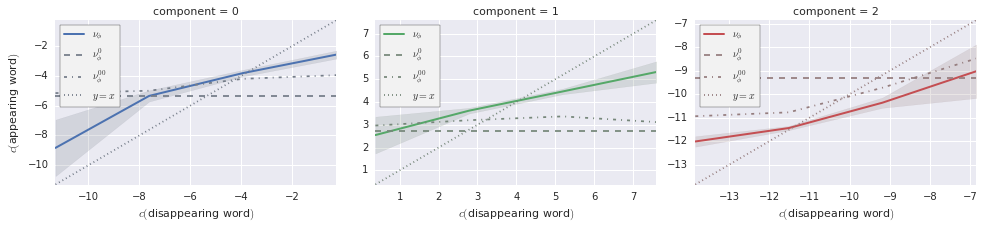

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.



Similarly, we mined 2672 (cluster-unique) substitutions, but the PCA is in fact computed on 1006 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.